# pre-requesties #

In [2]:
import time as tt
import numpy as np
import matplotlib.pyplot as pl
# from numba import njit, prange


# free fermionic Hamiltonian (direct construction) # 

## Version 202408: 1D case ##

*comment 20240820:
    This part, I create (initialize) a free fermion Hamiltonian and get it's ground state to serve as the state that we are optimizing. 
    Then the procedure is: 1-get the ground state. 2-find the energy of original Hamiltonian (non-intregrable fermionic). 3-optimize the the Hamiltonian to decrease this energy.

*comment 20240821:
    Maybe it is worth looking/trying the Limited-Memory Broyden-Fletcher-Goldfarb-Shanno (LM-BFGS) optimization method also.
    For now every parameter is real.


- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0.5 0.5 0.5]  ,  5.0
- - [0.5 0

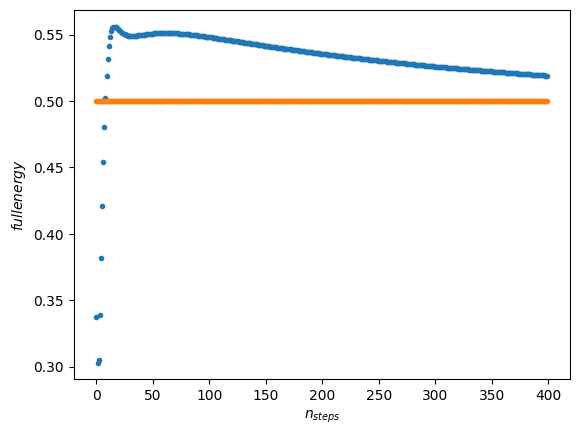

In [86]:

def cmat(inputlist, filing=2):
    
    if len(inputlist) != L*L:
        np.resize(inputlist, L*L)
     
    Wmat = np.reshape(inputlist,(L,L))
    
    H = (Wmat + Wmat.T)/2
    # for r in range(L):
    #     H[r,r] *=  2 / L

    E, U = np.linalg.eigh(H)
    C = np.dot(U[:,:L//filing],np.conj(U[:,:L//filing].T))
    
    return C

# def Cmat(filing=2):
#     H = ham()
#     E, U = np.linalg.eigh(H)
#     C = np.dot(U[:,:L//filing],np.conj(U[:,:L//filing].T))
#     return(C)


def FullEnergy_PC(C, Vs):
    """_summary_
    Args:
        C (_type_): _description_
        Vs (_type_): _description_
    Returns:
        _type_: _description_
    """
    E=0
    for j in range(L):
        E += -(C[j,np.mod(j+1,L)] + C[np.mod(j+1,L),j])
        E += -Vs/2*(C[j,j]*C[np.mod(j+1,L),np.mod(j+1,L)] - C[j,np.mod(j+1,L)]*C[np.mod(j+1,L),j])

    return E


def GetGradian_PC(input_array, Vs, p_shift = 0.001):
    grad_array = np.zeros(input_array.shape)
    for i_th in range(input_array.size):
        input_array[i_th] += p_shift
        C_mat = cmat(input_array)
        energi1 = FullEnergy_PC(C_mat, Vs)
        
        input_array[i_th] += -2 * p_shift
        C_mat = cmat(input_array)
        energi2 = FullEnergy_PC(C_mat, Vs)
        
        grad_array[i_th] += (energi1-energi2)/(2*p_shift)
        
    return(grad_array)


def freefermion_optimization(Vs, grad_rate = 1.637, max_step=200):
    # params = np.random.rand( L * L )
    params = np.random.randn( L * L )
    es = []
    ps = []
    pss = []
    for _ in range(max_step):
        
        for r in range(L):
            # params[r*(L+1)] = par_norm_2 * params[r*(L+1)]
            params[r*(L+1)] = 0.5
            # params[r*(L+1)] = ((-1)**r) * abs( params[r*(L+1)] )
        
        test_mat=np.reshape(params,(L,L))
        print("- -",np.diag(test_mat)[:4]," , ", sum(np.diag(test_mat)))
        # # par_norm_2 = np.trace( np.dot(test_mat, test_mat) )
        # par_norm_2 = L / ( 4 * sum(np.diag(test_mat)) ) 
        # print("- - - -", par_norm_2)
        
        CMAT = cmat(params)
        es.append(FullEnergy_PC(CMAT, Vs))
        ps.append(np.diag(CMAT)[0])
        # pss.append(np.diag(CMAT)[1])
        pss.append(np.round(np.trace(CMAT)/L, 5))
        gradian = GetGradian_PC(params, Vs)
        params += -1 * grad_rate * gradian
    return es, ps, pss


L = 10
Vs = 3.33
maxsteps = 400


Ns = np.arange(maxsteps)
Es, Ps, PsS = freefermion_optimization(Vs, max_step=maxsteps)

pl.plot(Ns, Ps,".")
pl.plot(Ns, PsS,".")
# pl.plot(Ns,Es,".")
pl.ylabel("$full energy$")
pl.xlabel("$n_{steps}$")
pl.show()


# VS=np.arange(0, 3, 0.125)
# P1 = []
# E1 = []
# for vs in VS:
#     energy_list, parcticle_count = freefermion_optimization(vs, max_step=maxsteps)
#     P1.append(parcticle_count[-1])
#     E1.append(energy_list[-1])

# pl.plot(VS, P1, ".", label='particle')
# pl.plot(VS, E1, ".",label='energy')
# pl.ylabel("$full \: energy$")
# pl.xlabel("$V$")
# pl.legend()
# pl.show()


## Version 202409: 1D + using prev. optimized for V parameter ##

*comment 20240906:
        to start from the previousely optimized V value.

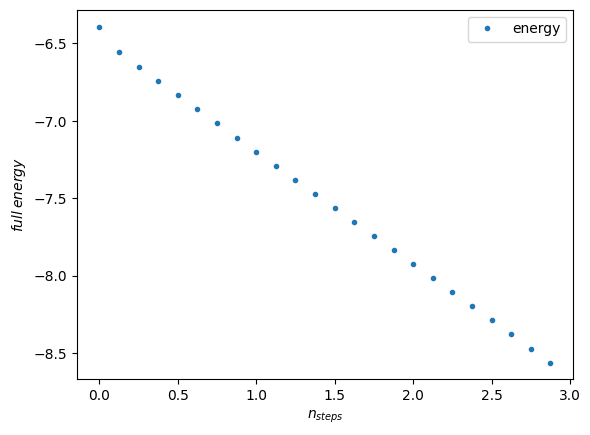

In [22]:

def cmat(inputlist, filing=2):
    
    if len(inputlist) != L*L:
        np.resize(inputlist, L*L)
     
    Wmat = np.reshape(inputlist,(L,L))
    
    H = (Wmat + Wmat.T)/2
    
    E, U = np.linalg.eigh(H)
    C = np.dot(U[:,:L//filing],np.conj(U[:,:L//filing].T))
    
    return C


def FullEnergy_PC(C, Vs):
    E=0
    for j in range(L):
        E += -(C[j,np.mod(j+1,L)] + C[np.mod(j+1,L),j])
        E += -Vs/2*(C[j,j]*C[np.mod(j+1,L),np.mod(j+1,L)] - C[j,np.mod(j+1,L)]*C[np.mod(j+1,L),j])

    return E


def GetGradian_PC(input_array, Vs, p_shift = 0.001):
    grad_array = np.zeros(input_array.shape)
    for i_th in range(input_array.size):
        input_array[i_th] += p_shift
        C_mat = cmat(input_array)
        energi1 = FullEnergy_PC(C_mat, Vs)
        
        input_array[i_th] += -2 * p_shift
        C_mat = cmat(input_array)
        energi2 = FullEnergy_PC(C_mat, Vs)
        
        grad_array[i_th] += (energi1-energi2)/(2*p_shift)
        
    return(grad_array)


def freefermion_optimization(Vs, params, grad_rate = 1.637, max_step=200, ):
    # params = np.random.rand( L * L )
    
    es = []
    p0 = []
    for n in range(max_step):
        CMAT = cmat(params)
        es.append(FullEnergy_PC(CMAT, Vs))
        # ps.append(np.round(np.trace(CMAT), 5))
        p0.append(np.diag(CMAT)[0])
        gradian = GetGradian_PC(params, Vs)
        params += -1 * grad_rate * gradian
    return es[-1], p0[-1], params


L = 10
Vs = 0.3
maxsteps = 200


# Ns = np.arange(maxsteps)
# Es, Ps = freefermion_optimization(Vs, max_step=maxsteps)

# pl.plot(Ns, Ps,".")
# pl.plot(Ns,Es,".")
# pl.ylabel("$full energy$")
# pl.xlabel("$n_{steps}$")
# pl.show()


VS=np.arange(0, 3, 0.125)
P = []
E = []
params = np.random.rand( L * L )
for vs in VS:
    energy, parcticle_count, params = freefermion_optimization(vs, params, max_step=maxsteps)
    P.append(parcticle_count)
    E.append(energy)
    # energy_list, parcticle_count = freefermion_optimization(vs, max_step=maxsteps)
    # P.append(parcticle_count[-1])
    # E.append(energy_list[-1])

# pl.plot(VS, P, ".", label='particle')
pl.plot(VS, E, ".",label='energy')
pl.ylabel("$full \: energy$")
pl.xlabel("$V$")
pl.legend()
pl.show()


## version 202410: 2D + fewer parameter to optimize ##

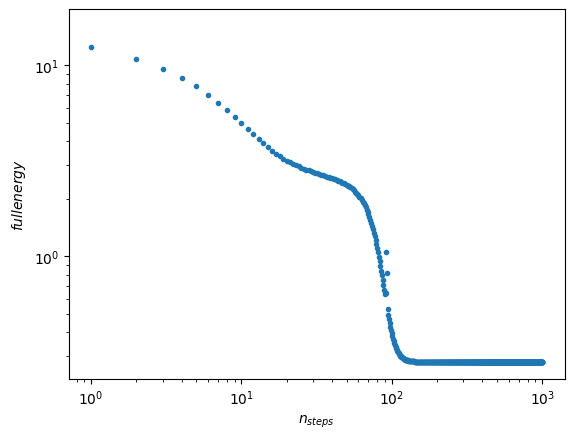

In [90]:
def Sym(input, L):
    """_summary_: Optimized to use less elelements to creat a symmetric matrix. More efficient
    Returns:
        _nump.ndarray_: L by L symetric numpy array
    """    
    if input.size != L * (L+1)//2:
        input = np.resize(input, L*(L+1)//2)
    
    out = np.zeros((L,L))
    indxs = np.triu_indices_from(out)
    out[ indxs[1], indxs[0] ]= input
    out[indxs] = input
        
    return  out


def Sym_ZeroDiag(input, L):
    """
    Returns:
        _nump.ndarray_: L by L symmetric numpy array with zero diagonal elements
    """    
    if input.size != L * (L-1)//2:
        input = np.resize(input, L*(L-1)//2)
    
    out = np.zeros((L,L))
    indxs = np.triu_indices_from(out, k=1)
    out[ indxs[1], indxs[0] ]= input
    out[indxs] = input
        
    return  out


def FullSym(input, L):
    """_summary_: Uses all the possible elelemnts to creat a symmetric matrix. From al older code 09/2024 and less efficient.
    Returns:
        _nump.ndarray_: L by L symetric numpy array
    """
    if len(input) != L*L:
        input = np.resize(input, L*L)
     
    Wmat = np.reshape(input,(L,L))
          
    return (Wmat + Wmat.T)/2


def cmat_2d(inputlist, *dims, **kw):
    
    filing = kw['filing'] if 'filing' in kw.keys() else 2
    func = kw['energy_func'] if 'energy_func' in kw.keys() else Sym
    # print("*******************",type(func))
    # print("===================",func.__qualname__)
    # print("===================",type(func.__qualname__) )
    
    Lx,Ly = dims[:2]
    L = Lx*Ly
    
    H = func(inputlist, L)
    # H = Sym(inputlist, L)
    # H = Sym_ZeroDiag(inputlist, L)
    # print(np.diag(H)[:2])
    
    
    E, U = np.linalg.eigh(H)
    C = np.dot(U[:,:L//filing],np.conj(U[:,:L//filing].T))
    
    return C


def FullEnergy_PC_2d(C, *physical, **kw):
    
    PBC = kw['PBC'] if 'PBC' in kw.keys() else True
    
    Vs, Lx, Ly = physical[:3]
    
    ad_X = np.eye(Lx, k=1) + np.eye(Lx, k=-1)  + int(PBC)*np.eye(Lx, k=Lx-1)  + int(PBC)*np.eye(Lx, k=-Lx+1)    
    if Ly==2:
        ad_Y = np.eye(Ly, k=1) + np.eye(Ly, k=-1)
    else:
        ad_Y = np.eye(Ly, k=1) + np.eye(Ly, k=-1)  + int(PBC)*np.eye(Ly, k=Ly-1)  + int(PBC)*np.eye(Ly, k=-Ly+1)

    ad_mat = np.kron(ad_Y, np.eye(Lx)) + np.kron(np.eye(Ly), ad_X)
    
    #~~~~~~~~~~~~~~ new method ~~~~~~~~~~~~~~~~#
    # first_term = ad_mat * C
    # E = - 1 * sum(first_term.reshape(-1))
    # second_term = ad_mat * np.transpose(C) * C
    # E += + V/2 * sum(second_term.reshape(-1)) 
    # (!) third_term = np.diag(C) * np.roll(np.diag(C),-1) (!)
    # E += - V/2 * sum(third_term)
    
    #~~~~~~~~~~~~~~ old method ~~~~~~~~~~~~~~~~#
    E = 0
    for xx in range(Lx*Ly):
        for yy in range(xx,Lx*Ly):
            E += - 1.0 *ad_mat[xx,yy] * (C[xx,yy] + C[yy,xx])
            E += + Vs/2*ad_mat[xx,yy] * (C[xx,yy]*C[yy,xx] - C[xx,xx]*C[yy,yy])
            # E += - Vs/2*ad_mat[xx,yy] * C[xx,xx]*C[yy,yy]

    return(E)


def GetGradian_PC_2d(input_array, *parameter, **kw):
    
    p_shift = kw['p_shift'] if 'p_shift' in kw.keys() else 0.001
    
    Vs, Lx, Ly = parameter[:3]
    
    grad_array = np.zeros(input_array.shape)
    for i_th in range(input_array.size):
        input_array[i_th] += p_shift
        C_mat = cmat_2d(input_array, Lx, Ly, **kw)
        energi1 = FullEnergy_PC_2d(C_mat, Vs, Lx, Ly, **kw)
        
        input_array[i_th] += -2 * p_shift
        C_mat = cmat_2d(input_array, Lx, Ly, **kw)
        energi2 = FullEnergy_PC_2d(C_mat, Vs, Lx, Ly, **kw)
        
        grad_array[i_th] += (energi1-energi2)/(2*p_shift)
        
    return(grad_array)


# def freefermion_optimization_2d(params, *physical, **kw):
def freefermion_optimization_2d(*physical, **kw):
    """_summary_
    parameters(*):
        physical: V, Lx, Ly (given in order) 
    Keywords(**):
        grad_rate: gradient descent rate, a.k.a update rate.
        max_step: maximum optimization steps.
        target_energy: targer energy to reach.
        energy_output: type of energy output. 'True' for solely optimized energy or 'False' for difference between target energy and optimized energy.
        energy_func: type of Hamiltonian to be used. So far there are two options: (1) symmetric with non-zero diagonal terms -> Sym (2) symmetric with zero diagonal terms -> Sym_ZeroDiag.  
    Returns:
        _list_: energy, particle_count 
    """
    grad_rate = kw['grad_rate'] if 'grad_rate' in kw.keys() else 1.63
    max_step = kw['max_step'] if 'max_step' in kw.keys() else 200
    energy_output = kw['energy_output'] if 'energy_output' in kw.keys() else True
    target_energy = kw['target_energy'] if 'target_energy' in kw.keys() else 0.0
    # particle_number = kw['particle_number'] if 'particle_number' in kw.keys() else 0
    func = kw['energy_func'] if 'energy_func' in kw.keys() else Sym
    
    Vs, Lx, Ly = physical[:3]
    
    #~~here it checks what was the given function and decides how many parameters it needs~~#
    if func.__qualname__ == 'Sym_ZeroDiag':
        # print(" #############################less particle")
        # params = np.random.rand( Lx*Ly * (Lx*Ly-1) // 2 )
        params = np.random.randn( Lx*Ly * (Lx*Ly-1) // 2 )
        # params = np.random.uniform(-1., +1., Lx*Ly * (Lx*Ly-1) // 2 )
    else:
        # print(" #############################more particle")
        # params = np.random.rand( Lx*Ly * (Lx*Ly+1) // 2 )
        params = np.random.randn( Lx*Ly * (Lx*Ly+1) // 2 )
        # params = np.random.uniform(-1., +1., Lx*Ly * (Lx*Ly+1) // 2 )
    
    
    es = []
    ps = []
    for _ in range(max_step):
        # new_grad_rate = 100 * grad_rate
        CMAT = cmat_2d(params, Lx, Ly, **kw)
        energia_optimizado = FullEnergy_PC_2d(CMAT, Vs, Lx, Ly, **kw)
        
        # print("- - - -  - - - ")
        # print(list(CMAT))
        # print(energia_optimizado)
        
        if energy_output:
            es.append(energia_optimizado)
        else:
            es.append(abs( energia_optimizado - target_energy) )
        
        # ps.append(np.round(np.trace(CMAT) / Lx*Ly, 5))
        ps.append(np.diag(CMAT)[0])
        gradian = GetGradian_PC_2d(params, Vs, Lx, Ly, **kw)
        params += -1 * grad_rate * gradian
    return es, ps #es[-1], p0[-1] #, params



Lx, Ly = 4, 4
Vs = 4.71
maxsteps = 1000
Ns = np.arange(maxsteps)
Es, Ps = freefermion_optimization_2d(Vs,Lx,Ly, max_step=maxsteps, energy_func=Sym, PBC=True, energy_output=False, target_energy= -30.66693743282037)
# print(list(Es))

#~~~~~~~~~~~~~~~~~~~~~ ploting convergence for V=Vs
# pl.plot(Ns, Ps,".")
pl.plot(Ns, Es,".")
pl.ylabel("$full energy$")
pl.xlabel("$n_{steps}$")
pl.yscale('log')
pl.xscale('log')
pl.show()


#~~~~~~~~~~~~~~~~~~~~~ ploting energy estimate (after convergence) vs V
# VS=np.arange(0, 3, 0.125)
# P = []
# E = []
# params = np.random.rand( L * L )
# for vs in VS:
#     energy, parcticle_count, params = freefermion_optimization(vs, params, max_step=maxsteps)
#     P.append(parcticle_count)
#     E.append(energy)
#     # energy_list, parcticle_count = freefermion_optimization(vs, max_step=maxsteps)
#     # P.append(parcticle_count[-1])
#     # E.append(energy_list[-1])

# # pl.plot(VS, P, ".", label='particle')
# pl.plot(VS, E, ".",label='energy')
# pl.ylabel("$full \: energy$")
# pl.xlabel("$V$")
# pl.legend()
# pl.show()

* Ploting the comparison between Normal diagonal and Zero diagonal

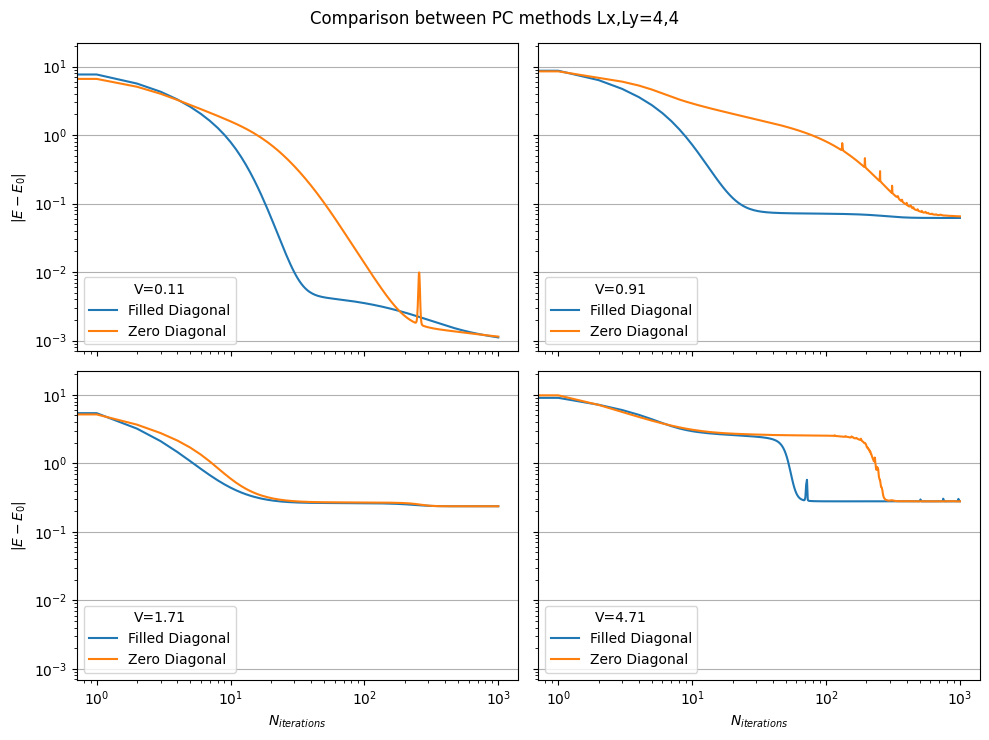

In [88]:
e1_1=[12.463712638984836, 7.6675196288244765, 5.650744904605778, 4.2975691036528545, 3.317124805636519, 2.5908113676340996, 2.0413541469681764, 1.6152717537535128, 1.2779262294776448, 1.0076523426699016, 0.790534950297678, 0.6168496875713316, 0.47902908959032864, 0.3706950853879363, 0.28630161774938045, 0.22105032383852397, 0.17088078567281784, 0.13244689578304936, 0.10305799072450306, 0.08059364927674117, 0.0634083337514415, 0.0502390122329448, 0.040123339695174565, 0.032331314211333506, 0.026310385648843138, 0.021642520581083957, 0.0180112093331104, 0.015176405587414621, 0.012955629032671112, 0.011209774319281607, 0.009832474431588523, 0.008742130392750624, 0.007875933567135007, 0.007185374599744776, 0.006632861371253185, 0.006189165062545854, 0.005831485659868463, 0.0055419818936375265, 0.005306650336931895, 0.005114467799225864, 0.004956732897094085, 0.004826558805797632, 0.004718481149874165, 0.0046281538880421635, 0.0045521126770964315, 0.004487590162316479, 0.0044323713594263126, 0.004384680094419835, 0.004343089581730908, 0.004306451819253709, 0.004273841699825809, 0.004244512663753142, 0.004217861428822189, 0.004193399878444026, 0.004170732609942718, 0.004149538968510669, 0.0041295586446512544, 0.0041105801091418925, 0.004092431311331524, 0.004074972186764114, 0.004058088613939859, 0.004041687533259619, 0.004025693000500041, 0.004010042991062335, 0.003994686810635528, 0.0039795829943987115, 0.003964697601196221, 0.003950002826826449, 0.003935475876593486, 0.003921098047156235, 0.003906853978751457, 0.003892731045176845, 0.0038787188569280318, 0.003864808854816104, 0.003850993978662842, 0.003837268396040372, 0.0038236272810134864, 0.0038100666328908517, 0.003796583127488873, 0.003783173996218636, 0.0037698369262333387, 0.00375656997896634, 0.0037433715232921827, 0.0037302401806300622, 0.0037171747801938437, 0.003704174321796927, 0.003691237945540493, 0.003678364907043985, 0.0036655545569121983, 0.003652806324010882, 0.003640119701479705, 0.003627494235528772, 0.0036149295159937367, 0.0036024251686086473, 0.003589980848779817, 0.0035775962362620817, 0.0035652710310074553, 0.0035530049495466898, 0.003540797721976574, 0.003528649089782121, 0.0035165588035894757, 0.0035045266218123317, 0.0034925523092077526, 0.0034806356356451573, 0.0034687763753744605, 0.003456974306121907, 0.0034452292085660474, 0.003433540865842133, 0.003421909063035855, 0.0034103335869701823, 0.0033988142256955456, 0.0033873507685253657, 0.0033759430056150563, 0.0033645907279460374, 0.0033532937271552044, 0.0033420517953306472, 0.0033308647252336954, 0.0033197323097073905, 0.003308654342234263, 0.003297630616302172, 0.003286660925825302, 0.003275745064913238, 0.0032648828278336595, 0.003254074008992802, 0.0032433184029976303, 0.0032326158046220854, 0.0032219660087413615, 0.00321136881039763, 0.003200824004798264, 0.0031903313871310957, 0.003179890752912584, 0.0031695018977107026, 0.0031591646172106636, 0.003148878707257552, 0.0031386439638509955, 0.003128460183090098, 0.0031183271612622576, 0.003108244694882245, 0.00309821258045595, 0.00308823061486585, 0.0030782985949926456, 0.0030684163179905966, 0.0030585835811614004, 0.0030488001820057065, 0.003039065918281736, 0.0030293805878560676, 0.0030197439888208777, 0.003010155919623614, 0.0030006161787916596, 0.002991124565122405, 0.00298168087756423, 0.00297228491545809, 0.002962936478326128, 0.0029536353659374015, 0.002944381378343408, 0.0029351743158301247, 0.0029260139789837325, 0.0029169001686870644, 0.0029078326860734194, 0.002898811332492812, 0.0028898359097677684, 0.002880906219917989, 0.002872022065309565, 0.0028631832485590536, 0.0028543895727306534, 0.002845640841030672, 0.00283693685712727, 0.0028282774250119047, 0.0028196623490064354, 0.0028110914338128623, 0.0028025644843232556, 0.002794081306040752, 0.002785641704642572, 0.002777245486230484, 0.0027688924572721874, 0.0027605824247292077, 0.00275231519575847, 0.0027440905779911873, 0.0027359083795008843, 0.0027277684086843834, 0.0027196704744252287, 0.0027116143858290087, 0.002703599952653235, 0.0026956269849200964, 0.0026876952931047526, 0.0026798046881673088, 0.0026719549814142596, 0.0026641459846192816, 0.002656377510007246, 0.0026486493702204683, 0.002640961378318707, 0.002633313347894628, 0.0026257050929583414, 0.0026181364279267427, 0.00261060716775674, 0.0026031171278262377, 0.002595666123978546, 0.0025882539725561315, 0.0025808804903491023, 0.0025735454946360647, 0.0025662488031894526, 0.002558990234238223, 0.00255176960654957, 0.0025445867393507626, 0.0025374414523717803, 0.002530333565825771, 0.002523262900458789, 0.0025162292775053885, 0.002509232518679738, 0.002502272446234244, 0.0024953488829968506, 0.002488461652154328, 0.0024816105775737896, 0.0024747954835344643, 0.002468016194914213, 0.0024612725370616317, 0.0024545643358635516, 0.0024478914177805677, 0.002441253609784866, 0.0024346507393264716, 0.0024280826344860174, 0.00242154912379533, 0.002415050036402633, 0.00240858520196241, 0.0024021544507348835, 0.002395757613413707, 0.0023893945213231405, 0.0023830650063505487, 0.0023767689009019932, 0.0023705060379182186, 0.0023642762509634707, 0.0023580793740798356, 0.002351915241936453, 0.002345783689744252, 0.002339684553282595, 0.0023336176689010557, 0.0023275828734714565, 0.002321580004473134, 0.0023156088999005675, 0.0023096693984800964, 0.00230376133927912, 0.0022978845621040023, 0.002292038907283356, 0.0022862242157177803, 0.002280440328842559, 0.002274687088702265, 0.002268964338016488, 0.0022632719199453533, 0.002257609678304462, 0.002251977457374821, 0.0022463751022190337, 0.0022408024582887265, 0.0022352593717194225, 0.00222974568924883, 0.0022242612581013788, 0.002218805926158751, 0.002213379541899485, 0.0022079819543545653, 0.0022026130130665678, 0.002197272568265518, 0.0021919604707747453, 0.0021866765719806835, 0.0021814207238044503, 0.0021761927788226387, 0.002170992590219356, 0.0021658200116352333, 0.0021606748973983514, 0.0021555571024389764, 0.0021504664821954123, 0.0021454028927809787, 0.002140366190854337, 0.002135356233674557, 0.002130372879062037, 0.0021254159854500188, 0.0021204854118099803, 0.0021155810177670986, 0.002110702663479458, 0.002105850209741078, 0.002101023517928624, 0.002096222450001406, 0.0020914468683805865, 0.002086696636302676, 0.002081971617389655, 0.002077271675968717, 0.0020725966768555537, 0.0020679464855550833, 0.0020633209680411824, 0.002058719990932545, 0.0020541434214589316, 0.002049591127397221, 0.002045062977080292, 0.0020405588394432073, 0.0020360785840001228, 0.0020316220808958008, 0.0020271892007261982, 0.0020227798148244602, 0.002018393794967821, 0.0020140310135179362, 0.0020096913435079244, 0.002005374658493153, 0.0020010808325992002, 0.001996809740434813, 0.001992561257349479, 0.0019883352591580916, 0.0019841316222724004, 0.001979950223621074, 0.0019757909407971397, 0.0019716536518874506, 0.001967538235549071, 0.001963444571057238, 0.0019593725381845672, 0.0019553220172898733, 0.0019512928892897463, 0.0019472850356603288, 0.0019432983384710667, 0.0019393326802852329, 0.0019353879442949307, 0.0019314640141612216, 0.0019275607742095247, 0.0019236781092004662, 0.001919815904493305, 0.0019159740460352737, 0.001912152420265656, 0.0019083509142188149, 0.0019045694154602444, 0.0019008078120723582, 0.0018970659927024514, 0.0018933438465253971, 0.0018896412633164772, 0.0018859581332684172, 0.0018822943472756037, 0.0018786497966321036, 0.0018750243731933125, 0.0018714179694452326, 0.0018678304782628885, 0.001864261793160793, 0.0018607118081206409, 0.0018571804176659157, 0.0018536675168796535, 0.001850173001306743, 0.0018466967670853762, 0.0018432387108404669, 0.0018397987297138485, 0.0018363767213678273, 0.0018329725839905109, 0.001829586216267387, 0.0018262175174239559, 0.0018228663871830975, 0.001819532725811257, 0.0018162164340349563, 0.0018129174130816494, 0.0018096355647188034, 0.0018063707912183702, 0.0018031229953177075, 0.0017998920803190543, 0.0017966779499722918, 0.0017934805085300098, 0.0017902996607972455, 0.0017871353119165434, 0.0017839873677161222, 0.0017808557344682896, 0.0017777403188414809, 0.0017746410281063163, 0.001771557769870924, 0.001768490452375815, 0.0017654389842700624, 0.0017624032747161067, 0.0017593832333595572, 0.0017563787701995182, 0.0017533897959349787, 0.0017504162215828956, 0.0017474579586327366, 0.001744514919113982, 0.0017415870154682267, 0.0017386741606593148, 0.0017357762680507705, 0.0017328932514928397, 0.0017300250253633465, 0.0017271715043758462, 0.001724332603789236, 0.0017215082393313708, 0.0017186983270569556, 0.0017159027836708418, 0.001713121526156769, 0.0017103544720651342, 0.0017076015393087118, 0.0017048626462763394, 0.0017021377118577874, 0.0016994266552483595, 0.0016967293962313335, 0.0016940458549594695, 0.0016913759520491567, 0.0016887196084418576, 0.0016860767456652326, 0.001683447285591555, 0.0016808311505620566, 0.0016782282633123202, 0.0016756385470149127, 0.001673061925307806, 0.0016704983221664804, 0.0016679476620762301, 0.0016654098698296593, 0.0016628848707878063, 0.0016603725905941502, 0.0016578729553575755, 0.0016553858916292796, 0.0016529113263015205, 0.0016504491867230797, 0.0016479994006424192, 0.0016455618962059049, 0.0016431366019684646, 0.0016407234468580612, 0.0016383223602396413, 0.001635933271844081, 0.0016335561118445696, 0.0016311908107500273, 0.0016288372994868183, 0.0016264955093880928, 0.0016241653721369431, 0.0016218468198498925, 0.001619539784989854, 0.0016172442004123155, 0.0016149599993813268, 0.0016126871154718003, 0.0016104254827506992, 0.0016081750355176894, 0.0016059357085982384, 0.0016037074370451876, 0.0016014901564265216, 0.0015992838025304934, 0.0015970883116143142, 0.001594903620247834, 0.0015927296653988066, 0.0015905663844062445, 0.0015884137149519972, 0.0015862715950554218, 0.0015841399631053577, 0.0015820187578459155, 0.0015799079184244391, 0.0015778073842565021, 0.0015757170951538058, 0.0015736369913081916, 0.0015715670131726256, 0.0015695071016068596, 0.0015674571978241403, 0.0015654172433023916, 0.0015633871799334287, 0.0015613669499483507, 0.0015593564958713557, 0.0015573557605890187, 0.0015553646873147642, 0.0015533832195959718, 0.0015514113012446984, 0.0015494488765792624, 0.001547495890035222, 0.001545552286504659, 0.0015436180111656483, 0.0015416930094911407, 0.0015397772273129107, 0.0015378706107966877, 0.0015359731063480098, 0.0015340846607418968, 0.0015322052211175219, 0.0015303347347757068, 0.001528473149503995, 0.0015266204132284855, 0.0015247764743300252, 0.0015229412814328214, 0.0015211147834648386, 0.001519296929645364, 0.001517487669504547, 0.0015156869529029393, 0.0015138947299071503, 0.0015121109509745878, 0.0015103355668415475, 0.0015085685285196604, 0.0015068097872941166, 0.0015050592947538632, 0.0015033170027791698, 0.001501582863564721, 0.0014998568295290227, 0.0014981388534689444, 0.001496428888346557, 0.0014947268874720976, 0.0014930328044400198, 0.0014913465931130077, 0.001489668207613093, 0.0014879976023305375, 0.0014863347319717946, 0.001484679551479573, 0.001483032016087904, 0.0014813920812706272, 0.0014797597028337606, 0.0014781348367378655, 0.0014765174393236435, 0.001474907467114761, 0.001473304876956405, 0.0014717096258980433, 0.0014701216712804666, 0.0014685409706842734, 0.0014669674819973721, 0.0014654011632941888, 0.0014638419729013918, 0.001462289869465394, 0.0014607448118564292, 0.0014592067591170377, 0.001457675670664571, 0.0014561515060602659, 0.0014546342251922084, 0.0014531237881012515, 0.0014516201551177943, 0.00145012328687244, 0.0014486331440970446, 0.0014471496878876167, 0.00144567287950359, 0.0014442026804744046, 0.00144273905261727, 0.0014412819578240033, 0.0014398313583630085, 0.0014383872166572331, 0.001436949495410289, 0.0014355181575176346, 0.0014340931661092071, 0.0014326744845511996, 0.0014312620763963224, 0.0014298559054584103, 0.0014284559357697901, 0.0014270621315759513, 0.001425674457363968, 0.0014242928777239428, 0.001422917357686515, 0.001421547862241468, 0.001420184356780041, 0.0014188268068053844, 0.0014174751780746675, 0.0014161294365457877, 0.0014147895484040163, 0.0014134554799802856, 0.0014121271978968508, 0.0014108046689500497, 0.0014094878600729999, 0.0014081767384919175, 0.0014068712716230891, 0.0014055714270302389, 0.0014042771724760428, 0.0014029884760002886, 0.0014017053057830964, 0.0014004276302106433, 0.0013991554178502952, 0.001397888637464817, 0.0013966272580603345, 0.0013953712487708714, 0.0013941205789116395, 0.0013928752180554227, 0.001391635135906455, 0.0013904003024176603, 0.0013891706876130172, 0.0013879462617918392, 0.001386726995477261, 0.0013855128592599186, 0.0013843038239702565, 0.0013830998606234601, 0.0013819009404336668, 0.001380707034703832, 0.001379518115047773, 0.001378334153129046, 0.001377155120872331, 0.0013759809903479692, 0.0013748117337524235, 0.0013736473235557156, 0.001372487732291816, 0.0013713329327185164, 0.001370182897781902, 0.0013690376005612848, 0.0013678970143029545, 0.0013667611124557055, 0.0013656298685784662, 0.001364503256404248, 0.0013633812498969888, 0.0013622638230899042, 0.0013611509502258201, 0.0013600426057109871, 0.001358938764111528, 0.0013578394001019234, 0.0013567444885840274, 0.0013556540045538412, 0.0013545679232187524, 0.001353486219922928, 0.0013524088701082349, 0.0013513358494439132, 0.001350267133721772, 0.0013492026988739525, 0.001348142520997797, 0.0013470865763309803, 0.0013460348412479561, 0.001344987292323907, 0.0013439439062139513, 0.0013429046597170924, 0.0013418695298508254, 0.0013408384936823836, 0.0013398115285045975, 0.0013387886116955627, 0.0013377697207861416, 0.0013367548334741741, 0.0013357439275498706, 0.00133473698098463, 0.0013337339718439978, 0.0013327348784137882, 0.0013317396789975788, 0.00133074835211211, 0.0013297608763860325, 0.0013287772305954348, 0.001327797393622987, 0.0013268213445201127, 0.0013258490624323827, 0.0013248805266492525, 0.001323915716570312, 0.0013229546117550228, 0.0013219971918836393, 0.0013210434367554313, 0.0013200933262567105, 0.0013191468405224782, 0.0013182039596451034, 0.0013172646639389995, 0.0013163289338464779, 0.00131539674992176, 0.0013144680927972274, 0.0013135429432367118, 0.0013126212822562877, 0.0013117030907405791, 0.0013107883499205997, 0.0013098770410131522, 0.0013089691454233332, 0.0013080646446024247, 0.001307163520168686, 0.0013062657538895905, 0.0013053713275450463, 0.001304480223108584, 0.0013035924226425522, 0.0013027079083229864, 0.0013018266624165165, 0.001300948667330104, 0.001300073905545318, 0.0012992023596964941, 0.0012983340124907983, 0.0012974688467846107, 0.0012966068454893787, 0.0012957479916213543, 0.0012948922683797548, 0.0012940396589851133, 0.0012931901467982954, 0.0012923437152831951, 0.001291500348013841, 0.0012906600286246572, 0.0012898227409063878, 0.00128898846868708, 0.0012881571959901805, 0.0012873289068320304, 0.00128650358544391, 0.0012856812160375597, 0.0012848617829774867, 0.001284045270733003, 0.001283231663883555, 0.0012824209470476688, 0.0012816131049895318, 0.0012808081225479384, 0.0012800059846611589, 0.0012792066763509524, 0.0012784101827563177, 0.0012776164890677677, 0.0012768255806268058, 0.001276037442817568, 0.001275252061113008, 0.0012744694211104246, 0.001273689508469289, 0.0012729123089432193, 0.001272137808392415, 0.0012713659927428012, 0.001270596848033989, 0.0012698303603322358, 0.001269066515870776, 0.0012683053009148182, 0.0012675467018290476, 0.001266790705077625, 0.0012660372971584621, 0.0012652864646973683, 0.0012645381944249579, 0.0012637924731038197, 0.001263049287553386, 0.0012623086248044757, 0.0012615704718061949, 0.00126083481569772, 0.0012601016436608603, 0.001259370942948479, 0.0012586427009146917, 0.001257916905002432, 0.0012571935426706204, 0.0012564726015096284, 0.001255754069180881, 0.0012550379334346218, 0.0012543241820033302, 0.0012536128028557414, 0.0012529037838806545, 0.0012521971131320697, 0.0012514927787297125, 0.0012507907688235065, 0.0012500910716468638, 0.0012493936755841872, 0.0012486985689825758, 0.0012480057402974865, 0.0012473151780891811, 0.0012466268709552253, 0.0012459408075677914, 0.0012452569766967514, 0.0012445753671350701, 0.001243895967778741, 0.0012432187675486261, 0.001242543755498815, 0.0012418709207207002, 0.0012412002523625176, 0.0012405317396080306, 0.0012398653717919927, 0.0012392011382527102, 0.0012385390284066489, 0.0012378790317431054, 0.0012372211378028908, 0.0012365653361978701, 0.0012359116166127393, 0.0012352599687641685, 0.0012346103824860677, 0.0012339628476158992, 0.0012333173540781672, 0.00123267389186843, 0.00123203245103376, 0.0012313930216922842, 0.0012307555939976567, 0.0012301201581941257, 0.0012294867045650193, 0.0012288552234576144, 0.0012282257052742551, 0.001227598140490116, 0.0012269725196354386, 0.0012263488332635575, 0.0012257270720414937, 0.0012251072266504792, 0.001224489287835695, 0.0012238732464169289, 0.0012232590932690357, 0.0012226468193059503, 0.0012220364154735819, 0.0012214278728670536, 0.0012208211824979998, 0.0012202163355414797, 0.001219613323199198, 0.0012190121366835172, 0.0012184127673311451, 0.0012178152064556969, 0.001217219445488027, 0.0012166254758465556, 0.0012160332891024694, 0.0012154428767541248, 0.00121485423044021, 0.0012142673417958605, 0.001213682202569899, 0.0012130988044898317, 0.0012125171393861933, 0.001211937199114388, 0.001211358975577781, 0.0012107824607188178, 0.001210207646570538, 0.0012096345251642049, 0.001209063088632334, 0.001208493329059479, 0.0012079252387344752, 0.0012073588098253651, 0.0012067940346636163, 0.0012062309055522746, 0.001205669414890309, 0.001205109555098005, 0.0012045513186524914, 0.0012039946980877403, 0.0012034396859466057, 0.0012028862748465485, 0.0012023344574316752, 0.001201784226385172, 0.0012012355744595027, 0.0012006884944462115, 0.0012001429791439477, 0.0011995990214295205, 0.0011990566142188186, 0.001198515750477469, 0.0011979764231746515, 0.0011974386253559288, 0.0011969023501023912, 0.0011963675905448667, 0.0011958343398177362, 0.0011953025911211057, 0.0011947723377350172, 0.0011942435728737877, 0.001193716289900948, 0.0011931904821622652, 0.0011926661430656793, 0.0011921432660475517, 0.0011916218445975346, 0.001191101872194622, 0.0011905833424012968, 0.001190066248851096, 0.0011895505851100552, 0.0011890363448916474, 0.0011885235218915824, 0.0011880121098091223, 0.0011875021024767562, 0.0011869934937180915, 0.00118648627733009, 0.0011859804472074131, 0.001185475997315777, 0.00118497292156583, 0.0011844712139641445, 0.0011839708685812411, 0.0011834718794254684, 0.0011829742406135324, 0.0011824779462781265, 0.0011819829905999057, 0.0011814893677506433, 0.001180997071999812, 0.001180506097593792, 0.0011800164388322543, 0.0011795280900521732, 0.0011790410456136158, 0.0011785552999441506, 0.001178070847464241, 0.0011775876826405351, 0.001177105799971656, 0.0011766251939739902, 0.0011761458592314256, 0.0011756677903065338, 0.0011751909818364936, 0.0011747154284815764, 0.0011742411249322515, 0.0011737680658949756, 0.0011732962461117324, 0.0011728256603582565, 0.0011723563034404805, 0.001171888170205193, 0.0011714212555347103, 0.0011709555542989136, 0.001170491061415646, 0.0011700277718666996, 0.0011695656806107735, 0.0011691047826900558, 0.0011686450731094311, 0.001168186546967931, 0.0011677291993326122, 0.0011672730253629027, 0.0011668180201898082, 0.0011663641790065071, 0.001165911497006178, 0.001165459969437066, 0.0011650095915474168, 0.0011645603586156739, 0.001164112266010875, 0.001163665309029227, 0.001163219483050426, 0.0011627747834666025, 0.00116233120570719, 0.0011618887452016224, 0.0011614473974379536, 0.0011610071579166714, 0.0011605680221382642, 0.0011601299856813796, 0.0011596930441211128, 0.0011592571930236772, 0.0011588224280529857, 0.0011583887448107788, 0.0011579561389982729, 0.0011575246063308953, 0.0011570941425009806, 0.0011566647432488253, 0.0011562364043609108, 0.0011558091216112842, 0.0011553828908432706, 0.0011549577078735496, 0.0011545335685543279, 0.0011541104687999848, 0.0011536884045106888, 0.0011532673716079245, 0.001152847366034493, 0.0011524283837918148, 0.0011520104208759818, 0.001151593473279533, 0.0011511775370660615, 0.0011507626083080424, 0.001150348683069069, 0.001149935757455367, 0.001149523827631782, 0.0011491128897258562, 0.0011487029399059878, 0.0011482939743583387, 0.0011478859893081506, 0.001147478980989547, 0.001147072945645533, 0.0011466678795617469, 0.001146263779043366, 0.001145860640368923, 0.0011454584599324136, 0.0011450572340443443, 0.0011446569590951583, 0.001144257631473522, 0.001143859247592971, 0.0011434618038990152, 0.0011430652968549282, 0.0011426697229186544, 0.0011422750785836655, 0.0011418813603789602, 0.0011414885647962336, 0.0011410966884177753, 0.0011407057278098875, 0.0011403156795228853, 0.0011399265401923486, 0.0011395383064556341, 0.001139150974918124, 0.0011387645422527015, 0.0011383790051500142, 0.0011379943602918274, 0.0011376106043758938, 0.0011372277341479275, 0.0011368457463678538, 0.0011364646377653997, 0.0011360844051715446, 0.0011357050453497664, 0.0011353265551079517, 0.0011349489312930672, 0.0011345721707805012, 0.001134196270410115, 0.0011338212270697312, 0.00113344703764362, 0.0011330736990640133, 0.0011327012082364973, 0.0011323295621803453, 0.00113195875778338, 0.0011315887920648748, 0.001131219662010352, 0.0011308513646106633, 0.001130483896936596, 0.0011301172560127526, 0.001129751438892157, 0.0011293864426527023, 0.0011290222643776104, 0.0011286589011891834, 0.0011282963501955123, 0.0011279346085295572, 0.0011275736733296071, 0.0011272135418014528, 0.0011268542110691726, 0.0011264956783598734, 0.001126137940865135, 0.0011257809958422627, 0.001125424840477507, 0.0011250694720672527, 0.0011247148878510416, 0.0011243610851021657, 0.0011240080611383263, 0.001123655813239921, 0.0011233043387530728, 0.0011229536350150227, 0.0011226036993488009, 0.0011222545291307284, 0.0011219061217389026, 0.0011215584745407625, 0.0011212115849552617, 0.0011208654504208937, 0.001120520068337072, 0.0011201754361529481, 0.0011198315512963575, 0.0011194884112946113, 0.0011191460135684395, 0.0011188043556504823, 0.001118463435007655, 0.0011181232491939141, 0.001117783795731242, 0.0011174450721771478, 0.0011171070760411794, 0.001116769804925255, 0.0011164332564064239, 0.001116097428059959, 0.001115762317510871, 0.001115427922368184, 0.001115094240258685, 0.0011147612687896213, 0.0011144290056712691, 0.0011140974485304156, 0.0011137665950506914, 0.0011134364429281618, 0.0011131069898375756, 0.0011127782334909853, 0.0011124501716412993, 0.0011121228019668195, 0.0011117961222382178, 0.0011114701302155083, 0.0011111448236693633]
e1_2=[11.004242601139106, 6.609188402869886, 5.078146375552124, 4.011776598810382, 3.261863428469434, 2.753270767036417, 2.3923601847009834, 2.1214175166137252, 1.9081893529483924, 1.7335970527643738, 1.5858055952589343, 1.4572835341751738, 1.3431882132310395, 1.2403794804798487, 1.1467953080128446, 1.0610517875996237, 0.9821875269270937, 0.9095012870779744, 0.842450070203153, 0.7805864362810713, 0.723521157074833, 0.670901960047054, 0.622402162160224, 0.577715084550336, 0.5365516129974104, 0.49863929908642746, 0.46372208929072123, 0.43156020785135496, 0.4019299782129213, 0.37462350788064924, 0.34944822950980203, 0.32622631882950337, 0.30479401776438486, 0.28500089033828857, 0.26670903530001056, 0.24979227561904516, 0.23413534152222049, 0.2196330609367596, 0.206189568749938, 0.19371754404562047, 0.18213748245808858, 0.1713770088599862, 0.16137023384598237, 0.1520571559147097, 0.1433831099350602, 0.13529826136139356, 0.12775714480649292, 0.12071824493749972, 0.11414361720672517, 0.10799854564974609, 0.10225123485217935, 0.09687253315460431, 0.09183568423188149, 0.08711610427636884, 0.0826911822197065, 0.07854010056134797, 0.07464367461827237, 0.0709842081660863, 0.06754536367867381, 0.06431204553234515, 0.06127029473145562, 0.05840719387462201, 0.055710781218131444, 0.05316997283988911, 0.050774492015836614, 0.048514805036287356, 0.04638206277101631, 0.04436804738905309, 0.042465123699701124, 0.0406661946480078, 0.03896466055578429, 0.037354381742135345, 0.0358296442018613, 0.03438512805884386, 0.03301587853812116, 0.0317172792293583, 0.030485027443823753, 0.02931511147859034, 0.02820378962915271, 0.027147570800670096, 0.02614319658696118, 0.025187624699222866, 0.024278013632475393, 0.02341170847285845, 0.02258622775563701, 0.021799251291511723, 0.021048608887067388, 0.020332269890520394, 0.01964833349800621, 0.018995019763726972, 0.01837066126416964, 0.017773695361771757, 0.017202657025421786, 0.016656172170076644, 0.0161329514699311, 0.01563178461640291, 0.015151534984065407, 0.014691134678738393, 0.014249579933647283, 0.013825926834725166, 0.013419287346016162, 0.013028825616636652, 0.012653754546198215, 0.012293332592005157, 0.01194686079982965, 0.011613680041046237, 0.011293168442350066, 0.01098473899496355, 0.010687837327816752, 0.01040193963443592, 0.01012655074343094, 0.009861202320680107, 0.009605451194708792, 0.009358877795294873, 0.009121084699321713, 0.008891695273650413, 0.008670352410364401, 0.008456717346476239, 0.008250468562247093, 0.008051300753699309, 0.00785892387227527, 0.007673062228054306, 0.007493453652649862, 0.007319848715699351, 0.007152009993280473, 0.0069897113824684, 0.0068327374616465875, 0.006680882890627515, 0.006533951849206687, 0.006391757511256202, 0.006254121552588643, 0.006120873688798767, 0.0059918512420420456, 0.005866898735531478, 0.005745867511391722, 0.005628615373170831, 0.005515006249767751, 0.005404909879125341, 0.005298201511546807, 0.0051947616300829225, 0.005094475687860367, 0.004997233860960293, 0.004902930814834505, 0.004811465485220268, 0.004722740871054398, 0.0046366638394506055, 0.004553144941324305, 0.0044720982381889485, 0.004393441137382936, 0.004317094237682895, 0.004242981182349226, 0.004171028520620013, 0.0041011655765341715, 0.004033324325190435, 0.0039674392746373854, 0.003903447355410705, 0.0038412878138061046, 0.003780902113197371, 0.0037222338375908492, 0.003665228602967474, 0.0036098339703301008, 0.0035559993659681766, 0.0035036760022713054, 0.0034528168063587827, 0.003403376347868914, 0.0033553107752251066, 0.003308577748953212, 0.0032631363852306805, 0.003218947193902366, 0.0031759720287283244, 0.00313417402950833, 0.0030935175786215297, 0.003053968245914973, 0.003015492751986315, 0.0029780589144667857, 0.0029416356188267656, 0.002906192764053017, 0.0028717012419772203, 0.0028381328807753903, 0.002805460433842555, 0.0027736575188423984, 0.002742698618398265, 0.002712559011165183, 0.0026832147882540625, 0.002654642770739457, 0.0026268205475776796, 0.002599726372823241, 0.0025733392325371085, 0.0025476387116540877, 0.002522605101855646, 0.0024982192231846057, 0.002474462590839721, 0.0024513171691999958, 0.0024287656238559663, 0.0024067909759093453, 0.0023853769786743584, 0.0023645076233727025, 0.0023441676997961736, 0.0023243420804845982, 0.0023050165548337276, 0.002286176781492344, 0.002267809531447895, 0.002249901141199828, 0.002232439371194772, 0.0022154111049275116, 0.0021988051372616724, 0.0021826087300436114, 0.002166811813165026, 0.0021514017971071553, 0.002136369931246662, 0.002121703448166201, 0.0021073952293964027, 0.0020934318491878656, 0.002079808334485733, 0.0020665098774568236, 0.002053534476411656, 0.002040864833800171, 0.002028503238761914, 0.0020164281886714264, 0.0020046483657605307, 0.0019931353854847345, 0.0019819076741960373, 0.001970925767189158, 0.0019602231928264047, 0.0019497428026618024, 0.0019395418373626683, 0.0019295350744954476, 0.0019198174066126228, 0.0019102592364799165, 0.001901015916089932, 0.0018918881039340363, 0.0018831294953240985, 0.001874432181235619, 0.0018662124977915084, 0.0018579965137881516, 0.0018504757108335212, 0.0018429307949325846, 0.0018365335958208107, 0.0018302266413279256, 0.0018260568155525903, 0.00182257194120794, 0.001823501582585152, 0.0018271519509731604, 0.0018406944505517941, 0.0018630563379833376, 0.001908874264755056, 0.001980467374812278, 0.0021092110345097836, 0.002307194647967137, 0.0026417732557106888, 0.0031394894183627287, 0.003926313301585438, 0.004987386626185142, 0.006451022969594433, 0.007953006109827854, 0.00941537378047741, 0.009883930489142045, 0.009600311023300279, 0.008139221386178619, 0.006584597478831, 0.004974406944230125, 0.0038439450397493857, 0.003008656831090306, 0.002503341577776652, 0.0021700259957668777, 0.0019775939398698483, 0.0018527528291389928, 0.0017812596876591869, 0.0017330478404904426, 0.001704990842066323, 0.0016843688496432918, 0.001671716687907221, 0.001661211627972392, 0.001654092146225139, 0.0016474599930837996, 0.0016423994435044165, 0.0016373623538132875, 0.0016331297510632226, 0.0016288297802145024, 0.0016249840826265682, 0.0016210830762819484, 0.0016174632163128422, 0.0016138189374625966, 0.0016103635312738618, 0.001606910442935927, 0.0016035936823239894, 0.0016002978178750737, 0.0015971066240059173, 0.001593947890892622, 0.0015908737982286425, 0.0015878387179348863, 0.001584875021489296, 0.001581953576668127, 0.0015790943481839292, 0.0015762785159889603, 0.0015735182740499454, 0.001570801290572632, 0.001568134891570594, 0.0015655108532595108, 0.001562933452769144, 0.0015603970842938963, 0.0015579041180089348, 0.0015554506288051329, 0.0015530377976045173, 0.0015506627878778545, 0.001548326043215198, 0.0015460254396213458, 0.001543760968345964, 0.0015415309781907638, 0.0015393351876866745, 0.0015371722647099517, 0.0015350417684807383, 0.0015329425867047775, 0.0015308741906459034, 0.0015288356234783862, 0.0015268263132597326, 0.0015248454164620284, 0.0015228923457133448, 0.001520966342907215, 0.0015190668223983295, 0.0015171930927930788, 0.0015153445804845234, 0.0015135206479719443, 0.0015117207397068455, 0.0015099442631960613, 0.0015081906843814608, 0.0015064594493061634, 0.0015047500468341468, 0.0015030619570755022, 0.0015013946922994847, 0.001499747763068271, 0.001498120704923167, 0.0014965130561339635, 0.0014949243749615704, 0.0014933542250208376, 0.0014918021866368036, 0.001490267846909532, 0.0014887508072281008, 0.0014872506765666316, 0.0014857670764971687, 0.0014842996364379246, 0.001482847997062109, 0.0014814118070933802, 0.001479990725355762, 0.0014785844186491204, 0.0014771925630316929, 0.0014758148423581474, 0.00147445094901677, 0.00147310058294714, 0.001471763452038033, 0.0014704392713351666, 0.0014691277634515387, 0.0014678286578018174, 0.0014665416908545836, 0.001465266605562121, 0.0014640031515522622, 0.0014627510846683123, 0.0014615101669406272, 0.0014602801663556875, 0.0014590608567868202, 0.001457852017670902, 0.0014566534340687554, 0.0014554648962938899, 0.0014542862000013201, 0.0014531171458767034, 0.0014519575395581796, 0.0014508071914995924, 0.0014496659168674597, 0.0014485335353597861, 0.0014474098711385608, 0.0014462947527178471, 0.0014451880128127925, 0.0014440894882312705, 0.0014429990197779574, 0.0014419164521743966, 0.0014408416339257712, 0.0014397744172285343, 0.0014387146578371812, 0.0014376622150660268, 0.0014366169516382143, 0.0014355787335542658, 0.0014345474300831995, 0.0014335229136399619, 0.0014325050597214783, 0.0014314937467680977, 0.0014304888562168827, 0.001429490272286671, 0.001428497881999391, 0.0014275115750397305, 0.001426531243740925, 0.0014255567829319915, 0.0014245880900674024, 0.0014236250649037885, 0.0014226676096527058, 0.0014217156288012234, 0.00142076902905508, 0.0014198277193351316, 0.0014188916107560345, 0.0014179606164379521, 0.0014170346515491872, 0.0014161136332546675, 0.001415197480644892, 0.00141428611469685, 0.0014133794581745462, 0.0014124774356893965, 0.0014115799735350265, 0.0014106869997458915, 0.0014097984440226696, 0.0014089142376576547, 0.0014080343135063345, 0.001407158605948311, 0.001406287050905064, 0.0014054195857440277, 0.001404556149219971, 0.0014036966815300644, 0.0014028411241486793, 0.0014019894199570615, 0.001401141513047932, 0.0014002973488178583, 0.0013994568738748825, 0.0013986200360225354, 0.0013977867842029923, 0.0013969570685219423, 0.0013961308402059558, 0.0013953080515296534, 0.0013944886558299174, 0.0013936726074668115, 0.0013928598618395682, 0.0013920503752604674, 0.0013912441050738522, 0.0013904410094998099, 0.0013896410476963439, 0.0013888441796616746, 0.001388050366367466, 0.0013872595694852663, 0.0013864717516405278, 0.001385686876167469, 0.001384904907235196, 0.0013841258097961884, 0.001383349549451296, 0.0013825760926629016, 0.0013818054064937968, 0.0013810374587919227, 0.0013802722180216165, 0.0013795096533470996, 0.0013787497345578714, 0.0013779924320544978, 0.0013772377168983496, 0.001376485560740548, 0.0013757359357988719, 0.0013749888148399947, 0.0013742441712807363, 0.0013735019789749003, 0.0013727622124051209, 0.0013720248465265428, 0.0013712898567703746, 0.0013705572191593518, 0.001369826910060823, 0.001369098906481625, 0.0013683731857643266, 0.0013676497257453235, 0.001366928504717535, 0.0013662095013806663, 0.0013654926948678536, 0.0013647780647367824, 0.0013640655908648824, 0.0013633552536411742, 0.0013626470337690932, 0.001361940912358861, 0.0013612368708511013, 0.0013605348910363801, 0.0013598349550925093, 0.0013591370455241503, 0.0013584411451610379, 0.0013577472371650856, 0.0013570553050250567, 0.0013563653325210367, 0.0013556773037350922, 0.0013549912030601519, 0.0013543070151929015, 0.0013536247250627298, 0.0013529443179205458, 0.0013522657793014758, 0.0013515890949431508, 0.0013509142509064986, 0.0013502412334496228, 0.0013495700291095147, 0.0013489006246825141, 0.0013482330071497017, 0.001347567163760388, 0.0013469030819752703, 0.00134624074947709, 0.0013455801541937262, 0.0013449212841969427, 0.0013442641278444967, 0.0013436086736238195, 0.0013429549102692562, 0.0013423028266803527, 0.0013416524119733708, 0.0013410036554120097, 0.0013403565464944478, 0.0013397110748005758, 0.0013390672301767381, 0.001338425002598953, 0.0013377843821942292, 0.0013371453593133964, 0.0013365079243730094, 0.0013358720680152203, 0.0013352377810278426, 0.0013346050542875076, 0.001333973878882233, 0.0013333442460226053, 0.0013327161470364501, 0.0013320895734185711, 0.001331464516740155, 0.0013308409687784462, 0.001330218921403059, 0.0013295983666168354, 0.0013289792964830127, 0.0013283617032584516, 0.001327745579331463, 0.001327130917101016, 0.0013265177092112168, 0.0013259059482777502, 0.0013252956271330163, 0.0013246867386591532, 0.0013240792758999476, 0.0013234732318903042, 0.0013228685998587508, 0.0013222653731013168, 0.0013216635449904146, 0.0013210631090352365, 0.0013204640587929362, 0.0013198663879041561, 0.0013192700901729637, 0.0013186751593696755, 0.0013180815894351383, 0.0013174893743794769, 0.0013168985082501194, 0.001316308985227721, 0.0013157207995533327, 0.00131513394549998, 0.0013145484174739153, 0.0013139642099027071, 0.0013133813173613618, 0.0013127997343946873, 0.0013122194556753897, 0.0013116404759507816, 0.001311062789998374, 0.001310486392680943, 0.001309911278889686, 0.0013093374436579097, 0.0013087648819904985, 0.001308193588977602, 0.0013076235598177277, 0.0013070547897005014, 0.0013064872738954847, 0.0013059210077415173, 0.0013053559866218478, 0.0013047922059286066, 0.0013042296611871507, 0.0013036683479086264, 0.0013031082616681289, 0.001302549398124242, 0.001301991752947984, 0.0013014353218441244, 0.0013008801006080262, 0.0013003260850439347, 0.0012997732710218202, 0.0012992216544294166, 0.0012986712312201831, 0.0012981219974008695, 0.0012975739489764493, 0.0012970270820247265, 0.001296481392676796, 0.00129593687700158, 0.0012953935312900455, 0.0012948513516839455, 0.0012943103344760232, 0.0012937704759572455, 0.0012932317724576592, 0.00129269422035172, 0.0012921578160192126, 0.001291622555900318, 0.0012910884364689679, 0.0012905554541919884, 0.0012900236056427872, 0.0012894928873308231, 0.0012889632958792419, 0.0012884348279271762, 0.0012879074800871138, 0.0012873812490390435, 0.0012868561315109162, 0.0012863321242271297, 0.0012858092239422803, 0.00128528742747136, 0.001284766731604492, 0.0012842471331566685, 0.0012837286290672267, 0.0012832112161689224, 0.00128269489141708, 0.0012821796517279438, 0.0012816654940763783, 0.0012811524154496823, 0.0012806404128511417, 0.0012801294833284516, 0.0012796196239683866, 0.0012791108317831146, 0.0012786031038984902, 0.0012780964374705661, 0.0012775908295790117, 0.0012770862774544867, 0.0012765827782192929, 0.0012760803291005374, 0.0012755789273661833, 0.0012750785701722833, 0.0012745792548596313, 0.0012740809786535578, 0.001273583738885975, 0.0012730875328710312, 0.0012725923578962295, 0.001272098211373418, 0.0012716050906327325, 0.001271112993066481, 0.0012706219160900645, 0.001270131857106449, 0.001269642813593208, 0.0012691547829266625, 0.0012686677626270182, 0.0012681817501611903, 0.0012676967430298447, 0.0012672127387336474, 0.0012667297348176731, 0.001266247728807457, 0.0012657667182427446, 0.0012652867007414415, 0.001264807673855728, 0.0012643296351928512, 0.0012638525823547297, 0.0012633765129734797, 0.001262901424663454, 0.0012624273151100596, 0.0012619541819631763, 0.0012614820228975532, 0.001261010835593268, 0.001260540617749939, 0.0012600713670867236, 0.001259603081333438, 0.0012591357582412144, 0.0012586693955078943, 0.0012582039909325715, 0.0012577395422681548, 0.0012572760473261724, 0.0012568135038613093, 0.0012563519096939757, 0.0012558912626250418, 0.0012554315604980104, 0.00125497280112441, 0.0012545149823566248, 0.0012540581020807906, 0.0012536021581119883, 0.0012531471483772094, 0.001252693070705746, 0.0012522399230334713, 0.0012517877032394154, 0.0012513364092363588, 0.0012508860389619514, 0.0012504365903538428, 0.0012499880613390246, 0.0012495404498533702, 0.0012490937538789382, 0.0012486479713693655, 0.001248203100308487, 0.0012477591386819142, 0.0012473160844521658, 0.0012468739356563674, 0.0012464326902854594, 0.001245992346358804, 0.001245552901908198, 0.0012451143549512267, 0.0012446767035552142, 0.001244239945741299, 0.0012438040795554883, 0.0012433691030881988, 0.0012429350144191886, 0.0012425018115820308, 0.0012420694927008924, 0.0012416380558679663, 0.0012412074991754452, 0.0012407778207084164, 0.0012403490186194688, 0.0012399210910007952, 0.0012394940359694573, 0.001239067851708242, 0.0012386425363040132, 0.0012382180879324522, 0.0012377945047621353, 0.0012373717849278876, 0.001236949926582298, 0.00123652892792947, 0.0012361087871592957, 0.0012356895024314696, 0.0012352710719376603, 0.001234853493901511, 0.0012344367664862688, 0.0012340208879582093, 0.0012336058564610397, 0.0012331916702983392, 0.0012327783276351312, 0.0012323658267501258, 0.001231954165820781, 0.0012315433431719924, 0.001231133356997205, 0.0012307242055733525, 0.0012303158871542763, 0.0012299084000311211, 0.0012295017424346355, 0.0012290959126719514, 0.0012286909090306608, 0.0012282867297859212, 0.0012278833732324301, 0.0012274808376595558, 0.001227079121397523, 0.0012266782227108308, 0.0012262781399883238, 0.0012258788714909485, 0.0012254804155489296, 0.0012250827704907152, 0.001224685934676728, 0.0012242899064016655, 0.001223894684070359, 0.001223500265950861, 0.0012231066504693189, 0.001222713835963063, 0.0012223218207747522, 0.00122193060329856, 0.0012215401818860272, 0.0012211505549135637, 0.001220761720780672, 0.0012203736778406693, 0.001219986424507269, 0.0012195999591551043, 0.0012192142802209815, 0.0012188293860759813, 0.0012184452751498043, 0.0012180619458241893, 0.0012176793965057442, 0.001217297625675684, 0.001216916631703313, 0.0012165364130449774, 0.001216156968093074, 0.0012157782953323704, 0.0012154003931783564, 0.0012150232600820488, 0.00121464689448203, 0.0012142712948524093, 0.001213896459610453, 0.0012135223872711265, 0.0012131490762570252, 0.0012127765250475875, 0.0012124047321329101, 0.0012120336959622335, 0.001211663415038089, 0.0012112938878043877, 0.0012109251127867537, 0.0012105570884681782, 0.0012101898133529687, 0.0012098232859028002, 0.001209457504650402, 0.001209092468098305, 0.001208728174784568, 0.0012083646231566547, 0.0012080018117615055, 0.0012076397391318494, 0.0012072784038004158, 0.0012069178042644069, 0.0012065579390903025, 0.0012061988067522122, 0.0012058404058539196, 0.0012054827348979558, 0.0012051257924490244, 0.0012047695770416311, 0.0012044140872351505, 0.0012040593215800754, 0.0012037052786215696, 0.0012033519569598639, 0.001202999355115253, 0.0012026474716861912, 0.0012022963052409352, 0.001201945854345965, 0.0012015961175926293, 0.0012012470935385267, 0.0012008987807980986, 0.0012005511779253908, 0.0012002042835472793, 0.0011998580962426786, 0.0011995126145905033, 0.0011991678372069714, 0.0011988237627225118, 0.0011984803897018281, 0.0011981377167700202, 0.0011977957425486352, 0.0011974544656183639, 0.0011971138846469387, 0.0011967739982630121, 0.001196434805017077, 0.001196096303617722, 0.0011957584926705067, 0.0011954213707863204, 0.0011950849366382243, 0.0011947491888477657, 0.0011944141260542551, 0.0011940797468952269, 0.0011937460500526242, 0.001193413034156876, 0.001193080697852622, 0.0011927490398200291, 0.0011924180587215005, 0.0011920877531998997, 0.0011917581219549334, 0.0011914291635957142, 0.0011911008768663578, 0.0011907732603937404, 0.0011904463128846743, 0.0011901200329997863, 0.001189794419417467, 0.0011894694708285414, 0.0011891451859682434, 0.0011888215634563437, 0.0011884986020476163, 0.0011881763003973589, 0.0011878546572159365, 0.001187533671227925, 0.001187213341133031, 0.0011868936655865525, 0.0011865746433734614, 0.0011862562731632664, 0.0011859385536947542, 0.0011856214836782897, 0.0011853050618686467, 0.0011849892869086887, 0.0011846741575993747, 0.0011843596726262007, 0.0011840458307492696, 0.0011837326306789464, 0.0011834200711930976, 0.0011831081510038644, 0.0011827968688393753, 0.0011824862234739442, 0.001182176213667674, 0.0011818668381220476, 0.0011815580956131555, 0.0011812499849348512, 0.001180942504774407, 0.0011806356539345586, 0.0011803294311913959, 0.0011800238352837056, 0.0011797188649715906, 0.0011794145190524574, 0.0011791107962899616, 0.0011788076954744042, 0.0011785052153410192, 0.001178203354692542, 0.0011779021123459188, 0.001177601487052371, 0.0011773014775968704, 0.001177002082794587, 0.0011767033014127293, 0.001176405132236269, 0.0011761075741283378, 0.001175810625820617, 0.0011755142861371581, 0.001175218553886026, 0.0011749234278806142, 0.001174628906918329, 0.0011743349898019062, 0.0011740416753802663, 0.0011737489624437103, 0.0011734568498322773, 0.0011731653363344918, 0.00117287442082592, 0.0011725841020684413, 0.0011722943789322926, 0.0011720052502361966, 0.0011717167148521668, 0.0011714287715385296, 0.0011711414191974967, 0.0011708546566406852, 0.0011705684827099105, 0.0011702828962434353, 0.0011699978961203783, 0.0011697134811790022, 0.0011694296502664514, 0.0011691464022103304, 0.0011688637358879816, 0.001168581650198064, 0.0011683001439131147, 0.0011680192159779779, 0.0011677388652273635, 0.0011674590905315085, 0.0011671798907375575, 0.00116690126473884, 0.0011666232114126984, 0.00116634572962937, 0.0011660688182679735, 0.001165792476204075, 0.0011655167023114643, 0.001165241495517222, 0.0011649668546684921, 0.0011646927786603811, 0.0011644192663897712, 0.0011641463167926247, 0.0011638739286770061, 0.0011636021009984177, 0.0011633308326484126, 0.0011630601225434134, 0.001162789969558986, 0.001162520372611553, 0.001162251330621089, 0.0011619828424986878, 0.0011617149071376787, 0.0011614475234651422, 0.0011611806903903954, 0.0011609144068707167, 0.0011606486717798958, 0.0011603834840663296, 0.001160118842619795, 0.001159854746429545, 0.0011595911943658166, 0.0011593281854462845, 0.0011590657184843423, 0.0011588037925278627, 0.001158542406427543, 0.001158281559183294, 0.0011580212497062092, 0.0011577614769748834, 0.0011575022398790935, 0.0011572435374347378, 0.001156985368554686, 0.0011567277321944403, 0.00115647062728641, 0.0011562140528411646, 0.0011559580077662446, 0.001155702491061561, 0.0011554475016488652, 0.0011551930385476084, 0.0011549391006386855, 0.0011546856870054967, 0.0011544327965022916, 0.001154180428207141, 0.001153928581009822, 0.0011536772539617601, 0.0011534264459456267, 0.0011531761560785725, 0.0011529263831775438, 0.0011526771263845603, 0.0011524283845574246, 0.0011521801568008527, 0.0011519324420046217, 0.001151685239245026, 0.0011514385474207245, 0.0011511923656417622, 0.0011509466927837053, 0.0011507015279832444, 0.001150456870098182, 0.0011502127182669852, 0.0011499690713687727, 0.0011497259285562222, 0.0011494832886711492, 0.0011492411509017586, 0.0011489995140898657, 0.0011487583774094645, 0.0011485177397307922, 0.0011482776002278428, 0.0011480379577601951, 0.001147798811505396, 0.0011475601603088137, 0.001147322003443918, 0.001147084339656601, 0.0011468471682540837, 0.0011466104880035743, 0.001146374298222952, 0.001146138597631463, 0.0011459033855985012, 0.0011456686608291022, 0.0011454344227086466, 0.0011452006699048667, 0.0011449674018635392, 0.0011447346172417383, 0.0011445023155154388, 0.001144270495252897, 0.0011440391559869312, 0.0011438082963035612, 0.0011435779157729087, 0.0011433480128921758, 0.0011431185873025385, 0.0011428896374603426, 0.001142661163036962, 0.0011424331625082829, 0.0011422056355634425]
E1 = [e1_1,e1_2]
e2_1=[13.686543904687156, 8.699827271842175, 6.344661041926495, 4.722865951798296, 3.579119290498719, 2.7331104601739717, 2.0880378959778714, 1.593810364887462, 1.2176214197555506, 0.9338920925389296, 0.7214148363091493, 0.5628512635060492, 0.44454773134251724, 0.3561003738752291, 0.2897478552193604, 0.23976359241509826, 0.2019397866551902, 0.17318467330349208, 0.15122130027633496, 0.13436689024634418, 0.12137267819525199, 0.11130794265896604, 0.10347595252699548, 0.09735287033348072, 0.09254317183614269, 0.08874697824148825, 0.0857360121326245, 0.08333582236410209, 0.08141258618692149, 0.0798632681719571, 0.0786082516828035, 0.07758579943171995, 0.07674787279582418, 0.07605696469474132, 0.07548369155226808, 0.07500495598574375, 0.0746025402324264, 0.07426202584307262, 0.07397196138132323, 0.07372321927666015, 0.07350849740724286, 0.07332193176825008, 0.0731587946503982, 0.07301525882813387, 0.07288821284415015, 0.07277511594574015, 0.07267388387226248, 0.07258279870332807, 0.07250043751542279, 0.07242561577680817, 0.0723573423170798, 0.07229478340734552, 0.07223723402778504, 0.07218409481761867, 0.0721348535291817, 0.07208907005855991, 0.07204636432446954, 0.07200640642009581, 0.07196890858337035, 0.07193361862551662, 0.07190031453309054, 0.0718688000156007, 0.07183890081867972, 0.07181046165728411, 0.07178334365430317, 0.07175742219104642, 0.07173258509571134, 0.07170873110907294, 0.07168576857927356, 0.07166361434658519, 0.0716421927850881, 0.07162143497674656, 0.07160127799531679, 0.07158166428324542, 0.07156254110732085, 0.07154386008072855, 0.07152557674170801, 0.07150765018190874, 0.07149004271557047, 0.07147271958551116, 0.07145564870050336, 0.0714388003996369, 0.07142214724145823, 0.07140566381320568, 0.07138932655916541, 0.07137311362530951, 0.07135700471848416, 0.071340980978432, 0.07132502486162728, 0.07130912003539791, 0.07129325128125075, 0.07127740440667374, 0.07126156616453905, 0.0712457241792599, 0.07122986687927302, 0.07121398343494079, 0.07119806370171489, 0.07118209816801446, 0.07116607790699625, 0.07114999453293613, 0.07113384016012958, 0.07111760736597716, 0.07110128915649305, 0.07108487893472493, 0.0710683704714885, 0.07105175787891937, 0.0710350355852789, 0.07101819831264145, 0.07100124105557626, 0.0709841590619611, 0.07096694781511026, 0.07094960301745701, 0.070932120575117, 0.07091449658436844, 0.0708967273184058, 0.07087880921587342, 0.07086073886955901, 0.07084251301673383, 0.0708241285297202, 0.07080558240748225, 0.07078687176769627, 0.07076799383968257, 0.07074894595793069, 0.07072972555588031, 0.07071033016044659, 0.07069075738703035, 0.07067100493480716, 0.07065107058256181, 0.07063095218463467, 0.07061064766786629, 0.07059015502795951, 0.07056947232688593, 0.07054859769011124, 0.0705275293042451, 0.0705062654151547, 0.07048480432581528, 0.07046314439481272, 0.07044128403477323, 0.07041922171113413, 0.07039695594091988, 0.07037448529177226, 0.0703518083812984, 0.07032892387603518, 0.07030583049132488, 0.07028252699031157, 0.07025901218422703, 0.07023528493156839, 0.07021134413830055, 0.07018718875774255, 0.0701628177905178, 0.07013823028456834, 0.07011342533560239, 0.07008840208698963, 0.07006315973046107, 0.07003769750613564, 0.07001201470290219, 0.06998611065922411, 0.06995998476325305, 0.06993363645363715, 0.06990706521981771, 0.0698802706028836, 0.06985325219640082, 0.06982600964651908, 0.06979854265304652, 0.0697708509701247, 0.06974293440702972, 0.06971479282869097, 0.06968642615667164, 0.06965783436993611, 0.06962901750551254, 0.06959997565950182, 0.06957070898761586, 0.06954121770639965, 0.06951150209346402, 0.06948156248869886, 0.06945139929516841, 0.06942101297962289, 0.06939040407340968, 0.06935957317320884, 0.06932852094198871, 0.06929724810960458, 0.06926575547368685, 0.06923404390007448, 0.06920211432391454, 0.06916996775011519, 0.0691376052541024, 0.06910502798251805, 0.06907223715377242, 0.06903923405838519, 0.069006020060284, 0.06897259659664101, 0.06893896517851772, 0.06890512739168031, 0.0688710848966636, 0.06883683942925067, 0.06880239280082101, 0.06876774689919607, 0.06873290368816853, 0.06869786520777943, 0.06866263357513525, 0.06862721098394431, 0.06859159970504258, 0.06855580208614853, 0.0685198205519928, 0.06848365760421338, 0.06844731582125796, 0.06841079785828619, 0.06837410644687125, 0.06833724439457889, 0.06830021458527291, 0.06826301997778117, 0.06822566360629523, 0.06818814857949995, 0.06815047807983277, 0.06811265536303246, 0.06807468375757786, 0.06803656666400926, 0.06799830755355885, 0.06795990996809387, 0.06792137751835803, 0.06788271388340483, 0.06784392280976625, 0.06780500810953427, 0.06776597366007664, 0.06772682340256253, 0.06768756133996234, 0.0676481915364171, 0.06760871811544078, 0.06756914525851165, 0.06752947720391056, 0.06748971824426597, 0.06744987272548464, 0.06740994504491304, 0.06736993964932125, 0.06732986103346938, 0.06728971373757986, 0.06724950234618099, 0.06720923148539981, 0.06716890582102408, 0.06712853005699415, 0.0670881089324773, 0.06704764722016243, 0.06700714972367372, 0.06696662127555086, 0.06692606673497536, 0.06688549098517882, 0.06684489893117096, 0.06680429549759204, 0.06676368562574453, 0.06672307427129454, 0.0666824664023391, 0.06664186699609864, 0.06660128103674268, 0.06656071351276438, 0.06652016941455763, 0.06647965373170805, 0.06643917145056477, 0.06639872755155629, 0.06635832700619915, 0.06631797477558798, 0.0662776758065391, 0.06623743503009649, 0.06619725735808935, 0.06615714768140002, 0.06611711086673111, 0.06607715175431395, 0.06603727515572011, 0.06599748585088427, 0.06595778858637047, 0.06591818807213556, 0.06587868897977422, 0.0658392959398082, 0.06580001353967013, 0.06576084632095913, 0.06572179877795037, 0.06568287535473694, 0.06564408044346592, 0.06560541838198475, 0.06556689345240585, 0.06552850987838355, 0.06549027182366807, 0.06545218338998282, 0.06541424861559797, 0.06537647147298742, 0.06533885586759958, 0.0653014056364416, 0.06526412454587316, 0.06522701629087102, 0.06519008449273933, 0.06515333269850387, 0.06511676437944836, 0.0650803829297093, 0.06504419166544295, 0.06500819382348233, 0.0649723925603567, 0.06493679095159521, 0.06490139199079614, 0.06486619858891274, 0.06483121357318034, 0.06479643968684812, 0.06476187958884161, 0.06472753585260271, 0.06469341096617676, 0.06465950733184656, 0.06462582726583932, 0.06459237299775467, 0.06455914667099982, 0.06452615034223363, 0.06449338598183196, 0.06446085547366387, 0.0644285606152959, 0.06439650311808265, 0.06436468460761624, 0.06433310662399094, 0.06430177062193287, 0.06427067797179653, 0.0642398299595861, 0.06420922778766602, 0.06417887257519084, 0.06414876535932912, 0.06411890709526169, 0.06408929865709467, 0.06405994083923261, 0.06403083435639445, 0.0640019798454734, 0.0639733778653131, 0.06394502889866693, 0.06391693335252668, 0.06388909155975675, 0.06386150377970701, 0.06383417019960724, 0.06380709093553882, 0.06378026603364262, 0.06375369547129495, 0.06372737915853044, 0.06370131693897463, 0.06367550859137339, 0.06364995383070848, 0.06362465230955827, 0.06359960361933403, 0.06357480729182896, 0.06355026280030707, 0.0635259695609669, 0.06350192693433954, 0.06347813422663862, 0.06345459069100912, 0.06343129552941917, 0.06340824789315036, 0.06338544688487602, 0.06336289156003794, 0.0633405809276848, 0.06331851395253629, 0.06329668955582868, 0.06327510661694369, 0.06325376397493976, 0.06323266042942777, 0.06321179474237226, 0.06319116563926563, 0.06317077181027919, 0.06315061191207683, 0.06313068456857529, 0.0631109883726566, 0.06309152188717171, 0.06307228364627449, 0.06305327215687306, 0.0630344858996601, 0.06301592333038464, 0.06299758288103874, 0.06297946296102452, 0.06296156195861435, 0.06294387824171466, 0.0629264101589797, 0.06290915604133573, 0.06289211420269147, 0.06287528294123668, 0.06285866054045464, 0.06284224527010451, 0.06282603538694609, 0.0628100291364273, 0.06279422475304486, 0.0627786204614953, 0.06276321447772659, 0.06274800500957056, 0.06273299025793655, 0.06271816841745448, 0.06270353767733816, 0.06268909622233565, 0.06267484223340958, 0.06266077388856317, 0.06264688936350638, 0.06263318683265062, 0.06261966446945166, 0.06260632044748071, 0.06259315294073708, 0.06258016012460743, 0.06256734017632937, 0.06255469127560076, 0.06254221160517481, 0.06252989935172337, 0.0625177527058618, 0.06250576986319345, 0.06249394902436123, 0.062482288395949936, 0.06247078619079183, 0.06245944062827924, 0.06244824993521547, 0.06243721234577393, 0.06242632610231347, 0.062415589455339315, 0.06240500066425092, 0.06239455799764393, 0.062384259733510916, 0.06237410415951139, 0.06236408957365214, 0.06235421428421439, 0.062344476610190824, 0.06233487488145961, 0.062325407439182356, 0.06231607263608474, 0.06230686883632153, 0.06229779441625283, 0.062288847764099486, 0.062280027280566586, 0.06227133137856633, 0.06226275848395346, 0.06225430703521617, 0.0622459754837994, 0.06223776229432154, 0.062229665944510515, 0.062221684925443554, 0.062213817741543664, 0.06220606291087627, 0.0621984189650604, 0.062190884449295325, 0.0621834579226892, 0.062176137958065425, 0.062168923142039034, 0.062161812075208545, 0.06215480337208845, 0.06214789566114298, 0.06214108758481807, 0.06213437779959108, 0.06212776497588912, 0.06212124779818318, 0.06211482496492238, 0.062108495188496704, 0.06210225719544127, 0.06209610972598334, 0.06209005153451841, 0.06208408138915367, 0.06207819807195136, 0.062072400378783144, 0.06206668711928742, 0.062061057116768126, 0.06205550920822844, 0.0620500422442376, 0.062044655089009026, 0.06203934662019783, 0.06203411572878181, 0.06202896131915914, 0.06202388230898315, 0.06201887762906466, 0.062013946223293814, 0.06200908704870578, 0.06200429907510063, 0.06199958128527783, 0.06199493267474665, 0.061990352251646286, 0.061985839036672985, 0.061981392063099605, 0.06197701037645764, 0.06197269303464914, 0.06196843910768912, 0.06196424767782993, 0.0619601178390532, 0.06195604869742333, 0.061952039370645196, 0.06194808898813875, 0.06194419669082052, 0.061940361631098284, 0.061936582972780485, 0.06193285989083108, 0.061929191571231, 0.061925577211210836, 0.06192201601867531, 0.06191850721245551, 0.06191505002198383, 0.06191164368727975, 0.06190828745883259, 0.0619049805973777, 0.06190172237409364, 0.06189851207004793, 0.06189534897642268, 0.061892232394365365, 0.061889161634629986, 0.06188613601779558, 0.06188315487391627, 0.061880217542526594, 0.06187732337260243, 0.061874471722132895, 0.06187166195842231, 0.061868893457738494, 0.06186616560523106, 0.06186347779489054, 0.061860829429347675, 0.06185821991986451, 0.061855648686160336, 0.06185311515631753, 0.061850618766721155, 0.061848158961941735, 0.06184573519454517, 0.06184334692510518, 0.06184099362202922, 0.06183867476154248, 0.061836389827480076, 0.06183413831119822, 0.06183191971158841, 0.06182973353483057, 0.06182757929450666, 0.06182545651118332, 0.061823364712612516, 0.06182130343351666, 0.061819272215505094, 0.06181727060693021, 0.06181529816291231, 0.06181335444509806, 0.061811439021793646, 0.06180955146756162, 0.06180769136343045, 0.06180585829666008, 0.06180405186063176, 0.06180227165486585, 0.06180051728483349, 0.06179878836203301, 0.061797084503625754, 0.06179540533262262, 0.06179375047767621, 0.06179211957305597, 0.06179051225850429, 0.061788928179202784, 0.06178736698575982, 0.061785828333917436, 0.06178431188469524, 0.061782817304335325, 0.06178134426394344, 0.06177989243972348, 0.06177846151277144, 0.06177705116903276, 0.06177566109915844, 0.06177429099856724, 0.061772940567308865, 0.061771609509913006, 0.061770297535419516, 0.06176900435743171, 0.06176772969369537, 0.06176647326642559, 0.06176523480201901, 0.06176401403108933, 0.06176281068820799, 0.06176162451217948, 0.06176045524567897, 0.06175930263535356, 0.06175816643178145, 0.06175704638922319, 0.06175594226576919, 0.061754853823225986, 0.06175378082704697, 0.06175272304618673, 0.06175168025328759, 0.06175065222430476, 0.06174963873874262, 0.0617486395794149, 0.06174765453257436, 0.06174668338756106, 0.06174572593712924, 0.06174478197709199, 0.06174385130644566, 0.06174293372724371, 0.06174202904457182, 0.061741137066547935, 0.06174025760420854, 0.061739390471428734, 0.06173853548505548, 0.06173769246463223, 0.06173686123255351, 0.061736041613883685, 0.061735233436387205, 0.06173443653048061, 0.061733650729184575, 0.06173287586809906, 0.061732111785257615, 0.06173135832125709, 0.061730615319113724, 0.061729882624288024, 0.061729160084528445, 0.06172844755001172, 0.061727744873136814, 0.0617270519086599, 0.061726368513422614, 0.06172569454657406, 0.06172502986938255, 0.06172437434521605, 0.061723727839629206, 0.06172309022006495, 0.06172246135618842, 0.061721841119533494, 0.061721229383628895, 0.061720626023948455, 0.06172003091788092, 0.061719443944671326, 0.06171886498543877, 0.061718293923053835, 0.06171773064225761, 0.06171717502948759, 0.061716626972982525, 0.0617160863625994, 0.061715553089966235, 0.061715027048292015, 0.06171450813244661, 0.06171399623893592, 0.06171349126580061, 0.06171299311260192, 0.061712501680510456, 0.06171201687217298, 0.0617115385916982, 0.06171106674467097, 0.061710601238056384, 0.06171014198033653, 0.061709688881350644, 0.061709241852197394, 0.06170880080553509, 0.06170836565515714, 0.061707936316262035, 0.06170751270527575, 0.06170709473998848, 0.06170668233928467, 0.06170627542344498, 0.06170587391382654, 0.061705477733058345, 0.061705086804895615, 0.06170470105428372, 0.06170432040722318, 0.061703944790904686, 0.061703574133634476, 0.061703208364724205, 0.06170284741464016, 0.061702491214743915, 0.061702139697661806, 0.06170179279683907, 0.06170145044682762, 0.06170111258309774, 0.0617007791421198, 0.06170045006133762, 0.06170012527907254, 0.061699804734686836, 0.06169948836832084, 0.06169917612106879, 0.06169886793495749, 0.06169856375279892, 0.061698263518275454, 0.061697967175959434, 0.061697674671185254, 0.061697385950180816, 0.06169710095992542, 0.061696819648195955, 0.06169654196356866, 0.06169626785533211, 0.06169599727362218, 0.061695730169216034, 0.06169546649369728, 0.0616952061992837, 0.06169494923900132, 0.0616946955665707, 0.06169444513630218, 0.06169419790323083, 0.06169395382307563, 0.06169371285223946, 0.06169347494768118, 0.061693240067082655, 0.06169300816869061, 0.06169277921138416, 0.06169255315469613, 0.06169232995867091, 0.0616921095840155, 0.061691891991964454, 0.06169167714437407, 0.061691465003621104, 0.06169125553260102, 0.061691048694855866, 0.0616908444543558, 0.061690642775682036, 0.06169044362390075, 0.06169024696452219, 0.06169005276370143, 0.06168986098797191, 0.06168967160439465, 0.06168948458052448, 0.06168929988439942, 0.061689117484448275, 0.061688937349623885, 0.06168875944935159, 0.0616885837534209, 0.061688410232152435, 0.06168823885621855, 0.061688069596769424, 0.061687902425315855, 0.06168773731386601, 0.061687574234774445, 0.061687413160740334, 0.0616872540649922, 0.06168709692104102, 0.06168694170277611, 0.06168678838458597, 0.06168663694108112, 0.06168648734729665, 0.061686339578653104, 0.061686193610894335, 0.06168604942006617, 0.06168590698267984, 0.061685766275399345, 0.0616856272754287, 0.061685489960177975, 0.061685354307391194, 0.06168522029511436, 0.06168508790175231, 0.0616849571060083, 0.0616848278868769, 0.06168470022364403, 0.061684574095904665, 0.06168444948352558, 0.06168432636664001, 0.06168420472574354, 0.061684084541536066, 0.061683965795023, 0.06168384846743358, 0.06168373254033099, 0.061683617995441864, 0.06168350481486762, 0.06168339298088199, 0.06168328247603938, 0.06168317328312867, 0.06168306538513768, 0.061682958765393536, 0.06168285340737789, 0.061682749294824646, 0.06168264641167731, 0.061682544742119205, 0.06168244427061431, 0.06168234498175096, 0.061682246860302214, 0.061682149891428395, 0.061682054060328895, 0.061681959352453575, 0.061681865753506315, 0.06168177324929225, 0.061681681825906054, 0.0616815914696307, 0.06168150216681667, 0.061681413904167925, 0.06168132666847548, 0.06168124044673284, 0.06168115522610407, 0.061681070993962805, 0.061680987737808834, 0.06168090544534266, 0.06168082410443354, 0.06168074370308396, 0.061680664229529114, 0.061680585672091226, 0.06168050801930569, 0.061680431259848234, 0.06168035538253491, 0.06168028037631146, 0.06168020623034032, 0.061680132933883414, 0.061680060476394516, 0.061679988847389566, 0.06167991803664208, 0.06167984803389004, 0.06167977882921427, 0.06167971041269027, 0.06167964277454452, 0.06167957590522555, 0.06167950979521741, 0.0616794444351374, 0.061679379815778645, 0.06167931592798759, 0.06167925276284514, 0.061679190311423326, 0.061679128565007346, 0.06167906751491792, 0.06167900715271202, 0.061678947469939516, 0.06167888845831726, 0.06167883010967934, 0.06167877241591668, 0.06167871536910852, 0.0616786589613767, 0.06167860318494611, 0.06167854803218198, 0.06167849349556853, 0.06167843956762198, 0.061678386240972216, 0.06167833350840368, 0.06167828136273101, 0.061678229796847006, 0.06167817880388782, 0.061678128376883024, 0.061678078509054046, 0.06167802919374488, 0.06167798042429773, 0.061677932194221796, 0.061677884497028046, 0.06167783732637844, 0.061677790676009536, 0.06167774453971475, 0.06167769891140473, 0.06167765378501855, 0.06167760915460008, 0.061677565014289115, 0.06167752135829474, 0.061677478180852674, 0.061677435476351405, 0.0616773932391812, 0.0616773514638318, 0.06167731014489597, 0.06167726927697714, 0.06167722885480664, 0.061677188873135336, 0.06167714932681001, 0.06167711021072542, 0.06167707151983848, 0.06167703324924467, 0.061676995393954215, 0.061676957949154954, 0.06167692091013777, 0.06167688427208873, 0.06167684803038043, 0.06167681218045118, 0.06167677671771088, 0.061676741637699095, 0.061676706935983816, 0.06167667260820053, 0.06167663865003448, 0.06167660505724193, 0.061676571825579174, 0.06167653895091263, 0.06167650642913536, 0.06167647425621681, 0.06167644242813708, 0.0616764109409349, 0.061676379790746694, 0.061676348973717765, 0.06167631848600408, 0.061676288323898376, 0.061676258483672086, 0.06167622896165881, 0.061676199754252536, 0.06167617085786148, 0.06167614226898799, 0.061676113984125536, 0.06167608599985641, 0.061676058312787774, 0.06167603091951612, 0.061676003816756975, 0.06167597700125427, 0.06167595046975727, 0.06167592421905965, 0.06167589824604036, 0.061675872547578336, 0.06167584712055785, 0.061675821961975075, 0.0616757970688635, 0.061675772438164245, 0.06167574806701204, 0.06167572395250431, 0.06167570009178114, 0.06167567648203942, 0.06167565312045298, 0.06167563000426135, 0.06167560713077158, 0.061675584497329794, 0.06167556210121106, 0.061675539939818336, 0.06167551801057414, 0.061675496310916955, 0.06167547483830482, 0.061675453590218865, 0.06167543256421304, 0.061675411757855514, 0.06167539116870735, 0.06167537079445928, 0.061675350632649284, 0.06167533068105335, 0.06167531093730538, 0.06167529139916361, 0.06167527206440049, 0.06167525293077247, 0.06167523399609287, 0.06167521525823183, 0.06167519671502042, 0.06167517836435188, 0.06167516020413366, 0.06167514223231052, 0.06167512444686807, 0.06167510684575994, 0.06167508942698241, 0.06167507218864188, 0.06167505512872218, 0.06167503824532794, 0.06167502153656912, 0.061675005000534355, 0.061674988635411765, 0.06167497243938236, 0.06167495641057741, 0.06167494054726497, 0.06167492484761361, 0.06167490930991448, 0.06167489393247472, 0.06167487871355348, 0.061674863651417056, 0.061674848744480926, 0.061674833991027356, 0.061674819389477165, 0.06167480493821387, 0.06167479063559256, 0.06167477648011399, 0.06167476247016879, 0.061674748604245266, 0.06167473488084596, 0.06167472129840057, 0.06167470785547913, 0.06167469455061081, 0.06167468138233012, 0.061674668349217754, 0.061674655449822424, 0.06167464268280298, 0.0616746300467117, 0.06167461754019854, 0.06167460516192236, 0.06167459291052424, 0.06167458078470567, 0.06167456878314859, 0.06167455690452783, 0.061674545147640814, 0.0616745335111446, 0.06167452199384549, 0.06167451059448403, 0.061674499311827446, 0.06167448814467669, 0.06167447709182561, 0.061674466152140894, 0.061674455324403965, 0.06167444460748506, 0.061674434000206446, 0.061674423501493436, 0.06167441311019317, 0.061674402825216745, 0.06167439264548946, 0.06167438256989044, 0.061674372597392946, 0.061674362726900966, 0.06167435295742685, 0.06167434328785504, 0.06167433371725117, 0.061674324244565426, 0.06167431486881547, 0.06167430558901188, 0.06167429640415811, 0.0616742873133127, 0.06167427831552352, 0.06167426940982601, 0.0616742605952858, 0.06167425187099873, 0.06167424323607662, 0.06167423468956379, 0.06167422623060048, 0.061674217858261215, 0.061674209571734195, 0.06167420137013124, 0.061674193252581944, 0.06167418521827095, 0.06167417726631541, 0.061674169395951495, 0.06167416160631767, 0.061674153896596806, 0.06167414626606238, 0.061674138713799564, 0.061674131239138674, 0.061674123841267914, 0.061674116519391475, 0.0616741092728148, 0.06167410210071367, 0.06167409500242549, 0.061674087977159786, 0.06167408102419891, 0.06167407414285897, 0.061674067332406324, 0.061674060592157076, 0.061674053921395355]
e2_2=[11.0160477681133, 8.518230735920387, 6.841900624147414, 6.026779788926426, 5.28345241350066, 4.6174967308576935, 4.057329513761294, 3.62625692233717, 3.31040470250408, 3.0753057622026247, 2.892704119171958, 2.7450830710787066, 2.6219935629937297, 2.516936363903847, 2.425636857737068, 2.3451463894699316, 2.2733543446270996, 2.208704465537668, 2.1500194595540396, 2.0963876894609665, 2.047087845296655, 2.001537893828406, 1.9592599535468693, 1.9198557692132212, 1.8829893046170874, 1.8483741514200087, 1.8157642246834946, 1.7849467271249946, 1.7557367032197089, 1.7279727289303661, 1.7015134312799596, 1.6762346298000832, 1.6520269563619454, 1.6287938522733612, 1.6064498695484932, 1.5849192219128003, 1.5641345437023393, 1.5440358236269471, 1.524569486578656, 1.505687601412296, 1.4873471961994653, 1.4695096653686441, 1.4521402555241654, 1.435207618716058, 1.4186834235863692, 1.4025420162700275, 1.3867601241040717, 1.3713165962303915, 1.3561921760554547, 1.341369301251106, 1.3268319276297067, 1.3125653737247571, 1.2985561833886354, 1.2847920041036414, 1.2712614789783334, 1.2579541507416039, 1.24486037624448, 1.2319712501738298, 1.219278536886243, 1.206774609382526, 1.1944523945959062, 1.1823053242542745, 1.1703272906867, 1.1585126070065197, 1.1468559711956505, 1.1353524336601506, 1.123997367866691, 1.112786443753535, 1.1017156035999989, 1.0907810401189924, 1.0799791765243025, 1.0693066483938924, 1.0587602871294575, 1.048337104868887, 1.0380342806983673, 1.0278491480516525, 1.0177791831736975, 1.007821994546017, 0.9979753132002998, 0.988236983821249, 0.9786049565771577, 0.9690772796066245, 0.9596520921100584, 0.9503276179899487, 0.9411021599856184, 0.931974094270096, 0.9229418654665409, 0.9140039820437877, 0.9051590120648694, 0.8964055792556813, 0.8877423593757179, 0.8791680768484316, 0.8706815016473435, 0.8622814464161639, 0.853966763789785, 0.8457363439164993, 0.8375891121536885, 0.829524026938202, 0.8215400777945909, 0.8136362834959012, 0.805811690346875, 0.7980653705891214, 0.7903964209178653, 0.7828039610978301, 0.7752871326712931, 0.7678450977649707, 0.7604770379624011, 0.7531821532585674, 0.7459596610793326, 0.7388087953737745, 0.7317288057472204, 0.7247189566648995, 0.7177785266960335, 0.7109068078038039, 0.7041031046800104, 0.6973667341121743, 0.6906970243862212, 0.6840933147206876, 0.6775549547216482, 0.6710813038657584, 0.6646717309945416, 0.6583256138388727, 0.6520423384989495, 0.6458212990659682, 0.63966189687293, 0.6335635408123093, 0.627525644677819, 0.6215476425269273, 0.615629151468454, 0.6097758914942908, 0.6042145088039614, 0.6084138494597688, 0.7629026824098055, 0.6553799533333216, 0.598766354179638, 0.5877898438673945, 0.580745527161012, 0.5747353994065758, 0.5690706461143655, 0.5635550687532458, 0.5581333766696979, 0.5527880722637999, 0.5475116792129135, 0.5422997411175139, 0.5371490435682222, 0.5320570821639379, 0.5270218380662239, 0.5220416477798313, 0.5171151149123698, 0.5122410468904839, 0.5074184084868882, 0.5026462871889041, 0.49792386708403313, 0.4932504089780583, 0.48862523510911693, 0.4840477173201556, 0.47951726782370585, 0.47503333195782105, 0.4705953824474314, 0.4662029148579663, 0.4618554439513858, 0.4575525007604817, 0.453293630224783, 0.44907838926932797, 0.44490634523635997, 0.44077707459686977, 0.4366901618944823, 0.4326451988543969, 0.4286417836581826, 0.42467952031961076, 0.42075801816397274, 0.41687689138626816, 0.4130357586679967, 0.40923424284733656, 0.40547197063205687, 0.40174857234416805, 0.3980636816905161, 0.39441693555502333, 0.39080797380749566, 0.38723643912109473, 0.38370197679996565, 0.3802042346039318, 0.37674286257748335, 0.3733175128694395, 0.36992783955148845, 0.366573498399525, 0.36325414671005873, 0.35996944290716826, 0.3567190468847077, 0.3535026170242741, 0.35031983216287266, 0.34717054221897037, 0.34406495801671255, 0.3414912077649994, 0.3643133038222359, 0.46010036438528346, 0.35886046598781896, 0.33877588461837327, 0.33306655312470745, 0.32960831824673953, 0.3264854266567756, 0.32346130821954233, 0.32050178539523166, 0.31759556359466856, 0.31473592038380716, 0.3119182560338576, 0.30913928633293963, 0.3063965952561265, 0.30368835620468815, 0.3010131515021701, 0.29836985235984237, 0.2957575373536674, 0.2931754360826666, 0.2906228896600993, 0.28809932265598803, 0.2856042229443556, 0.28313712708045635, 0.2806976095763698, 0.27828527496530775, 0.27589975186542937, 0.273540688493382, 0.27120774924815017, 0.26890061207049065, 0.26661896638535865, 0.2643625114849879, 0.26213095523745444, 0.2599240130488276, 0.25774140701982695, 0.2555828652501191, 0.25344812126265026, 0.25133691352149157, 0.249248985023506, 0.24718408294808825, 0.24514195835784136, 0.24312236593925363, 0.24112506377180232, 0.23914981313162187, 0.2371963783105766, 0.23526452645704765, 0.23335402743418676, 0.2314646536877838, 0.2295961801313453, 0.22774838401607234, 0.22592104489978837, 0.22411394430761788, 0.22232686650106714, 0.22055959535511782, 0.21881192976783126, 0.21708368207253237, 0.21537617097124162, 0.21372347855954388, 0.21317921524665984, 0.24056330353640298, 0.2974855358196997, 0.2154506778001597, 0.21096039430076097, 0.20866509012039103, 0.20674512846141369, 0.20496631582771663, 0.20326522257527557, 0.2016174114653122, 0.20000949699116433, 0.19843433075216055, 0.19688727630024516, 0.1953654356966048, 0.19386671811759193, 0.1923896439872248, 0.19093305753496104, 0.1894960631174598, 0.18807791987961053, 0.18667801564408215, 0.18529582200684303, 0.18393088172267724, 0.18258278714124465, 0.1812511735256006, 0.1799357076948418, 0.17863608427528987, 0.17735201923226462, 0.17608324767624772, 0.1748295199050265, 0.17359060007315108, 0.17236626360146978, 0.17115629635519447, 0.1699604928362053, 0.16877865568199546, 0.16761059432844405, 0.16645612472227178, 0.16531506827607423, 0.16418725174089666, 0.16307250633679793, 0.16197066776007318, 0.16088157541182113, 0.1598050725297444, 0.15874100545344128, 0.1576892238835832, 0.15664958014011887, 0.1556219295455925, 0.15460612966753118, 0.15360204074058892, 0.1526095251252002, 0.151628447141281, 0.15065867435119173, 0.14970007324910917, 0.1487525238796863, 0.14781589840081466, 0.1468902386206583, 0.1459761783075706, 0.14508117463290127, 0.14426782134665572, 0.14415088750650362, 0.15038354967751566, 0.1821625750792517, 0.16921296997095148, 0.14258341170384448, 0.1414825368748165, 0.14046607704728942, 0.13952898454855323, 0.13862280442553931, 0.13775575484508273, 0.1369042160587064, 0.1360782918065393, 0.13526263383970516, 0.13446732867892308, 0.13368016369658164, 0.13291137736530345, 0.13214981694546957, 0.1314066240293208, 0.13067056061880322, 0.12995493513253642, 0.1292475882335271, 0.12856632383668298, 0.12789737524314226, 0.12726798424268715, 0.12666227407903108, 0.1261285648530901, 0.12564784965012166, 0.12531790846935742, 0.12510548727106574, 0.12521942238828032, 0.12552190429128451, 0.1264083251846433, 0.12719423849259748, 0.1284644202278198, 0.1282895713116048, 0.12803575407975032, 0.1257405916946972, 0.1239104420893753, 0.121486354148578, 0.11986617315526082, 0.11835711804582516, 0.11729785505726475, 0.11635585683291616, 0.11560007859582022, 0.11489803690807499, 0.11427403132386083, 0.11367236358218591, 0.11310879537034779, 0.11255589894317453, 0.11202647301942115, 0.11150499492458188, 0.11100394038652794, 0.11051606832866412, 0.11006104892950219, 0.10965089111993542, 0.10935089494140549, 0.10926305579255136, 0.10968156111163374, 0.11089852349940621, 0.11312315592264, 0.11395130883771643, 0.11240858636896256, 0.1090358720683895, 0.10706112736013651, 0.10589795657027423, 0.10519792703458641, 0.10465653482837745, 0.10418283889229407, 0.103738804123779, 0.10330994934152748, 0.10289152160762782, 0.10248003954043661, 0.10207533331595009, 0.1016758002051521, 0.10128211765302098, 0.10089306110093332, 0.10050962553136067, 0.10013063461418348, 0.09975746546453301, 0.09938895517044344, 0.0990273421899488, 0.09867191825811794, 0.09832757071268006, 0.09799684607152592, 0.09769527874853523, 0.09744493729001036, 0.09731270426263983, 0.09742731321502163, 0.09806192912658851, 0.0995638733551445, 0.10160277961814934, 0.10243827134614847, 0.10029492286327191, 0.09765496188880007, 0.09589713148010048, 0.0949713469301372, 0.09442217029116051, 0.0940128156026887, 0.09367179175453622, 0.09335205005407587, 0.09305376956898215, 0.09275961622012296, 0.09248038411220172, 0.09220259429510058, 0.09194112284698441, 0.09168160607262976, 0.09144415094198521, 0.09121157410537073, 0.09101340435745087, 0.09082728012845642, 0.09070113677936043, 0.09060174691128253, 0.09061428826035112, 0.09067546005567984, 0.09094402816649705, 0.09125699945118981, 0.09190232124733022, 0.09241206715082129, 0.09327766189786324, 0.0934352782192569, 0.09378579105907825, 0.09292610426037484, 0.09231948491647124, 0.09091802252902248, 0.08998547934302437, 0.08887526260416934, 0.08815607481958843, 0.08746764565022147, 0.08699726178434197, 0.0865701631568303, 0.08625846739823118, 0.0859799143384361, 0.08578769692173616, 0.08564837137971537, 0.08564462812375062, 0.08579243936400083, 0.08624004813357544, 0.08697057889526505, 0.08785777766831693, 0.08829813020594024, 0.0877487135782804, 0.0865625892387154, 0.08532427454930946, 0.08445121148850276, 0.08386984863394886, 0.08347752669737396, 0.08318649992643579, 0.08294689093313501, 0.08273727137037312, 0.08254240667974955, 0.08235860321852861, 0.08218029106868308, 0.08200765377624641, 0.08183793776503201, 0.08167214854439386, 0.08150851830513339, 0.08134824717430433, 0.08118999775190971, 0.08103513236487814, 0.08088259754296523, 0.08073415351297619, 0.0805891939679384, 0.08045055516340405, 0.08031896959590412, 0.08020033414365102, 0.08010006136777648, 0.08003318362815826, 0.08002107752897025, 0.08010335360448906, 0.08034238870929755, 0.08079427162457087, 0.0815011057286803, 0.0822051296275994, 0.08259825168534185, 0.08212679216751084, 0.08123432788426932, 0.08021314518920164, 0.07948188786157928, 0.07897610504071828, 0.07864098149324228, 0.07840064798474522, 0.07821079921514773, 0.07805193103812158, 0.07790731810711726, 0.07777468563573997, 0.07764642802149169, 0.07752444971217898, 0.07740393640398402, 0.0772878270242181, 0.07717221699364174, 0.0770603884825718, 0.0769487037031773, 0.07684072078221327, 0.07673278413338203, 0.07662887784907291, 0.07652517167086081, 0.0764264132539978, 0.0763285526898283, 0.07623780973432304, 0.07615016380212403, 0.0760749741949791, 0.0760094528306201, 0.07597037227387737, 0.07596008180594715, 0.07601303815322069, 0.07614391599395809, 0.07641572200935798, 0.07683042262161521, 0.07739936657139168, 0.07791303098487568, 0.07814832662176663, 0.0778531213219047, 0.07721102097695365, 0.07646013485816461, 0.07586517981622265, 0.07541657138737534, 0.0751228169499587, 0.07490180704351701, 0.074747340166331, 0.07461467903533858, 0.07451120441293924, 0.07441195944384305, 0.07432987490659038, 0.07424639839472569, 0.07417714307497825, 0.0741046483078911, 0.07404730811598625, 0.07398623231067347, 0.07394398433244298, 0.07389822573761684, 0.073878249251635, 0.07385553411307555, 0.07387050042371435, 0.0738834609525707, 0.07395354554067701, 0.07401949197183555, 0.07417192298253283, 0.07430560617746274, 0.07456282023330552, 0.07475069682429236, 0.07509228296971493, 0.07524655909409184, 0.07555660131831488, 0.07551445197540829, 0.07561637899242335, 0.07528935077445453, 0.07512701099613928, 0.07463867241660971, 0.0743415057630763, 0.07388411480399526, 0.07359817037166749, 0.07325683944645611, 0.07303893765328162, 0.07280617168926717, 0.0726544622304548, 0.07249893864685752, 0.07239866966356523, 0.0722976656653902, 0.07224154756762502, 0.07218882289708439, 0.07218483576688506, 0.07219392715664519, 0.07227084777392712, 0.0723752411007581, 0.07257251155381006, 0.0727867918698113, 0.07306552655450638, 0.07324758965470224, 0.07335234127190482, 0.07322172744966338, 0.07297604659472157, 0.07260247046068535, 0.07225763564379584, 0.07193433147748607, 0.07169129151375309, 0.07149083099886155, 0.0713445403065407, 0.07122216451544894, 0.07112801670946212, 0.07104417801211405, 0.07097491221751895, 0.07090956825289574, 0.07085243035711386, 0.07079653524541207, 0.07074585950806522, 0.07069535784547298, 0.07064862530515192, 0.07060168675523038, 0.07055782028644586, 0.07051369069451852, 0.07047237725203104, 0.07043095258539545, 0.07039244676460221, 0.07035422256818258, 0.0703194590628975, 0.07028579426717485, 0.07025685500432921, 0.07023069258245052, 0.07021187436292742, 0.0701992790661432, 0.07019919559979826, 0.07021214420288047, 0.07024692144426226, 0.07030637989895361, 0.07040022505966448, 0.07053057074710978, 0.07069592744518438, 0.07088320763651446, 0.07105387722629608, 0.07117246497181107, 0.07118106296581139, 0.0710830003664995, 0.07088296039169606, 0.07064136137499233, 0.07039561253431437, 0.07017589745418462, 0.06999594653508545, 0.06984831291318727, 0.06973470645305646, 0.06963990376088347, 0.06956593696926738, 0.06950038207417641, 0.06944707410348805, 0.06939674715687083, 0.06935416315584142, 0.06931200095763046, 0.06927534239099309, 0.06923791986615946, 0.06920491070836654, 0.06917058035374701, 0.06914017759778979, 0.06910819083044473, 0.06908001052111601, 0.06905014033364765, 0.06902423870447194, 0.06899666190550846, 0.0689735185780318, 0.06894887001466365, 0.06892953951409275, 0.06890914328330311, 0.06889562048890241, 0.06888197091392989, 0.06887787481501206, 0.06887546824288115, 0.0688871135466087, 0.06890354201649984, 0.0689409668101284, 0.06898710756270887, 0.06906255520428495, 0.06914733770696024, 0.06926399943603201, 0.0693752045999183, 0.06950016700684536, 0.06957831810988502, 0.06963184787515075, 0.06959852323778648, 0.06952774368003567, 0.06938416245221646, 0.06923754555203132, 0.06906549407205098, 0.06892272148610523, 0.06878230991769563, 0.06867626847484587, 0.06857714909296142, 0.06850461882751624, 0.06843577334735684, 0.06838535231518073, 0.06833517710002823, 0.06829800556719334, 0.06825887265570074, 0.06822965489118005, 0.06819721200125528, 0.06817307863519062, 0.06814497566765532, 0.06812447376800712, 0.06809949984232588, 0.06808199406033388, 0.06805960171238112, 0.06804496799549398, 0.06802503678191307, 0.06801352830769147, 0.06799626417653215, 0.06798847790986962, 0.0679743903262775, 0.06797129631606147, 0.06796121974041824, 0.06796422959808623, 0.06795936114181345, 0.06797040833780343, 0.0679723193920374, 0.06799389833217795, 0.06800444047851606, 0.06803949637632734, 0.06806045990011533, 0.06811193853240383, 0.06814426095954929, 0.06821406270981001, 0.06825642589787329, 0.06834361589990046, 0.06839062644557892, 0.06848930139241105, 0.06853029432316582, 0.06862857054339244, 0.06864895973065543, 0.06873124235794492, 0.06871768129129663, 0.06877082276185398, 0.06871812718649295, 0.06873819553775107, 0.06865287824202859, 0.06864736420265949, 0.06854466876487031, 0.06852854978735934, 0.06842547183406111, 0.06841428815731732, 0.06832305265209726, 0.06832621110566173, 0.06824986482634365, 0.0682650145541448, 0.06819541096552406, 0.06820640988959958, 0.06812820801798836, 0.06811360497003349, 0.06801729944626267, 0.06796837816794721, 0.06786109482678171, 0.0677896368390325, 0.06768833866506974, 0.06761380760972457, 0.06753045313134187, 0.06746538830738125, 0.06740208380078805, 0.06734974567627106, 0.06730291257359511, 0.06726165186352517, 0.06722660591115037, 0.06719361264304169, 0.06716657651910296, 0.06713945479786965, 0.06711787814922765, 0.06709496087689182, 0.0670772687211727, 0.0670575060373455, 0.067042790970687, 0.06702557629325057, 0.06701337343252156, 0.06699841000869, 0.06698855873291443, 0.06697577590376724, 0.06696834225742343, 0.0669578464806122, 0.06695307952229257, 0.06694512070700753, 0.06694341792996461, 0.06693834823612654, 0.06694020163614844, 0.06693839628629839, 0.06694428133230801, 0.06694598132296825, 0.06695614308891429, 0.06696118087301883, 0.06697528610260939, 0.06698269750789265, 0.0669993972956, 0.06700704458545736, 0.06702365757843864, 0.06702817562310415, 0.0670408791948649, 0.06703833235659218, 0.06704317232416734, 0.06703046703273507, 0.0670249240479226, 0.0670012765509842, 0.06698541805124236, 0.06695279353087535, 0.0669291213331693, 0.0668912666629673, 0.06686341920832106, 0.06682426366757, 0.06679558215680359, 0.06675806942852525, 0.06673082281506204, 0.06669657832875231, 0.0666719088494343, 0.06664148670533798, 0.06661972468441313, 0.06659302863748984, 0.06657405490733481, 0.0665506920031742, 0.06653420493703521, 0.0665137078296727, 0.0664993789530115, 0.06648131971704707, 0.0664688690319366, 0.06645290582540397, 0.06644213105830765, 0.06642802032163786, 0.06641880383959631, 0.06640639769957346, 0.06639870430664452, 0.06638794286054761, 0.06638181420919054, 0.06637271587517546, 0.06636826226428916, 0.06636091103282205, 0.06635829757743572, 0.06635282241064999, 0.06635224301848197, 0.0663487812162682, 0.06635041042532563, 0.06634904411769504, 0.06635295529131469, 0.06635361118045857, 0.06635965419877365, 0.06636196716790899, 0.06636961684307785, 0.06637278525207613, 0.06638100865646024, 0.06638371294037171, 0.06639095006250173, 0.06639144255527718, 0.06639580932421119, 0.06639225681724348, 0.06639200222730501, 0.0663830285390361, 0.06637710143430375, 0.06636229180985076, 0.0663507230399798, 0.06633079287653487, 0.06631465603588005, 0.06629117134187368, 0.06627215233857164, 0.06624698024612918, 0.0662268238740964, 0.0662016210213956, 0.06618172778677511, 0.06615766470951634, 0.06613893995229958, 0.06611666915384085, 0.06609956721629118, 0.06607933359710749, 0.06606398805338287, 0.06604577731737749, 0.06603213543010078, 0.06601580070436164, 0.06600372571316981, 0.06598907416877253, 0.06597841024577633, 0.06596525375307394, 0.06595586172548096, 0.06594404234205165, 0.0659358164755055, 0.06592521678444818, 0.06591809072884303, 0.06590863595060092, 0.06590258292644968, 0.06589423872875777, 0.06588926845805076, 0.06588203605251053, 0.06587818900587017, 0.06587209739618594, 0.06586943544225932, 0.065864529358997, 0.06586312072759348, 0.06585944177309244, 0.06585933746299943, 0.06585689557213215, 0.06585809443165402, 0.06585682763702039, 0.06585922933734167, 0.06585895322879942, 0.06586230357453537, 0.06586265893996313, 0.06586650110042314, 0.06586691868447936, 0.06587057499917393, 0.06587028583336973, 0.0658729007216845, 0.06587101942986884, 0.06587168336869276, 0.06586736974647422, 0.06586531039224042, 0.06585797210518507, 0.06585275293257276, 0.06584221258965428, 0.06583385456812962, 0.0658204031739178, 0.06580937052580893, 0.06579367986196161, 0.06578073799545514, 0.06576367535485339, 0.06574969010979004, 0.06573211856776595, 0.0657178790747075, 0.06570051324472459, 0.06568662768432887, 0.06566997065858082, 0.06565683892948826, 0.06564118676653408, 0.06562902572424711, 0.06561450947042147, 0.06560340103983897, 0.06559003932111374, 0.06557997995441234, 0.06556772598271188, 0.06555866684628597, 0.06554744364041021, 0.06553931887175501, 0.06552904256512448, 0.06552178702670908, 0.0655123806837512, 0.06550593992648324, 0.06549734071602664, 0.06549167571554904, 0.06548383776770983, 0.06547892630464958, 0.06547182081223646, 0.06546765662271348, 0.06546127001581503, 0.06545786018099875, 0.06545219061875862, 0.06544955115128914, 0.06544460311499734, 0.06544275231516039, 0.06543852878952272, 0.06543747772136577, 0.06543396934763379, 0.06543370884294752, 0.06543087965917849, 0.06543136371101177, 0.0654291338492552, 0.06543026040253785, 0.06542848759812792, 0.06543007963517233, 0.06542854357983785, 0.06543033590381775, 0.06542873188272935, 0.06543037117751105, 0.06542832075113303, 0.0654293866877147, 0.06542647153135306, 0.06542652292092299, 0.06542234182537854, 0.06542098341668989, 0.06541522257519716, 0.06541217748499406, 0.06540467484676071, 0.06539984053850212, 0.0653906223848022, 0.06538409041039728, 0.06537336624419332, 0.06536539849303225, 0.06535351593662853, 0.06534448669628645, 0.06533186281893144, 0.06532218729333117, 0.0653092387502916, 0.06529930943032625, 0.06528639931719837, 0.06527654364852609, 0.06526395280253006, 0.06525441505686125, 0.0652423359766523, 0.06523327854155347, 0.06522182482330763, 0.06521334111689647, 0.06520256447715234, 0.06519469634590536, 0.06518460511023072, 0.06517735987096351, 0.06516793534123622, 0.06516129999862308, 0.06515250924858584, 0.06514646114598577, 0.06513826611858775, 0.06513278024893765, 0.06512514369251043, 0.06512019728561924, 0.06511308624528134, 0.06510866130218496, 0.06510204881646686, 0.06509813313323143, 0.06509199863168291, 0.06508858569381637, 0.06508291440258773, 0.0650800023493403, 0.06507478385354126, 0.06507237357509155, 0.06506759955332697, 0.06506569186642608, 0.06506135293880888]
E2 = [e2_1,e2_2]
e3_1=[10.801104873219675, 5.406108974758647, 3.2149439736239795, 2.113254475669496, 1.4674231346809634, 1.0758649707874177, 0.8307301158021723, 0.672325414314404, 0.5665951778762697, 0.4937248515772268, 0.4419639350372435, 0.404186149293011, 0.37595663288837855, 0.354435993314393, 0.337752451273051, 0.3246361188608091, 0.3142018820253085, 0.3058175115834274, 0.2990215714543645, 0.2934709689576174, 0.28890655049688263, 0.2851299387075308, 0.2819875502898199, 0.2793593177777076, 0.27715057151440803, 0.27528609591568554, 0.27370571471529814, 0.27236097224069056, 0.27121261333685, 0.2702286532726639, 0.2693828884485079, 0.2686537395509916, 0.2680233474133118, 0.267476862279473, 0.267001881969712, 0.26658800532739235, 0.26622647537307387, 0.26590989263075926, 0.26563198361032647, 0.26538741286931966, 0.26517162967558505, 0.26498074228110013, 0.2648114143474096, 0.2646607792248119, 0.2645263687029278, 0.26440605353902313, 0.2642979936293628, 0.2642005961045548, 0.26411247997003073, 0.26403244617566557, 0.26395945220667016, 0.2638925904547733, 0.2638310697624249, 0.26377419963773363, 0.2637213767257691, 0.2636720731928399, 0.26362582673337087, 0.2635822319604486, 0.26354093297722514, 0.26350161695856755, 0.26346400859685914, 0.26342786529256657, 0.26339297298284237, 0.2633591425214483, 0.2633262065326534, 0.2632940166756903, 0.2632624412638087, 0.2632313631895151, 0.2632006781165188, 0.26317029290180827, 0.263140124217383, 0.2631100973474929, 0.26308014513536193, 0.2630502070622782, 0.26302022844149064, 0.26299015971169126, 0.26295995581728704, 0.2629295756653107, 0.26289898164857206, 0.262868139226228, 0.26283701655586356, 0.26280558416968347, 0.26277381468904437, 0.2627416825744078, 0.262709163903299, 0.26267623617637526, 0.26264287814506204, 0.2626090696601793, 0.2625747915382064, 0.26254002544318666, 0.26250475378250826, 0.2624689596143348, 0.2624326265667314, 0.2623957387654485, 0.2623582807708651, 0.262320237521422, 0.26228159428437436, 0.26224233661227814, 0.26220245030443934, 0.2621619213729893, 0.2621207360134541, 0.2620788805788372, 0.26203634155663025, 0.26199310554912003, 0.2619491592569574, 0.2619044894632161, 0.2618590830221521, 0.26181292684803736, 0.2617660079061963, 0.2617183132061811, 0.2616698297959026, 0.2616205447572426, 0.2615704452027465, 0.26151951827418785, 0.26146775114099796, 0.261415131000696, 0.2613616450794396, 0.2613072806345329, 0.2612520249561179, 0.26119586537159023, 0.2611387892490704, 0.2610807840019618, 0.26102183709481963, 0.2609619360495259, 0.2609010684515489, 0.2608392219574256, 0.260776384302563, 0.2607125433091788, 0.260647686895652, 0.2605818030856213, 0.26051488001771617, 0.2604469059562291, 0.26037786930158546, 0.26030775860202127, 0.2602365625646179, 0.2601642700676976, 0.2600908701739755, 0.260016352142582, 0.2599407054429719, 0.2598639197683035, 0.25978598505004413, 0.2597068914716054, 0.2596266294846572, 0.2595451898226706, 0.2594625635170189, 0.25937874191339816, 0.25929371668691203, 0.25920747985895787, 0.25912002381338795, 0.25903134131420913, 0.258941425521904, 0.2588502700105586, 0.25875786878562934, 0.25866421630123426, 0.25856930747810836, 0.258473137721289, 0.2583757029375562, 0.2582769995540417, 0.2581770245345538, 0.25807577539939786, 0.25797325024160855, 0.2578694477447705, 0.25776436720122575, 0.25765800852892085, 0.2575503722886303, 0.257441459700388, 0.257331272660803, 0.2572198137586881, 0.2571070862911107, 0.25699309427871597, 0.2568778424811349, 0.2567613364104204, 0.2566435823461788, 0.2565245873484763, 0.25640435926904104, 0.2562829067654171, 0.2561602393106952, 0.25603636720376954, 0.25591130158030495, 0.255785054419956, 0.25565763855469825, 0.25552906767532235, 0.25539935633751654, 0.25526851996583133, 0.2551365748583194, 0.2550035381875908, 0.25486942800310075, 0.2547342632308123, 0.25459806367147664, 0.2544608499992691, 0.254322643756133, 0.25418346734847574, 0.254043344039264, 0.2539022979399128, 0.25376035400192976, 0.25361753800536135, 0.2534738765469733, 0.25332939702575175, 0.25318412762859666, 0.2530380973140076, 0.2528913357929703, 0.25274387350944494, 0.2525957416210147, 0.25244697197547694, 0.2522975970864536, 0.25214765010998264, 0.2519971648172792, 0.2518461755670103, 0.251694717277104, 0.25154282539381967, 0.25139053586087456, 0.25123788508709666, 0.25108490991295795, 0.250931647576099, 0.25077813567640206, 0.2506244121394907, 0.2504705151792379, 0.25031648326100964, 0.25016235506287643, 0.2500081694365832, 0.24985396536846594, 0.2496997819394018, 0.24954565828513964, 0.24939163355547223, 0.2492377468740088, 0.24908403729819995, 0.2489305437779059, 0.24877730511564522, 0.24862435992674037, 0.2484717465993569, 0.24831950325445007, 0.2481676677079534, 0.24801627743130794, 0.24786536951514293, 0.24771498063115516, 0.2475651469962301, 0.2474159043377817, 0.24726728785890728, 0.2471193322050098, 0.24697207143197986, 0.2468255389751839, 0.24667976761955757, 0.24653478947100993, 0.24639063592959332, 0.24624733766236773, 0.24610492458162625, 0.2459634258192267, 0.24582286970655076, 0.2456832837531273, 0.2455446946302864, 0.2454071281522019, 0.2452706092613326, 0.2451351620145381, 0.2450008095712768, 0.24486757418171834, 0.2447354771784518, 0.2446045389687903, 0.24447477902811698, 0.24434621589651329, 0.24421886717364671, 0.2440927495194849, 0.2439678786530166, 0.2438442693525964, 0.24372193545975307, 0.24360088988284545, 0.2434811446020646, 0.24336271067632254, 0.24324559824973235, 0.24312981656208166, 0.24301537395710326, 0.24290227789457575, 0.24279053496166725, 0.2426801508854517, 0.2425711305480931, 0.24246347799986978, 0.24235719647575138, 0.24225228841055468, 0.24214875545666104, 0.2420465985007354, 0.2419458176819198, 0.2418464124106272, 0.24174838138618426, 0.24165172261851708, 0.24155643344604272, 0.2414625105558308, 0.2413699500045574, 0.24127874723900078, 0.241188897115439, 0.24110039392173377, 0.24101323139759856, 0.24092740275541757, 0.24084290070153358, 0.24075971745633495, 0.24067784477556842, 0.24059727397088437, 0.24051799593006962, 0.24044000113743635, 0.24036327969408333, 0.2402878213370272, 0.24021361546018127, 0.2401406511320303, 0.24006891711552214, 0.23999840188751165, 0.23992909365530934, 0.2398609803756564, 0.23979404977269425, 0.23972828935441015, 0.239663686430184, 0.23960022812648418, 0.23953790140318176, 0.23947669306922492, 0.2394165897977949, 0.23935757814080105, 0.23929964454336528, 0.23924277535722638, 0.23918695685445357, 0.23913217524068742, 0.23907841666709118, 0.23902566724243002, 0.2389739130446884, 0.23892314013279403, 0.23887333455646953, 0.2388244823669723, 0.23877656962702432, 0.2387295824203015, 0.23868350686016626, 0.2386383290983609, 0.2385940353334881, 0.23855061181878412, 0.23850804486921362, 0.23846632086911157, 0.23842542627832586, 0.23838534763883956, 0.2383460715805228, 0.23830758482744585, 0.23826987420226686, 0.23823292663194806, 0.23819672915199774, 0.23816126891103195, 0.23812653317478905, 0.2380925093300128, 0.23805918488789146, 0.23802654748691765, 0.23799458489654413, 0.23796328501964226, 0.2379326358947722, 0.23790262569849574, 0.2378732427476038, 0.23784447550089993, 0.23781631256057523, 0.2377887426737857, 0.23776175473390637, 0.23773533778154388, 0.23770948100522915, 0.23768417374246198, 0.23765940547994546, 0.23763516585391997, 0.23761144465085593, 0.2375882318070346, 0.2375655174087754, 0.23754329169237565, 0.2375215450436592, 0.23750026799777757, 0.23747945123846748, 0.23745908559764928, 0.23743916205511084, 0.23741967173691592, 0.23740060591516965, 0.23738195600719791, 0.23736371357418662, 0.23734587032016918, 0.23732841809102112, 0.23731134887340843, 0.23729465479322798, 0.23727832811457716, 0.23726236123835065, 0.23724674670084767, 0.2372314771723012, 0.23721654545575177, 0.23720194448488385, 0.2371876673234219, 0.23717370716271446, 0.23716005732074308, 0.237146711240527, 0.23713366248805556, 0.2371209047511158, 0.2371084318376795, 0.23709623767380705, 0.23708431630263505, 0.23707266188212373, 0.2370612686838811, 0.23705013109105622, 0.23703924359703166, 0.23702860080356558, 0.2370181974192107, 0.2370080282575664, 0.23699808823576163, 0.23698837237267156, 0.23697887578718735, 0.23696959369687676, 0.23696052141617585, 0.23695165435457, 0.23694298801542857, 0.2369345179940474, 0.23692623997625972, 0.23691814973662773, 0.2369102431371104, 0.23690251612555713, 0.23689496473391713, 0.23688758507702445, 0.2368803733508713, 0.23687332583111953, 0.23686643887186065, 0.2368597089040172, 0.2368531324338754, 0.23684670604176006, 0.236840426380585, 0.23683429017454927, 0.23682829421756324, 0.23682243537228231, 0.23681671056839448, 0.2368111168016398, 0.23680565113226137, 0.23680031068390406, 0.23679509264232834, 0.23678999425420244, 0.23678501282588016, 0.2367801457219585, 0.2367753903648655, 0.23677074423261146, 0.23676620485874622, 0.2367617698302915, 0.2367574367873999, 0.2367532034218982, 0.23674906747619318, 0.23674502674235498, 0.23674107906123254, 0.2367372223211035, 0.23673345445687133, 0.2367297734492375, 0.23672617732351497, 0.23672266414874343, 0.23671923203691847, 0.23671587914189018, 0.2367126036585745, 0.23670940382217154, 0.23670627790716026, 0.23670322422644574, 0.2367002411307304, 0.23669732700760804, 0.2366944802806934, 0.2366916994088868, 0.2366889828857417, 0.23668632923860855, 0.23668373702784606, 0.23668120484626343, 0.23667873131832096, 0.23667631509943732, 0.2366739548753678, 0.23667164936144758, 0.2366693973020837, 0.2366671974699983, 0.23666504866584148, 0.23666294971710045, 0.23666089947799307, 0.2366588968286898, 0.2366569406747452, 0.23665502994643361, 0.2366531635984792, 0.23665134060920323, 0.23664955998025405, 0.2366478207359286, 0.23664612192274959, 0.2366444626089077, 0.2366428418838531, 0.2366412588577873, 0.23663971266119788, 0.23663820244441425, 0.2366367273771246, 0.23663528664802413, 0.23663387946431058, 0.23663250505131472, 0.23663116265214867, 0.23662985152703797, 0.23662857095339263, 0.23662732022494382, 0.2366260986518327, 0.23662490555985016, 0.23662374029019162, 0.23662260219935405, 0.23662149065842897, 0.23662040505301718, 0.23661934478276336, 0.23661830926116778, 0.23661729791518127, 0.23661631018488904, 0.23661534552337216, 0.23661440339605022, 0.2366134832808875, 0.23661258466767876, 0.23661170705807777, 0.2366108499651851, 0.23661001291325334, 0.23660919543753067, 0.23660839708402648, 0.2366076174091276, 0.23660685597943854, 0.23660611237167117, 0.2366053861722115, 0.23660467697698806, 0.2366039843912695, 0.2366033080294443, 0.23660264751477555, 0.2366020024792448, 0.23660137256331026, 0.23660075741576847, 0.23660015669348766, 0.2365995700613226, 0.23659899719178767, 0.23659843776508893, 0.2365978914687119, 0.23659735799744297, 0.23659683705304957, 0.23659632834425892, 0.23659583158655906, 0.23659534650194303, 0.23659487281889824, 0.23659441027215067, 0.23659395860265064, 0.23659351755724956, 0.2365930868887176, 0.23659266635558396, 0.23659225572178144, 0.23659185475696987, 0.23659146323601732, 0.2365910809389682, 0.23659070765110002, 0.23659034316255045, 0.23658998726833147, 0.23658963976821568, 0.23658930046668303, 0.23658896917268635, 0.23658864569963356, 0.23658832986522782, 0.23658802149138936, 0.2365877204043123, 0.23658742643404906, 0.23658713941467013, 0.23658685918405453, 0.23658658558393597, 0.23658631845961153, 0.236586057660098, 0.23658580303775167, 0.2365855544485136, 0.23658531175160036, 0.2365850748094971, 0.23658484348786502, 0.2365846176555273, 0.23658439718436952, 0.23658418194919761, 0.23658397182770585, 0.23658376670054437, 0.23658356645101009, 0.23658337096523496, 0.23658318013189472, 0.23658299384227988, 0.23658281199024955, 0.2365826344720645, 0.23658246118648307, 0.23658229203454795, 0.23658212691962177, 0.23658196574728763, 0.23658180842539878, 0.23658165486390104, 0.2365815049748079, 0.23658135867224317, 0.23658121587231307, 0.23658107649299964, 0.23658094045434197, 0.23658080767808087, 0.23658067808788275, 0.23658055160919034, 0.23658042816905578, 0.23658030769642124, 0.23658019012176368, 0.23658007537715875, 0.2365799633963448, 0.23657985411458426, 0.23657974746858912, 0.23657964339658477, 0.2365795418382497, 0.23657944273464437, 0.23657934602826103, 0.2365792516627856, 0.23657915958344589, 0.2365790697364787, 0.23657898206956673, 0.23657889653157582, 0.23657881307246598, 0.2365787316435295, 0.23657865219706053, 0.23657857468649368, 0.23657849906638262, 0.2365784252923362, 0.23657835332094734, 0.23657828310987483, 0.2365782146177473, 0.23657814780417752, 0.23657808262969127, 0.2365780190557487, 0.23657795704466977, 0.23657789655975847, 0.23657783756503292, 0.23657778002546692, 0.23657772390685494, 0.23657766917565937, 0.23657761579924852, 0.2365775637456906, 0.23657751298388874, 0.23657746348335706, 0.23657741521438425, 0.23657736814795527, 0.2365773222556804, 0.23657727750993374, 0.23657723388358676, 0.23657719135027477, 0.2365771498842335, 0.2365771094602387, 0.23657707005373751, 0.23657703164063904, 0.23657699419748468, 0.2365769577014163, 0.23657692212999848, 0.23657688746139272, 0.2365768536742614, 0.236576820747743, 0.23657678866147336, 0.2365767573955928, 0.23657672693070708, 0.23657669724777364, 0.23657666832837165, 0.23657664015433966, 0.23657661270808816, 0.23657658597229414, 0.2365765599301639, 0.23657653456521643, 0.23657650986143253, 0.2365764858030701, 0.23657646237483476, 0.2365764395617873, 0.23657641734927992, 0.23657639572307332, 0.23657637466921955, 0.23657635417410106, 0.23657633422445912, 0.23657631480730856, 0.2365762959099662, 0.23657627752007215, 0.23657625962555073, 0.23657624221456786, 0.2365762252756234, 0.23657620879747654, 0.23657619276911745, 0.23657617717982404, 0.23657616201913356, 0.23657614727677512, 0.23657613294279756, 0.2365761190074558, 0.23657610546116103, 0.2365760922946798, 0.2365760794988887, 0.23657606706490242, 0.23657605498413403, 0.2365760432480286, 0.23657603184839715, 0.2365760207771288, 0.23657601002638273, 0.2365759995884531, 0.23657598945586145, 0.23657597962124655, 0.23657597007743192, 0.23657596081750043, 0.23657595183454205, 0.23657594312194874, 0.23657593467321547, 0.23657592648192605, 0.2365759185419698, 0.2365759108472396, 0.23657590339183443, 0.23657589616995267, 0.23657588917599526, 0.23657588240443417, 0.23657587584991546, 0.23657586950715626, 0.23657586337110104, 0.23657585743668363, 0.23657585169903328, 0.2365758461534213, 0.2365758407951688, 0.23657583561966433, 0.2365758306225807, 0.23657582579955871, 0.23657582114633868, 0.23657581665879945, 0.2365758123329087, 0.23657580816475843, 0.23657580415047264, 0.23657580028634584, 0.2365757965686619, 0.2365757929938752, 0.23657578955848635, 0.23657578625911313, 0.23657578309241245, 0.23657578005511937, 0.23657577714411104, 0.23657577435623978, 0.23657577168852484, 0.23657576913804235, 0.2365757667018329, 0.23657576437719285, 0.23657576216127651, 0.23657576005148329, 0.23657575804514508, 0.23657575613976078, 0.2365757543328435, 0.23657575262188857, 0.23657575100460093, 0.23657574947866422, 0.23657574804176917, 0.23657574669172732, 0.23657574542642834, 0.2365757442437335, 0.23657574314158936, 0.23657574211800636, 0.2365757411710412, 0.23657574029877182, 0.23657573949937216, 0.23657573877097704, 0.23657573811182075, 0.23657573752022287, 0.2365757369944106, 0.23657573653284913, 0.23657573613384741, 0.23657573579585645, 0.23657573551736633, 0.2365757352968494, 0.23657573513289165, 0.23657573502405072, 0.23657573496889128, 0.23657573496612372, 0.23657573501441576, 0.23657573511245644, 0.2365757352590201, 0.23657573545282418, 0.2365757356927105, 0.23657573597751735, 0.23657573630610784, 0.23657573667731313, 0.2365757370901349, 0.23657573754346117, 0.2365757380362119, 0.23657573856751313, 0.2365757391362635, 0.23657573974153578, 0.23657574038241336, 0.23657574105795476, 0.23657574176730733, 0.23657574250960423, 0.2365757432839466, 0.23657574408953153, 0.23657574492554545, 0.23657574579123164, 0.23657574668581205, 0.23657574760852285, 0.2365757485586677, 0.23657574953548988, 0.23657575053831081, 0.23657575156648392, 0.23657575261928443, 0.23657575369617234, 0.23657575479644777, 0.2365757559195032, 0.236575757064724, 0.23657575823154886, 0.2365757594194271, 0.23657576062777963, 0.2365757618560913, 0.23657576310385053, 0.2365757643704569, 0.23657576565548766, 0.23657576695847382, 0.23657576827887894, 0.23657576961626603, 0.23657577097018034, 0.23657577234017424, 0.23657577372585692, 0.23657577512677008, 0.23657577654249096, 0.23657577797268559, 0.23657577941690278, 0.2365757808747837, 0.23657578234599796, 0.23657578383013345, 0.2365757853268633, 0.2365757868358891, 0.2365757883567774, 0.2365757898893044, 0.23657579143307927, 0.23657579298787468, 0.23657579455331046, 0.2365757961291699, 0.2365757977151084, 0.2365757993108808, 0.2365758009161958, 0.2365758025308402, 0.2365758041544801, 0.2365758057869627, 0.23657580742795048, 0.23657580907722675, 0.2365758107346423, 0.2365758123998667, 0.23657581407274364, 0.2365758157530955, 0.2365758174406416, 0.2365758191351759, 0.23657582083658113, 0.236575822544566, 0.23657582425905588, 0.23657582597974525, 0.2365758277065737, 0.23657582943931743, 0.23657583117779524, 0.23657583292186857, 0.23657583467139887, 0.23657583642617297, 0.23657583818613048, 0.23657583995103337, 0.23657584172078217, 0.23657584349524186, 0.23657584527427744, 0.2365758470577397, 0.23657584884550786, 0.23657585063749664, 0.23657585243357104, 0.2365758542335925, 0.2365758560374367, 0.2365758578450432, 0.2365758596562877, 0.23657586147098542, 0.23657586328916125, 0.2365758651106198, 0.2365758669353646, 0.2365758687632109, 0.2365758705940948, 0.2365758724279594, 0.23657587426470883, 0.23657587610420094, 0.2365758779464464, 0.23657587979129246, 0.2365758816387249, 0.2365758834886691, 0.23657588534095808, 0.2365758871956416, 0.2365758890525882, 0.23657589091175524, 0.2365758927730397, 0.23657589463645223, 0.23657589650187205, 0.2365758983692956, 0.23657590023858432, 0.23657590210974533, 0.23657590398278927, 0.2365759058575101, 0.23657590773394688, 0.23657590961209252, 0.23657591149178359, 0.23657591337312667, 0.23657591525595834, 0.23657591714027149, 0.2365759190260448, 0.23657592091323565, 0.236575922801741, 0.23657592469164967, 0.23657592658278404, 0.23657592847522224, 0.23657593036887192, 0.2365759322637473, 0.23657593415974887, 0.23657593605690508, 0.23657593795515908, 0.236575939854486, 0.23657594175488228, 0.23657594365630885, 0.23657594555871242, 0.2365759474621143, 0.23657594936643633, 0.23657595127173892, 0.23657595317790836, 0.23657595508496954, 0.23657595699293665, 0.23657595890169603, 0.23657596081134358, 0.23657596272175496, 0.23657596463299768, 0.23657596654500068, 0.2365759684577533, 0.23657597037128397, 0.23657597228552874, 0.23657597420047338, 0.23657597611618542, 0.2365759780325476, 0.2365759799495919, 0.2365759818673041, 0.23657598378568423, 0.23657598570473937, 0.2365759876243878, 0.23657598954467574, 0.23657599146562092, 0.23657599338713808, 0.2365759953092592, 0.23657599723200207, 0.23657599915533112, 0.23657600107921084, 0.23657600300368742, 0.23657600492873954, 0.23657600685434232, 0.23657600878049223, 0.2365760107071928, 0.23657601263446182, 0.2365760145622886, 0.23657601649060567, 0.2365760184195267, 0.23657602034892378, 0.23657602227883245, 0.23657602420931667, 0.23657602614029472, 0.2365760280717879, 0.23657603000383176, 0.23657603193635168, 0.2365760338694045, 0.23657603580299025, 0.2365760377370485, 0.23657603967164675, 0.23657604160677437, 0.23657604354240647, 0.23657604547851463, 0.2365760474151628, 0.23657604935232968, 0.23657605128997616, 0.23657605322813424, 0.23657605516681457, 0.2365760571060136, 0.23657605904571, 0.23657606098594286, 0.23657606292667666, 0.2365760648679327, 0.23657606680970034, 0.23657606875200443, 0.2365760706947988, 0.2365760726381403, 0.2365760745819827, 0.23657607652638646, 0.2365760784712947, 0.23657608041672518, 0.23657608236270988, 0.23657608430923105, 0.23657608625630644, 0.23657608820388631, 0.23657609015203107, 0.23657609210072295, 0.23657609404994062, 0.2365760959997516, 0.23657609795007417, 0.23657609990099715, 0.2365761018524566, 0.23657610380449512, 0.23657610575709143, 0.23657610771024196, 0.23657610966398934, 0.2365761116183407, 0.23657611357324626, 0.23657611552872737, 0.23657611748477692, 0.23657611944145174, 0.23657612139874118, 0.2365761233565955, 0.23657612531507866, 0.2365761272741871, 0.23657612923386395, 0.2365761311941661, 0.23657613315510773, 0.23657613511666042, 0.2365761370788384, 0.23657613904165942, 0.2365761410050915, 0.2365761429691915, 0.2365761449339132, 0.23657614689930284, 0.2365761488653213, 0.2365761508319899]
e3_2=[8.848063416698901, 5.183171701657393, 3.6763449033033293, 2.771007218379223, 2.1579316040522905, 1.6998959980560535, 1.3423063289696913, 1.0647514447095006, 0.8568353426894255, 0.7063563742468624, 0.5990786212628478, 0.5223598183441318, 0.46678237059718697, 0.42585493516609674, 0.39519880792994044, 0.37185207647818075, 0.3537890830272197, 0.33960625970365044, 0.3283177734626648, 0.31922147917331856, 0.31181008976388824, 0.3057117430323828, 0.30064986690768336, 0.29641581640656156, 0.29285002521664083, 0.2898288765553261, 0.2872554473970048, 0.28505290027934294, 0.28315970353760633, 0.281526128563101, 0.2801116497896956, 0.2788829908281585, 0.2778126389919606, 0.2768777036201939, 0.2760590298056549, 0.27534050402059407, 0.2747085054732885, 0.2741514692138445, 0.2736595356970213, 0.27322426778732023, 0.27283842077332565, 0.2724957543303752, 0.27219087789779906, 0.27191912284040853, 0.2716764361976125, 0.2714592919415608, 0.27126461649855926, 0.27108972597235237, 0.2709322729946315, 0.2707902015560073, 0.2706617084724954, 0.270545210400563, 0.2704393155104938, 0.270342799091452, 0.27025458248455436, 0.27017371484454955, 0.27009935731804546, 0.27003076928843583, 0.26996729639622785, 0.2699083600893992, 0.26985344849440907, 0.26980210842994623, 0.2697539384134515, 0.2697085825292582, 0.2696657250469201, 0.26962508569490495, 0.2695864155056604, 0.2695494931603015, 0.26951412177126244, 0.26948012604814053, 0.26944734980024876, 0.2694156537339687, 0.2693849135099491, 0.26935501802766026, 0.2693258679116113, 0.26929737417240673, 0.26926945702435034, 0.2692420448404249, 0.269215073226146, 0.26918848420132235, 0.2691622254753163, 0.26913624980426576, 0.26911051442251477, 0.2690849805373894, 0.2690596128819358, 0.2690343793176311, 0.26900925048083835, 0.2689841994699833, 0.26895920156600184, 0.2689342339844387, 0.2689092756548881, 0.26888430702357624, 0.2688593098780707, 0.26883426719065895, 0.26880916297820434, 0.2687839821770659, 0.2687587105309923, 0.26873333449082537, 0.26870784112400514, 0.2686822180345594, 0.2686564532891218, 0.26863053535221937, 0.2686044530264091, 0.2685781953993711, 0.26855175179485613, 0.26852511172871374, 0.26849826486965256, 0.2684712010017094, 0.26844390999148615, 0.2684163817575822, 0.26838860624231486, 0.26836057338576325, 0.26833227310240204, 0.26830369525842457, 0.268274829651574, 0.26824566599135125, 0.2682161938815888, 0.2681864028029217, 0.2681562820975074, 0.2681258209533972, 0.2680950083901372, 0.26806383324519345, 0.2680322841610021, 0.26800034957223673, 0.2679680176935477, 0.2679352765079308, 0.2679021137551345, 0.26786851692075686, 0.2678344732254878, 0.2677999696143374, 0.26776499274651044, 0.2677295289846917, 0.26769356438552094, 0.2676570846893611, 0.26762007531055687, 0.26758252132798077, 0.2675444074751425, 0.2675057181305611, 0.26746643730836794, 0.267426548649464, 0.2673860354113238, 0.26734488045910254, 0.2673030662564493, 0.2672605748564756, 0.26721738789232674, 0.26717348656831774, 0.26712885165102307, 0.2670834634602599, 0.26703730186045505, 0.2669903462515357, 0.2669425755611563, 0.2668939682353084, 0.26684450223104506, 0.26679415500701253, 0.26674290351685315, 0.26669072420064666, 0.26663759297802514, 0.2665834852401687, 0.2665283758436452, 0.2664722391028249, 0.2664150487849106, 0.2663567781026046, 0.266297399710151, 0.26623688569715753, 0.2661752075847339, 0.266112336321477, 0.26604824228047264, 0.26598289525645313, 0.2659162644639217, 0.26584831853661584, 0.2657790255265198, 0.2657083529053743, 0.2656362675664674, 0.2655627358266024, 0.26548772343118543, 0.26541119555903236, 0.26533311682870675, 0.2652534513075935, 0.2651721625207415, 0.2650892134623284, 0.2650045666087948, 0.2649181839338617, 0.26483002692491553, 0.2647400566028111, 0.26464823354329425, 0.2645545178998461, 0.2644588694307366, 0.2643612475275283, 0.26426161124703995, 0.2641599193458788, 0.26405613031898767, 0.2639502024402489, 0.26384209380717394, 0.2637317623891242, 0.263619166079728, 0.2635042627533153, 0.26338701032418754, 0.26326736681184926, 0.26314529040980617, 0.2630207395589892, 0.2628936730271967, 0.2627640499909667, 0.2626318301252404, 0.2624969736968552, 0.2623594416635946, 0.2622191957784743, 0.2620761987005942, 0.2619304141097274, 0.26178180682950014, 0.26163034295300136, 0.26147598997614807, 0.26131871693670305, 0.2611584945578507, 0.26099529539806454, 0.2608290940060627, 0.2606598670819622, 0.26048759364038077, 0.2603122551824093, 0.26013383586774097, 0.25995232269354673, 0.25976770567555363, 0.2595799780309136, 0.25938913636648664, 0.25919518086458737, 0.2589981154712895, 0.2587979480856504, 0.25859469074575614, 0.2583883598135337, 0.25817897615685226, 0.2579665653261003, 0.25775115772615464, 0.25753278877948205, 0.2573114990842207, 0.25708733455819655, 0.25686034657499235, 0.25663059208499206, 0.25639813372307785, 0.2561630398995689, 0.255925384872846, 0.2556852488045074, 0.2554427177916736, 0.2551978838789104, 0.2549508450436129, 0.25470170515925616, 0.25445057392963477, 0.25419756679710304, 0.2539428048226, 0.2536864145346165, 0.25342852775152735, 0.2531692813708517, 0.2529088171302085, 0.25264728133845793, 0.2523848245737277, 0.25212160136070594, 0.2518577698112665, 0.2515934912443001, 0.2513289297783352, 0.2510642519042463, 0.2507996260328298, 0.2505352220295656, 0.25027121072761815, 0.2500077634348692, 0.24974505142605352, 0.24948324543353095, 0.24922251513065774, 0.24896302861835906, 0.2487049519174569, 0.24844844846453995, 0.24819367862293262, 0.24794079920703638, 0.24768996302268675, 0.24744131843210226, 0.24719500894015312, 0.24695117280784373, 0.24670994269349578, 0.24647144532732312, 0.24623580121783206, 0.24600312439109473, 0.2457735221667221, 0.24554709497002492, 0.24532393617782589, 0.24510413200452774, 0.24488776142229085, 0.24467489611592796, 0.24446560047367072, 0.24425993161136716, 0.24405793942811727, 0.24385966669220593, 0.2436651491562607, 0.24347441569724282, 0.24328748848333248, 0.24310438316029703, 0.24292510906040476, 0.2427496694261002, 0.24257806165237383, 0.2424102775381094, 0.24224630355105248, 0.2420861211005203, 0.2419297068159132, 0.24177703282952834, 0.2416280670623685, 0.2414827735117342, 0.24134111253433943, 0.2412030411298467, 0.24106851321970524, 0.24093747991986092, 0.24080988980915663, 0.2406856891879805, 0.2405648223291763, 0.24044723172311677, 0.24033285830830664, 0.24022164169615579, 0.24011352038404965, 0.24000843195722155, 0.23990631328038958, 0.2398071006787923, 0.23971073010795507, 0.23961713731389978, 0.2395262579806854, 0.23943802786825685, 0.23935238294234296, 0.23926925949020372, 0.23918859423040928, 0.23911032441106883, 0.23903438790093645, 0.23896072327006834, 0.23888926986332848, 0.23881996786619553, 0.2387527583630451, 0.2386875833880211, 0.23862438596994195, 0.23856311017043552, 0.23850370111702546, 0.23844610502982988, 0.23839026924419215, 0.23833614222834854, 0.23828367359611136, 0.23823281411619845, 0.23818351571811291, 0.2381357314939514, 0.23808941569751596, 0.23804452374102425, 0.23800101218807512, 0.23795883874609558, 0.23791796225509998, 0.23787834267479369, 0.23783994107184725, 0.23780271960331234, 0.23776664150039295, 0.2377316710499251, 0.23769777357657773, 0.2376649154225312, 0.23763306392749328, 0.23760218740753558, 0.2375722551343138, 0.23754323731310834, 0.23751510506136242, 0.23748783038620402, 0.23746138616271395, 0.2374357461117107, 0.23741088477783379, 0.23738677750755954, 0.2373634004271743, 0.23734073042163573, 0.23731874511280537, 0.237297422838747, 0.23727674263262344, 0.23725668420266643, 0.23723722791172008, 0.23721835475775066, 0.23720004635453762, 0.23718228491254578, 0.23716505322081005, 0.23714833462842222, 0.23713211302729675, 0.23711637283467724, 0.2371010989764173, 0.23708627687074113, 0.23707189241215687, 0.237057931956123, 0.23704438230402047, 0.2370312306883875, 0.23701846475885802, 0.23700607256835937, 0.23699404255966172, 0.2369823635526238, 0.23697102473118647, 0.23696001563191516, 0.23694932613134512, 0.2369389464353162, 0.2369288670675438, 0.23691907885885755, 0.2369095729370727, 0.23690034071687904, 0.2368913738900673, 0.2368826644164308, 0.2368742045143719, 0.23686598665254976, 0.23685800354104458, 0.23685024812335698, 0.23684271356871633, 0.2368353932640055, 0.23682828080691465, 0.23682136999862635, 0.23681465483683795, 0.23680812950917485, 0.23680178838699106, 0.23679562601913418, 0.23678963712589507, 0.23678381659319925, 0.23677815946737724, 0.23677266094948024, 0.2367673163901678, 0.23676212128489027, 0.2367570712689968, 0.23675216211300665, 0.2367473897182748, 0.23674275011252277, 0.2367382394457529, 0.23673385398626223, 0.2367295901166493, 0.23672544433014053, 0.2367214132268849, 0.2367174935105325, 0.23671368198482412, 0.23670997555058193, 0.23670637120197213, 0.23670286602422763, 0.23669945719003493, 0.2366961419571929, 0.23669291766563916, 0.23668978173488497, 0.23668673166149645, 0.23668376501645483, 0.23668087944319538, 0.23667807265487895, 0.23667534243236332, 0.236672686622164, 0.2366701031341698, 0.2366675899397208, 0.2366651450699564, 0.2366627666134633, 0.23666045271487235, 0.2366582015728831, 0.23665601143875392, 0.2366538806145151, 0.23665180745162573, 0.23664979034911937, 0.23664782775248838, 0.23664591815201774, 0.23664406008152739, 0.23664225211698664, 0.23664049287524946, 0.23663878101288915, 0.23663711522488384, 0.23663549424349029, 0.23663391683716029, 0.23663238180937896, 0.23663088799763088, 0.2366294342725226, 0.236628019536532, 0.23662664272330503, 0.2366253027965648, 0.23662399874932305, 0.23662272960293507, 0.2366214944062328, 0.2366202922350098, 0.23661912219063552, 0.23661798339995954, 0.23661687501410356, 0.23661579620797468, 0.23661474617951228, 0.2366137241489632, 0.23661272935834532, 0.23661176107075477, 0.23661081856971222, 0.2366099011586158, 0.23660900816013353, 0.23660813891575572, 0.23660729278515547, 0.23660646914568773, 0.23660566739187772, 0.23660488693482762, 0.2366041272020425, 0.23660338763666644, 0.23660266769714156, 0.23660196685671409, 0.2366012846031822, 0.2366006204383524, 0.23659997387755283, 0.23659934444952313, 0.23659873169576429, 0.2365981351703077, 0.23659755443934571, 0.23659698908094384, 0.2365964386845647, 0.23659590285084064, 0.2365953811913677, 0.23659487332817264, 0.2365943788935425, 0.2365938975298434, 0.23659342888898038, 0.23659297263233725, 0.23659252843054546, 0.23659209596300457, 0.23659167491789646, 0.23659126499167016, 0.23659086588911293, 0.23659047732283867, 0.23659009901334116, 0.23658973068855005, 0.23658937208373487, 0.23658902294125284, 0.23658868301041736, 0.23658835204733109, 0.23658802981449867, 0.23658771608092977, 0.23658741062176247, 0.23658711321814963, 0.23658682365714157, 0.23658654173150495, 0.23658626723944565, 0.23658599998475438, 0.23658573977624897, 0.23658548642799104, 0.23658523975902312, 0.2365849995931093, 0.23658476575875653, 0.23658453808914004, 0.23658431642165567, 0.23658410059828228, 0.2365838904651234, 0.23658368587228296, 0.23658348667391849, 0.23658329272813816, 0.23658310389674853, 0.2365829200451266, 0.2365827410424366, 0.23658256676122846, 0.2365823970773171, 0.23658223187001326, 0.23658207102164042, 0.2365819144178154, 0.23658176194705405, 0.2365816135008778, 0.2365814689736716, 0.23658132826264122, 0.23658119126766763, 0.2365810578913603, 0.23658092803875164, 0.23658080161756345, 0.23658067853787657, 0.23658055871209172, 0.2365804420550326, 0.23658032848369004, 0.23658021791730022, 0.2365801102771954, 0.23658000548680036, 0.2365799034715117, 0.23657980415881852, 0.23657970747796853, 0.23657961336015632, 0.23657952173840258, 0.23657943254746527, 0.23657934572380412, 0.2365792612055948, 0.23657917893255842, 0.23657909884612494, 0.23657902088915606, 0.23657894500605892, 0.23657887114278964, 0.23657879924653713, 0.23657872926603574, 0.2365786611513201, 0.23657859485368604, 0.2365785303257688, 0.2365784675214293, 0.23657840639581096, 0.23657834690505908, 0.23657828900661215, 0.23657823265903843, 0.23657817782191515, 0.23657812445586757, 0.23657807252265073, 0.23657802198493982, 0.236577972806451, 0.23657792495174235, 0.23657787838646627, 0.23657783307700342, 0.23657778899072923, 0.23657774609586113, 0.2365777043613697, 0.23657766375715994, 0.23657762425383666, 0.23657758582276145, 0.236577548436113, 0.2365775120667486, 0.23657747668828577, 0.23657744227493893, 0.2365774088017325, 0.23657737624416697, 0.2365773445785493, 0.23657731378179037, 0.23657728383123455, 0.23657725470501845, 0.2365772263817867, 0.23657719884064932, 0.23657717206137363, 0.23657714602419233, 0.2365771207099563, 0.2365770960998148, 0.2365770721756597, 0.2365770489196457, 0.23657702631451372, 0.23657700434341677, 0.23657698298992358, 0.23657696223808244, 0.23657694207231472, 0.23657692247749296, 0.23657690343878102, 0.2365768849418899, 0.2365768669727828, 0.23657684951777824, 0.236576832563685, 0.236576816097525, 0.23657680010666837, 0.2365767845788369, 0.23657676950215034, 0.2365767548649238, 0.23657674065584544, 0.236576726863845, 0.23657671347813647, 0.23657670048827484, 0.23657668788409225, 0.2365766756556198, 0.2365766637932012, 0.23657665228738267, 0.2365766411289627, 0.23657663030907017, 0.23657661981889788, 0.23657660965003657, 0.2365765997941871, 0.23657659024331323, 0.23657658098957768, 0.2365765720253492, 0.23657656334315647, 0.23657655493579455, 0.23657654679614382, 0.23657653891745412, 0.2365765312928687, 0.23657652391599626, 0.23657651678044544, 0.2365765098799919, 0.2365765032086493, 0.2365764967605486, 0.2365764905299521, 0.23657648451127855, 0.2365764786991491, 0.23657647308818497, 0.23657646767338036, 0.23657646244961938, 0.23657645741199573, 0.2365764525558447, 0.23657644787647314, 0.23657644336939754, 0.2365764390301841, 0.23657643485458735, 0.23657643083842217, 0.23657642697756742, 0.2365764232681542, 0.2365764197062994, 0.23657641628820159, 0.23657641301024057, 0.23657640986886008, 0.23657640686055714, 0.2365764039819851, 0.23657640122979373, 0.23657639860083535, 0.23657639609192316, 0.23657639370005157, 0.23657639142227183, 0.23657638925563873, 0.23657638719735985, 0.2365763852447067, 0.23657638339497922, 0.23657638164565142, 0.2365763799940943, 0.23657637843783164, 0.23657637697455414, 0.23657637560185663, 0.2365763743174547, 0.23657637311911373, 0.23657637200467363, 0.23657637097207385, 0.2365763700192005, 0.2365763691440783, 0.23657636834471063, 0.2365763676192607, 0.23657636696583495, 0.23657636638262858, 0.23657636586792208, 0.23657636541993554, 0.2365763650370667, 0.236576364717628, 0.2365763644601202, 0.2365763642629375, 0.2365763641245806, 0.23657636404358584, 0.23657636401854987, 0.23657636404806937, 0.23657636413081562, 0.2365763642654315, 0.23657636445064512, 0.2365763646851775, 0.23657636496784207, 0.23657636529747705, 0.23657636567289586, 0.2365763660929332, 0.23657636655657655, 0.23657636706266771, 0.23657636761022616, 0.23657636819817895, 0.23657636882559174, 0.2365763694914662, 0.23657637019490352, 0.23657637093494088, 0.23657637171069723, 0.23657637252133057, 0.23657637336595272, 0.23657637424376432, 0.23657637515395535, 0.23657637609582238, 0.2365763770684417, 0.23657637807117737, 0.236576379103262, 0.23657638016405258, 0.23657638125277813, 0.23657638236884537, 0.2365763835115544, 0.23657638468029774, 0.2365763858744252, 0.23657638709336837, 0.23657638833650907, 0.2365763896033073, 0.23657639089315552, 0.2365763922055386, 0.23657639353996984, 0.2365763948958488, 0.23657639627274207, 0.23657639767008476, 0.23657639908749672, 0.23657640052443796, 0.23657640198048213, 0.2365764034551745, 0.23657640494807808, 0.23657640645882694, 0.23657640798695923, 0.2365764095320806, 0.23657641109382865, 0.23657641267179486, 0.23657641426567722, 0.23657641587503164, 0.2365764174995313, 0.23657641913888483, 0.23657642079271213, 0.23657642246068278, 0.23657642414251612, 0.23657642583788174, 0.23657642754648478, 0.23657642926805167, 0.23657643100226977, 0.23657643274890816, 0.23657643450759736, 0.2365764362781917, 0.23657643806037498, 0.2365764398539305, 0.23657644165855984, 0.23657644347407825, 0.23657644530019795, 0.2365764471367875, 0.2365764489835307, 0.23657645084024637, 0.23657645270676753, 0.23657645458284193, 0.23657645646829906, 0.23657645836290442, 0.23657646026651946, 0.23657646217890616, 0.23657646409996858, 0.23657646602950422, 0.23657646796728926, 0.23657646991319226, 0.23657647186702846, 0.2365764738287055, 0.236576475797996, 0.2365764777748538, 0.23657647975900176, 0.23657648175039725, 0.2365764837488662, 0.23657648575427714, 0.23657648776649864, 0.23657648978539925, 0.23657649181085816, 0.23657649384275814, 0.23657649588099616, 0.2365764979254017, 0.23657649997592856, 0.23657650203242753, 0.23657650409482045, 0.23657650616297943, 0.23657650823680498, 0.23657651031622962, 0.23657651240110056, 0.2365765144913432, 0.23657651658691847, 0.2365765186876736, 0.2365765207935695, 0.2365765229044463, 0.23657652502036086, 0.23657652714107513, 0.23657652926660688, 0.23657653139684598, 0.2365765335317107, 0.236576535671162, 0.23657653781514298, 0.23657653996351158, 0.23657654211627488, 0.236576544273305, 0.2365765464346019, 0.23657654860004484, 0.23657655076960893, 0.2365765529432089, 0.236576555120795, 0.2365765573023637, 0.23657655948779777, 0.23657656167702967, 0.2365765638700843, 0.23657656606685507, 0.23657656826727447, 0.23657657047135672, 0.23657657267901655, 0.23657657489020423, 0.23657657710489843, 0.23657657932303522, 0.23657658154459327, 0.23657658376950153, 0.23657658599772802, 0.23657658822925498, 0.23657659046405044, 0.23657659270201137, 0.23657659494316619, 0.23657659718749002, 0.23657659943485498, 0.23657660168534278, 0.23657660393884683, 0.23657660619536358, 0.2365766084548575, 0.23657661071727532, 0.23657661298263122, 0.23657661525089324, 0.2365766175219477, 0.23657661979591538, 0.23657662207264707, 0.23657662435214277, 0.23657662663440604, 0.23657662891938358, 0.23657663120703987, 0.23657663349741043, 0.23657663579044907, 0.23657663808609541, 0.2365766403843601, 0.23657664268523604, 0.23657664498866993, 0.23657664729461914, 0.2365766496031405, 0.2365766519141701, 0.23657665422765817, 0.23657665654362958, 0.23657665886205237, 0.23657666118292653, 0.23657666350620943, 0.23657666583191883, 0.2365766681599908, 0.23657667049043596, 0.23657667282325434, 0.23657667515839265, 0.23657667749584022, 0.23657667983563258, 0.23657668217772, 0.2365766845220847, 0.23657668686873023, 0.23657668921761754, 0.2365766915687395, 0.23657669392213876, 0.2365766962777407, 0.23657669863555242, 0.2365767009955526, 0.23657670335772707, 0.23657670572212552, 0.23657670808866627, 0.23657671045732442, 0.23657671282814619, 0.23657671520113865, 0.23657671757620946, 0.23657671995342255, 0.23657672233274596, 0.23657672471412639, 0.23657672709762423, 0.23657672948320752, 0.2365767318708656, 0.23657673426058068, 0.23657673665235635, 0.23657673904616416, 0.23657674144201835, 0.23657674383990823, 0.23657674623982317, 0.2365767486417596, 0.23657675104572817, 0.23657675345169693, 0.2365767558596339, 0.23657675826956392, 0.23657676068149414, 0.23657676309542452, 0.23657676551129114, 0.23657676792913307, 0.2365767703489503, 0.23657677277074285, 0.23657677519445386, 0.23657677762012952, 0.23657678004772364, 0.23657678247727532, 0.23657678490876322, 0.23657678734215537, 0.23657678977750507, 0.23657679221472705, 0.23657679465388526, 0.23657679709495127, 0.23657679953790733, 0.23657680198278896, 0.23657680442954288, 0.23657680687821525, 0.23657680932874925, 0.2365768117811875, 0.23657681423549093, 0.23657681669166664, 0.23657681914975015, 0.23657682160966687, 0.2365768240714523, 0.23657682653509582, 0.23657682900062937, 0.236576831468021, 0.23657683393722806, 0.23657683640829674, 0.23657683888122705, 0.23657684135602963, 0.23657684383259792, 0.236576846311074, 0.23657684879135843, 0.2365768512734796, 0.23657685375741977, 0.23657685624318603, 0.23657685873079615, 0.23657686122025012, 0.23657686371147335, 0.2365768662045582, 0.23657686869942296, 0.23657687119612802, 0.23657687369463432, 0.23657687619499512, 0.23657687869712873, 0.23657688120107423, 0.23657688370677832, 0.23657688621434403, 0.2365768887236932, 0.2365768912348365, 0.2365768937477597, 0.2365768962625161, 0.23657689877900978, 0.23657690129735442, 0.2365769038174328, 0.23657690633932305, 0.2365769088630003, 0.23657691138848946, 0.23657691391576208, 0.23657691644476841, 0.23657691897559374, 0.2365769215081528, 0.23657692404254504, 0.23657692657869234, 0.23657692911658756, 0.23657693165628046, 0.23657693419779235, 0.2365769367410131, 0.23657693928597467, 0.236576941832773, 0.23657694438130505, 0.2365769469316099, 0.2365769494836698, 0.23657695203752738, 0.23657695459307604]
E3 = [e3_1,e3_2]
e4_1=[13.582219727625333, 9.051892440409983, 7.177140363609755, 6.004647737315906, 5.109910497423115, 4.406115756667976, 3.872805538226391, 3.4939148265344038, 3.237738653814919, 3.0666678038823783, 2.950154513120392, 2.867829097122211, 2.807175185130067, 2.7606356892854826, 2.723582269582476, 2.6931001235698133, 2.6672936454902967, 2.6448899164957744, 2.6250077470657587, 2.607019312321885, 2.5904647264353855, 2.574997753594726, 2.5603503615697107, 2.546308959037127, 2.5326980009810676, 2.519368268420447, 2.5061880815009765, 2.4930362778507593, 2.4797961359706235, 2.466349632634781, 2.4525715423531693, 2.4383229446738532, 2.4234437190684623, 2.4077435886442657, 2.390991233924467, 2.3729009492004245, 2.3531162796845777, 2.3311900981356644, 2.3065607285444685, 2.278524127000086, 2.2462029943359383, 2.208515341240549, 2.1641479080383945, 2.1115445104473913, 2.0489263042969483, 1.974369996652669, 1.8859792969017413, 1.7821887672026584, 1.6622258065640558, 1.526707235687951, 1.3782456128763307, 1.2218018091636225, 1.0644334320300182, 0.9142141935657939, 0.778523107936941, 0.662399426876334, 0.5677462233602242, 0.49364814908406274, 0.4374013412119986, 0.39561843241075323, 0.36500650136753876, 0.34275139470006266, 0.32662131804138284, 0.3149246690784189, 0.3064145464751711, 0.3001876098927774, 0.29559820930206726, 0.29220445381977456, 0.28989294997037973, 0.29062339430388917, 0.3158325282569052, 0.4894704446332838, 0.5755545230287034, 0.2931545029128486, 0.2842915109446551, 0.2830336118159664, 0.28233271011121985, 0.2818077779404966, 0.2814072287884244, 0.28107356419132046, 0.28080348919694487, 0.2805713900764282, 0.2803778556759795, 0.2802086255595455, 0.2800647907952083, 0.2799377186983705, 0.279828325865207, 0.2797311223677177, 0.27964670887405774, 0.2795714740742028, 0.27950573625524555, 0.2794470601173771, 0.2793955602283589, 0.279349562154124, 0.2793090514651979, 0.2792728582517583, 0.27924089586026923, 0.2792123354372471, 0.2791870565842096, 0.2791644647087921, 0.27914442967678355, 0.27912652005487715, 0.2791106097753513, 0.27909638248033986, 0.2790837232684531, 0.279072397896563, 0.27906230557274014, 0.2790532712953855, 0.2790452088934572, 0.2790379865492305, 0.2790315319071901, 0.27902574493457877, 0.2790205656602218, 0.27901591765829536, 0.27901175169161974, 0.27900800901481304, 0.27900464948414694, 0.2790016276972942, 0.2789989110916693, 0.2789964644045533, 0.278994261320026, 0.27899227432913776, 0.27899048221954104, 0.27898886344427964, 0.2789874009344899, 0.2789860777507762, 0.27898488017213907, 0.2789837948360905, 0.2789828107176682, 0.2789819172421666, 0.2789811055504856, 0.27898036724873876, 0.2789796952147654, 0.278979082766341, 0.27897852417288505, 0.2789780140993905, 0.2789775479297738, 0.2789771213927317, 0.27897673076454765, 0.27897637261580854, 0.2789760439373552, 0.2789757419680363, 0.2789754642714115, 0.27897520861789715, 0.2789749730302944, 0.2789747557029969, 0.2789745550279257, 0.2789743695380231, 0.27897419792199685, 0.2789740389842308, 0.27897389165242714, 0.2789737549490461, 0.2789736279944748, 0.27897350998695103, 0.2789734002026414, 0.2789732979814872, 0.27897320272608894, 0.2789731138910625, 0.27897303098152193, 0.2789729535453027, 0.27897288117099706, 0.27897281348227665, 0.2789727501358321, 0.2789726908172625, 0.27897263523904314, 0.2789725831374952, 0.27897253427094526, 0.27897248841729194, 0.2789724453726201, 0.27897240494908715, 0.2789723669740276, 0.2789723312879353, 0.278972297744037, 0.27897226620642, 0.27897223654970915, 0.27897220865762407, 0.2789721824228124, 0.2789721577453932, 0.27897213453300296, 0.27897211269955235, 0.2789720921652581, 0.2789720728557086, 0.27897205470170405, 0.2789720376387983, 0.27897202160667334, 0.2789720065492176, 0.27897199241380477, 0.2789719791515033, 0.27897196671615987, 0.27897195506482575, 0.27897194415711013, 0.2789719339551411, 0.278971924423395, 0.2789719155284871, 0.2789719072390895, 0.27897189952562584, 0.27897189236036724, 0.27897188571715503, 0.2789718795712339, 0.2789718738993976, 0.27897186867978263, 0.2789718638916874, 0.2789718595154902, 0.2789718555327596, 0.27897185192598073, 0.2789718486786228, 0.2789718457751178, 0.27897184320055146, 0.2789718409409545, 0.2789718389830824, 0.27897183731417385, 0.27897183592240893, 0.2789718347964403, 0.27897183392538594, 0.27897183329912423, 0.2789718329078923, 0.27897183274249926, 0.27897183279417703, 0.27897183305447015, 0.27897183351554133, 0.27897183416971316, 0.2789718350100081, 0.2789718360293527, 0.27897183722143026, 0.27897183857991337, 0.2789718400987766, 0.27897184177258083, 0.27897184359582994, 0.2789718455633903, 0.2789718476703982, 0.27897184991212143, 0.27897185228409427, 0.278971854782192, 0.2789718574021762, 0.27897186014028463, 0.27897186299271226, 0.2789718659559952, 0.2789718690266092, 0.27897187220138164, 0.27897187547724656, 0.27897187885121255, 0.278971882320441, 0.2789718858821395, 0.2789718895337643, 0.27897189327293503, 0.2789718970971542, 0.27897190100410185, 0.2789719049917032, 0.2789719090577485, 0.27897191320030856, 0.2789719174173797, 0.2789719217072282, 0.2789719260679391, 0.27897193049808067, 0.27897193499575224, 0.278971939559554, 0.27897194418790505, 0.27897194887941623, 0.27897195363265226, 0.278971958446423, 0.2789719633192469, 0.2789719682501506, 0.2789719732377769, 0.2789719782811382, 0.27897198337906204, 0.27897198853044713, 0.2789719937345545, 0.27897199899014424, 0.2789720042965058, 0.27897200965255564, 0.27897201505765423, 0.27897202051088854, 0.27897202601150184, 0.2789720315587374, 0.2789720371517852, 0.2789720427900697, 0.27897204847285195, 0.27897205419949955, 0.2789720599693837, 0.27897206578196077, 0.27897207163659843, 0.27897207753278863, 0.2789720834699736, 0.2789720894476524, 0.2789720954653667, 0.2789721015226263, 0.2789721076189977, 0.2789721137540049, 0.27897211992719306, 0.2789721261382283, 0.2789721323867056, 0.27897213867234427, 0.2789721449946114, 0.278972151353301, 0.2789721577480009, 0.2789721641783558, 0.2789721706441952, 0.2789721771451745, 0.2789721836809562, 0.2789721902513129, 0.27897219685594976, 0.27897220349470686, 0.2789722101672325, 0.27897221687337037, 0.2789722236128327, 0.27897223038548447, 0.27897223719106634, 0.27897224402943976, 0.27897225090037026, 0.2789722578036553, 0.27897226473921677, 0.27897227170679173, 0.2789722787062665, 0.27897228573750255, 0.27897229280035774, 0.2789722998946047, 0.27897230702025766, 0.27897231417709634, 0.27897232136506034, 0.2789723285839827, 0.2789723358337497, 0.27897234311426544, 0.27897235042549795, 0.27897235776730867, 0.2789723651396443, 0.27897237254227747, 0.27897237997537516, 0.2789723874386567, 0.27897239493210435, 0.27897240245568966, 0.2789724100093913, 0.27897241759300684, 0.2789724252067671, 0.2789724328502494, 0.2789724405237308, 0.27897244822690936, 0.27897245595992715, 0.278972463722738, 0.27897247151525306, 0.2789724793373445, 0.2789724871892645, 0.27897249507073596, 0.2789725029818513, 0.2789725109226211, 0.27897251889291397, 0.278972526892872, 0.27897253492227847, 0.27897254298136787, 0.27897255107006913, 0.2789725591882579, 0.2789725673360799, 0.27897257551342847, 0.27897258372042444, 0.2789725919570003, 0.2789726002231454, 0.27897260851897343, 0.27897261684445596, 0.278972625199593, 0.2789726335844449, 0.2789726419990366, 0.27897265044332187, 0.278972658917386, 0.27897266742123605, 0.27897267595493247, 0.27897268451849655, 0.2789726931118004, 0.27897270173529876, 0.27897271038861504, 0.2789727190720832, 0.27897272778548654, 0.27897273652912347, 0.27897274530276306, 0.2789727541067606, 0.27897276294079987, 0.27897277180536406, 0.2789727807000588, 0.2789727896254135, 0.2789727985809769, 0.27897280756731035, 0.2789728165840053, 0.2789728256315591, 0.278972834709613, 0.2789728438186856, 0.27897285295831153, 0.2789728621291516, 0.2789728713305877, 0.2789728805634226, 0.27897288982712, 0.27897289912227663, 0.2789729084483419, 0.2789729178061222, 0.2789729271949213, 0.2789729366156557, 0.278972946067487, 0.278972955551545, 0.27897296506671765, 0.2789729746142662, 0.2789729841931461, 0.2789729938046861, 0.27897300344761433, 0.2789730131234158, 0.27897302283070147, 0.2789730325711801, 0.2789730423432033, 0.2789730521487286, 0.2789730619858837, 0.2789730718568322, 0.27897308175944957, 0.2789730916962476, 0.27897310166475364, 0.27897311166779204, 0.2789731217024922, 0.2789731317722719, 0.27897314187359257, 0.27897315201065, 0.278973162178886, 0.27897317238356223, 0.27897318261923587, 0.27897319289208156, 0.2789732031955303, 0.2789732135370677, 0.2789732239085687, 0.2789732343195226, 0.2789732447592783, 0.2789732552403237, 0.2789732657487072, 0.27897327630043023, 0.27897328687766176, 0.2789732975009791, 0.2789733081471013, 0.2789733188429473, 0.2789733295579566, 0.2789733403274113, 0.27897335111116206, 0.2789733619556891, 0.27897337280762, 0.27897338372897096, 0.27897339464822224, 0.2789734056486033, 0.2789734166335123, 0.2789734277160285, 0.278973438764325, 0.2789734499331402, 0.27897346104097664, 0.27897347230181424, 0.2789734834634814, 0.2789734948245659, 0.27897350603144133, 0.278973517504582, 0.2789735287436663, 0.27897354034607247, 0.27897355159766235, 0.2789735633549064, 0.2789735745888997, 0.278973586539184, 0.2789735977100918, 0.27897360991143216, 0.2789736209488609, 0.27897363349006454, 0.2789736442854611, 0.2789736573035704, 0.2789736676878718, 0.278973681396927, 0.2789736911048273, 0.2789737058421622, 0.27897371445420305, 0.2789737307565794, 0.2789737376047512, 0.27897375633542865, 0.27897376034801624, 0.2789737829106862, 0.27897378235876147, 0.2789738110644109, 0.27897380314670883, 0.2789738418551124, 0.27897382202887755, 0.27897387730477874, 0.2789738382391995, 0.27897392151235323, 0.2789738515708322, 0.2789739833871465, 0.27897386483367015, 0.27897408377597444, 0.2789738921694216, 0.27897427506823647, 0.27897398594501155, 0.2789746975605283, 0.2789743224306669, 0.2789757474909571, 0.2789754746699984, 0.2789785933868494, 0.27897928802668304, 0.2789868041348065, 0.27899172150911866, 0.27901159579521817, 0.27903217764057686, 0.279089019679688, 0.2791643333106535, 0.27933644584836514, 0.2795964527389714, 0.28013116190064125, 0.28097826837036877, 0.2825749344117554, 0.2849562632948377, 0.28877312847533787, 0.29290166834581655, 0.2970097389785771, 0.2972391932709719, 0.29507961747070155, 0.2899823091772511, 0.2860194958211473, 0.2828554538919157, 0.2811514103464532, 0.28010055628017483, 0.2795952660897463, 0.2792930120312498, 0.27915724553704635, 0.2790695224097739, 0.27903421032532094, 0.27900697286937515, 0.27899806877454125, 0.2789886334545635, 0.27898648604764986, 0.2789826959909938, 0.2789821736247866, 0.2789803704789371, 0.27898018000492897, 0.27897917392074234, 0.2789790208275491, 0.27897838357224103, 0.278978220186044, 0.2789777780088549, 0.2789776089450626, 0.27897728200222005, 0.2789771173573925, 0.2789768645625479, 0.2789767109902108, 0.2789765091351448, 0.27897636969529316, 0.2789762046672699, 0.27897608008977315, 0.27897594278659454, 0.2789758325370322, 0.27897571679570277, 0.27897561975095186, 0.2789755212229643, 0.27897543605260466, 0.2789753515590263, 0.27897527692462276, 0.2789752040695035, 0.27897513871858237, 0.2789750756488871, 0.2789750184529076, 0.2789749637034511, 0.2789749136665307, 0.2789748660572613, 0.2789748223100901, 0.27897478087625416, 0.2789747426644773, 0.2789747066067676, 0.2789746732775278, 0.27897464192678356, 0.2789746129149826, 0.27897458570576816, 0.2789745605221192, 0.27897453697296726, 0.2789745151927647, 0.2789744948910382, 0.2789744761451658, 0.27897445873514926, 0.2789744427016494, 0.2789744278752053, 0.2789744142727528, 0.2789744017615625, 0.2789743903438371, 0.2789743799136417, 0.27897437046391005, 0.2789743619091851, 0.27897435423697203, 0.2789743473768489, 0.2789743413135959, 0.278974335988714, 0.27897433138547356, 0.27897432745469786, 0.2789743241792486, 0.27897432151750223, 0.278974319452459, 0.27897431794831107, 0.27897431698896114, 0.27897431654339755, 0.27897431659621574, 0.2789743171206496, 0.27897431810228923, 0.2789743195175447, 0.2789743213530471, 0.27897432358813035, 0.27897432621042384, 0.2789743292015494, 0.27897433255025206, 0.2789743362400259, 0.2789743402606959, 0.2789743445975894, 0.27897434924121, 0.2789743541785654, 0.27897435940088045, 0.27897436489645244, 0.27897437065750097, 0.27897437667324354, 0.27897438293673105, 0.27897438943807984, 0.27897439617094477, 0.2789744031266288, 0.27897441029917047, 0.2789744176806437, 0.2789744252656057, 0.27897443304698655, 0.2789744410197379, 0.27897444917750747, 0.27897445751553107, 0.27897446602804976, 0.2789744747108962, 0.27897448355858145, 0.27897449256746754, 0.27897450173258065, 0.2789745110503681, 0.2789745205164671, 0.27897453012754525, 0.27897453987965193, 0.2789745497698526, 0.2789745597942783, 0.2789745699503463, 0.2789745802346566, 0.2789745906447685, 0.27897460117747386, 0.278974611830364, 0.27897462260100525, 0.278974633486893, 0.2789746444857215, 0.2789746555953805, 0.27897466681350025, 0.2789746781385176, 0.2789746895678782, 0.27897470110038824, 0.2789747127337101, 0.2789747244665648, 0.27897473629697345, 0.278974748223785, 0.27897476024511647, 0.2789747723598133, 0.27897478456622693, 0.2789747968634444, 0.2789748092497746, 0.2789748217243897, 0.2789748342859504, 0.27897484693355423, 0.2789748596657695, 0.2789748724821841, 0.2789748853811318, 0.27897489836232836, 0.27897491142444153, 0.27897492456724393, 0.2789749377890587, 0.27897495109016646, 0.27897496446880155, 0.27897497792540094, 0.2789749914580071, 0.2789750050674371, 0.278975018751634, 0.27897503251166, 0.27897504634509573, 0.2789750602535541, 0.27897507423427825, 0.2789750882893607, 0.27897510241550094, 0.2789751166155803, 0.2789751308854669, 0.27897514522911493, 0.2789751596412593, 0.27897517412734985, 0.2789751886802243, 0.2789752033077555, 0.2789752180002374, 0.27897523276852, 0.278975247599341, 0.2789752625077213, 0.2789752774757446, 0.2789752925242013, 0.27897530762791334, 0.2789753228166738, 0.27897533805475305, 0.2789753533845314, 0.27897536875488527, 0.27897538422744006, 0.2789753997274218, 0.2789754153453643, 0.2789754309711938, 0.2789754467391319, 0.27897546248470917, 0.2789754784100147, 0.2789754942660565, 0.2789755103606879, 0.2789755263121272, 0.2789755425955711, 0.27897555861813217, 0.2789755751220824, 0.2789755911755236, 0.2789756079523684, 0.2789756239699557, 0.27897564110752526, 0.27897565697638527, 0.2789756746229095, 0.2789756901512135, 0.2789757085608926, 0.27897572341832344, 0.27897574303184314, 0.27897575664431074, 0.2789757782359388, 0.27897578959650815, 0.2789758145471062, 0.27897582187593883, 0.27897585268859615, 0.27897585282725146, 0.27897589413403523, 0.2789758814887051, 0.2789759420997271, 0.27897590691897634, 0.27897600425895064, 0.278975930326844, 0.2789761008863394, 0.2789759646639389, 0.2789762913389886, 0.2789760737135545, 0.2789767658675153, 0.278976526521987, 0.27897818021456544, 0.2789784054830946, 0.27898292410894143, 0.2789860231770014, 0.27900008781318775, 0.2790166715442659, 0.27906542111045596, 0.2791404972895606, 0.2793227658650643, 0.2796432834459708, 0.2803492879267928, 0.28164304389271066, 0.2842406579558059, 0.2885672626406688, 0.29532951309649746, 0.30192939102536087, 0.3051548390110703, 0.3004733279619245, 0.29319232464533584, 0.28645832654072834, 0.28270961130712635, 0.28068828477502805, 0.27979286325426855, 0.2793476524468659, 0.2791638037656199, 0.27906575765528174, 0.2790289136299364, 0.2790052255899127, 0.27899791691973874, 0.2789911617726588, 0.2789896541999788, 0.2789871896802225, 0.2789867331556124, 0.2789855406100443, 0.2789852318303936, 0.2789845013713901, 0.27898419970185984, 0.27898367770844246, 0.27898337871627277, 0.2789829702968376, 0.27898268466163145, 0.2789823476631632, 0.2789820820864968, 0.2789817948828919, 0.2789815516884886, 0.27898130184309977, 0.2789810808141624, 0.2789808604914512, 0.2789806602266083, 0.2789804641084892, 0.2789802827756773, 0.2789801070269178, 0.2789799427358055, 0.2789797844540054, 0.2789796354212335, 0.27897949232561103, 0.2789793569373096, 0.2789792271831999, 0.2789791040074938, 0.27897898606979865, 0.2789788738482599, 0.27897876644452424, 0.27897866407409566, 0.2789785661121833, 0.27897847262638464, 0.27897838316557255, 0.27897829771598737, 0.2789782159397518, 0.27897813777963165, 0.27897806297370664, 0.27897799144345825, 0.2789779229797418, 0.2789778574950432, 0.2789777948179193, 0.2789777348591187, 0.27897767747501945, 0.2789776225787399, 0.278977570047644, 0.2789775197991595, 0.2789774717271989, 0.278977425754249, 0.27897738178766573, 0.27897733975555283, 0.2789772995758888, 0.2789772611823942, 0.27897722450208917, 0.2789771894740376, 0.2789771560329406, 0.27897712412273634, 0.27897709368486545, 0.2789770646677354, 0.278977037018425, 0.27897701068980396, 0.2789769856337081, 0.2789769618070608, 0.2789769391661352, 0.27897691767117294, 0.2789768972824831, 0.2789768779633839, 0.2789768596779112, 0.27897684239226805, 0.2789768260733929, 0.27897681069020663, 0.2789767962125467, 0.27897678261178527, 0.27897676986013664, 0.27897675793121834, 0.27897674679954676, 0.2789767364407112, 0.27897672683139874, 0.2789767179489111, 0.27897670977171174, 0.2789767022789498, 0.27897669545076553, 0.27897668926787844, 0.27897668371183926, 0.27897667876471033, 0.27897667440961627, 0.27897667062994813, 0.27897666740998517, 0.278976664734369, 0.27897666258837006, 0.27897666095789475, 0.27897665982935393, 0.2789766591895315, 0.2789766590257621, 0.27897665932590954, 0.2789766600781469, 0.2789766612711375, 0.2789766628938466, 0.27897666493590734, 0.2789766673869316, 0.27897667023729866, 0.2789766734772492, 0.27897667709803287, 0.2789766810902101, 0.2789766854459046, 0.27897669015617765, 0.27897669521377466, 0.27897670061038937, 0.2789767063391224, 0.27897671239222177, 0.2789767187634311, 0.278976725445343, 0.2789767324322163, 0.2789767397169882, 0.27897674729442556, 0.2789767551579274, 0.27897676330251286, 0.27897677172207835, 0.2789767804120906, 0.27897678936648873, 0.2789767985813718, 0.27897680805095604, 0.2789768177715679, 0.27897682773786414, 0.27897683794631334, 0.2789768483920021, 0.27897685907159797, 0.27897686998034743, 0.2789768811155966, 0.2789768924722793, 0.2789769040485126, 0.2789769158390847, 0.2789769278424288, 0.2789769400535853, 0.2789769524714032, 0.2789769650907452, 0.2789769779111424, 0.27897699092692463, 0.2789770041387847, 0.27897701754013227, 0.27897703113312744, 0.2789770449097624, 0.2789770588741334, 0.2789770730165593, 0.2789770873433106, 0.27897710184252134, 0.2789771165235386, 0.2789771313707661, 0.27897714639842164, 0.2789771615856367, 0.2789771769532088, 0.2789771924724356, 0.2789772081738704, 0.27897722401729297, 0.27897724004767, 0.2789772562073978, 0.2789772725629547, 0.27897728903035457, 0.278977305709077, 0.27897732247441454, 0.27897733947680337, 0.27897735652814504, 0.27897737385833565, 0.27897739117972975, 0.2789774088479611, 0.27897742641663115, 0.27897744444289074, 0.2789774622242227, 0.27897748064500405, 0.2789774985839202, 0.27897751746418464, 0.2789775354701831, 0.2789775549240545, 0.27897757284548774, 0.2789775930757692, 0.2789776106547599, 0.278977632026411, 0.2789776488226252, 0.27897767200937906, 0.27897768727880745, 0.2789777135714573, 0.2789777261075166, 0.27897775811990755, 0.2789777661898398, 0.2789778096563218, 0.2789778117422266, 0.27897788064345264, 0.27897788009124014, 0.2789780129313435, 0.2789780393742767, 0.27897835566179197, 0.2789785559511202, 0.27897946608629454, 0.2789804825796054, 0.2789835095862756, 0.27898806103355156, 0.2789991918304864, 0.2790187779449589, 0.27906257236619325, 0.2791463355831745, 0.279326350349848, 0.279684674742942, 0.28043387373845263, 0.2819137988689704, 0.28478500560399667, 0.28971080705535357, 0.29664809342112264, 0.3025964256449569, 0.3027780612964257, 0.29646238690000004, 0.28904756964131195, 0.2839922407617692, 0.28140800213747497, 0.2801866097160399, 0.2796347885547732, 0.27937321163334516, 0.27923812670252346, 0.2791670415140217, 0.2791182166613204, 0.27909089937116605, 0.27906571730022023, 0.2790523207855955, 0.2790366951843417, 0.2790294348718305, 0.2790188977115733, 0.2790149174216836, 0.2790074569446723, 0.2790053909592416, 0.2789998959987905, 0.27899899813306206, 0.27899479730889354, 0.27899463699966986, 0.2789913068088836, 0.27899163099421287]
e4_2=[13.794140525661778, 9.844634767857684, 7.138644593328234, 5.6344330152576845, 4.755932531918258, 4.2022388866170175, 3.825703418540325, 3.557031981914907, 3.359933567750346, 3.2124319900298666, 3.100173843407468, 3.013537016714423, 2.945884467391952, 2.8924846745444093, 2.849880856299226, 2.815511771571085, 2.7874644430600526, 2.7643014811353943, 2.7449363682157397, 2.7285425132157712, 2.7144869424152027, 2.702282018231376, 2.6915502421266737, 2.681998468678465, 2.6733988476015433, 2.6655745635647747, 2.6583890005968733, 2.6517373616853632, 2.6455400637278537, 2.6397374343006774, 2.6342853835402025, 2.6291518282479807, 2.624313718165908, 2.619754564069762, 2.6154623999556392, 2.6114281315387586, 2.607644233699105, 2.604103763456113, 2.6007996549142405, 2.5977242603195094, 2.5948690988031657, 2.5922247726651975, 2.5897810110690607, 2.5875268029466945, 2.5854505847283598, 2.583540453776635, 2.5817843843566344, 2.5801704292424965, 2.5786868958156894, 2.5773224906160266, 2.5760664302952705, 2.5749085199731283, 2.573839201960528, 2.572849578973358, 2.5719314164255316, 2.5710771283687777, 2.5702797513114675, 2.5695329096197987, 2.56883077559322, 2.5681680267084097, 2.5675398019476567, 2.566941658636818, 2.5663695307958, 2.56581968965801, 2.565288706766321, 2.564773419823652, 2.5642709013616383, 2.5637784301515936, 2.563293465252489, 2.5628136224993874, 2.56233665326695, 2.5618604252855164, 2.561382905324887, 2.560902143533003, 2.560416259276849, 2.5599234282858205, 2.559421870981783, 2.558909841817549, 2.5583856195534658, 2.5578474983076873, 2.5572937793571278, 2.556722763518291, 2.556132744159651, 2.5555220006323616, 2.554888792271143, 2.5542313526674008, 2.55354788452064, 2.5528365546038465, 2.5520954894155174, 2.5513227707177286, 2.5505164320231017, 2.5496744546028083, 2.5487947649559537, 2.5478752311217683, 2.546913661503538, 2.5459078010984086, 2.544855332477063, 2.543753871004032, 2.5426009697273244, 2.5413941112430543, 2.540130720657192, 2.5388081479216105, 2.5374236995876913, 2.5359745948097476, 2.5344580461288793, 2.532871142903616, 2.5312110803644288, 2.5294748669878224, 2.5276601843135857, 2.525765320832008, 2.523795830146664, 2.5217836299717753, 2.5199108798507197, 2.519114592898056, 2.5241536539085523, 2.548610933245488, 2.57001469743717, 2.5289565965596523, 2.5118792864024257, 2.5061691244416266, 2.502760218649737, 2.499684914165197, 2.496630940660868, 2.4935120482876627, 2.4903063020795138, 2.4870012139619355, 2.483592164221726, 2.4800749819108674, 2.4764476319106947, 2.472708506510518, 2.4688568278647196, 2.4648937470127024, 2.4608222288566424, 2.4566559279843823, 2.4524319309440266, 2.448295063756678, 2.4447912632360875, 2.4442880795240285, 2.455885517673579, 2.491158771614611, 2.4938157819228657, 2.4574926176780707, 2.4498098748153296, 2.4462180721829547, 2.438844952902766, 2.426699146353563, 2.4170610487213686, 2.40831455387535, 2.4014694341103286, 2.3952014625436817, 2.3899218647647906, 2.3859135562759803, 2.3860839426434204, 2.3994659019203013, 2.441751173737508, 2.4714979730168736, 2.418813301016968, 2.397672591812846, 2.4058460262675716, 2.403021442098833, 2.376688616012231, 2.3500119085225997, 2.3358595291654325, 2.326599605120915, 2.320027400224358, 2.316911765371959, 2.3200525257704214, 2.334545459947268, 2.3525267310708955, 2.347002756660114, 2.314743726086821, 2.290037927901732, 2.2759131183320633, 2.2683499711054758, 2.258630457374796, 2.249417098392623, 2.23404247934781, 2.221525643795207, 2.210368285488734, 2.2089323241456498, 2.22360274635934, 2.257183982546863, 2.2913277281829245, 2.2315874412698875, 2.1808155254675086, 2.13585608391233, 2.110010927115308, 2.091937883327592, 2.080676645476238, 2.068370617630549, 2.044855790080348, 2.0144744126839846, 1.9902340744723368, 1.9762733377341206, 1.9832045971814267, 1.9865259071262642, 1.9711892274999272, 1.9246754520710105, 1.9059731339134487, 1.8758342807599675, 1.8078487980575488, 1.7531517953184022, 1.713321187614099, 1.6883135804319238, 1.6903695756319799, 1.6992512085187386, 1.6686082846045878, 1.606385608846793, 1.5976465285563748, 1.6017477304484764, 1.5783802310695236, 1.522722670643681, 1.4794435046941388, 1.4922476635164408, 1.4884942282155755, 1.4612248370475243, 1.370365363257136, 1.3675152813384166, 1.3511528621652076, 1.3046866033119393, 1.2685180049776115, 1.23480741794436, 1.214117651444532, 1.1823112586030469, 1.1625023243873223, 1.128466823343473, 1.1081457465118483, 1.0780291670322697, 1.0720324234558554, 1.0703748698596627, 1.1335387712960099, 1.2178799668946105, 1.1799254413971028, 1.0333902018984347, 0.9847035685624164, 0.9076143994572057, 0.8512093494848152, 0.8177371734455825, 0.8028291962218113, 0.8189487674611655, 0.8530424143191517, 0.8861964712441512, 0.8412122901877055, 0.8408731832689291, 0.8406042118789934, 0.8176443161010418, 0.7450856203195322, 0.6963296337097447, 0.6415277643062538, 0.6155464448647479, 0.5959774180272639, 0.5869137056388034, 0.5689622519895039, 0.5683281584644604, 0.5363683697764117, 0.5114459404097502, 0.4815320378031771, 0.4636379848358487, 0.4511803885695649, 0.4520632341901454, 0.4455980307032945, 0.43661511546348564, 0.420871785956777, 0.39856270060951715, 0.3948871329062804, 0.3667225358912525, 0.3596171948141098, 0.3397862205448412, 0.33406400737031205, 0.3230285270777635, 0.31927890511196466, 0.31265140032378014, 0.3100603463752094, 0.3056106343333873, 0.3036427094281393, 0.3004512165966986, 0.2989033231558267, 0.296616384459103, 0.29544248823407315, 0.2938652643186792, 0.29301750125707215, 0.2919558328606975, 0.2913356868565238, 0.29058392849039905, 0.2900707421150237, 0.28945640060244315, 0.2889653430447616, 0.28839847722500167, 0.2879199070726699, 0.28740126571603497, 0.2869870117120996, 0.2865651992202025, 0.2862817517185654, 0.28600158796058395, 0.28589690164052683, 0.28577529105270116, 0.28587386169056117, 0.28589903871388955, 0.28620799784460615, 0.286342238778861, 0.2868504357618278, 0.28702756204064883, 0.28769375286133325, 0.28781970206601315, 0.28856124859669663, 0.28853455076898626, 0.2892367667857414, 0.28899199746495796, 0.2895459317961091, 0.28909013795188443, 0.2894350486187811, 0.28883970469977527, 0.2889756591894468, 0.2883303990635895, 0.28829697531696397, 0.2876679330159675, 0.2875146238386854, 0.2869329251125343, 0.28670204605815286, 0.2861743146115465, 0.28589770411787896, 0.2854206067447045, 0.28512222265124976, 0.28469145200813273, 0.2843899331932924, 0.28400301602002287, 0.28371267032422054, 0.28336846646956815, 0.28309940483783436, 0.2827968529070404, 0.2825551661275334, 0.2822924681594401, 0.2820807839108497, 0.281855212532097, 0.28167353454010424, 0.28148163849522234, 0.281328239296446, 0.28116619036297763, 0.2810383844351314, 0.2809023045473218, 0.2807970274069831, 0.28068322973047444, 0.2805974226653589, 0.2805025584335361, 0.2804333947290374, 0.2803545229463751, 0.2802995204535499, 0.2802341236069452, 0.2801911835213282, 0.2801371498916261, 0.28010455191776273, 0.28006013979771893, 0.28003651435545507, 0.28000030832014744, 0.27998459867445646, 0.27995546393719195, 0.27994688554886693, 0.27992392349484874, 0.2799219240553441, 0.2799044299055744, 0.2799086509344697, 0.27989607326182764, 0.27990631248319175, 0.27989821335058096, 0.2799143858908799, 0.27991039996777545, 0.27993249575511925, 0.2799322867294265, 0.27996032110853264, 0.2799635340512481, 0.27999748902125177, 0.28000369858675, 0.28004345320753643, 0.28005210944351333, 0.28009736048890943, 0.2801077370611651, 0.28015791499164067, 0.2801690683214737, 0.2802232591046092, 0.28023401056264063, 0.2802908997753235, 0.280299855145298, 0.28035771510029406, 0.28036333358605603, 0.28042007393285573, 0.2804207914780221, 0.28047408578754585, 0.2804684838085869, 0.2805159684571734, 0.2805029623695994, 0.28054248216245625, 0.2805214906104432, 0.2805513461518707, 0.2805223988621961, 0.28054154243952567, 0.28050529638455757, 0.2805134323172389, 0.28047108961558465, 0.28046865962024725, 0.2804218073983016, 0.280409872069864, 0.28036028320578055, 0.2803403350503082, 0.2802897732023695, 0.2802635268180751, 0.2802135896824929, 0.280182789630814, 0.2801348078494854, 0.2801010804385555, 0.28005607304487157, 0.28002083156730606, 0.27997950762918933, 0.27994390765959665, 0.27990669898070664, 0.2798716327768176, 0.2798387428190843, 0.27980485971697533, 0.2797763171395893, 0.2797440580899, 0.27971976723842573, 0.27968940437246204, 0.27966918859995005, 0.27964086389565423, 0.2796245002673494, 0.27959825989521647, 0.2795855053306475, 0.2795613282561469, 0.27955193811832757, 0.27952975865864005, 0.27952349905794094, 0.27950322385225235, 0.2794998789799088, 0.27948139907649505, 0.2794807746936634, 0.2794639735852442, 0.2794658975920825, 0.2794506559440748, 0.279454976757016, 0.2794411745175367, 0.279447757745686, 0.27943527415139613, 0.279443998013452, 0.27943271001086245, 0.27944345974270846, 0.279433239170924, 0.2794459006839318, 0.27943661067256187, 0.27945106376235174, 0.2794425546977948, 0.27945866607094416, 0.2794507716272001, 0.2794683881967508, 0.2794609219667663, 0.2794798649023207, 0.27947261821647373, 0.27949267839844083, 0.2794854200039687, 0.27950635554825, 0.2794988337600408, 0.279520370302766, 0.2795123181129995, 0.2795341524362698, 0.2795252958484973, 0.2795471031141652, 0.27953717254474597, 0.2795586171067619, 0.2795473612436652, 0.27956811043380725, 0.27955531145119394, 0.27957505126564897, 0.2795605398617873, 0.2795789910371518, 0.2795626595147098, 0.27957959223832773, 0.2795614039186418, 0.27957664944735683, 0.2795566430742831, 0.2795701008922329, 0.2795483892808477, 0.2795600290202849, 0.27953679200821213, 0.2795466500187942, 0.2795221225695137, 0.27953029384784145, 0.2795047507174857, 0.2795113773784266, 0.2794851161409859, 0.2794903739151877, 0.27946369813997407, 0.2794677825096059, 0.27944098659472516, 0.27944409984761265, 0.2794174566642553, 0.27941979688654683, 0.2793935487291783, 0.27939530125728496, 0.2793696542759605, 0.27937098580570563, 0.27934610759984224, 0.2793471627613897, 0.27932318261501976, 0.2793240826965473, 0.27930109380358203, 0.2793019371186851, 0.27928000017309174, 0.2792808636183324, 0.2792600111434389, 0.2792609524895333, 0.27924119347291665, 0.27924225403562986, 0.27922357847849, 0.2792247858806185, 0.27920716902276865, 0.2792085398493498, 0.2791919459578267, 0.27919348818810263, 0.27917787379606196, 0.2791795889440998, 0.2791649055649543, 0.2791667904967845, 0.2791529868341023, 0.2791550352807306, 0.2791420589677429, 0.27914426275069815, 0.27913206170075355, 0.2791344117065826, 0.27912293512356, 0.2791254220663504, 0.2791146211834352, 0.27911723618957396, 0.27910706478489544, 0.2791097998396701, 0.27910021459086565, 0.2791030628813438, 0.2790940235876356, 0.2790969797605065, 0.279088449475271, 0.27909150985006903, 0.27908345495177755, 0.2790866176916609, 0.279079007928992, 0.27908227320802226, 0.27907508171332296, 0.2790784518707312, 0.2790716551931709, 0.27907513491389224, 0.27906871305988545, 0.27907230958309626, 0.2790662460979938, 0.2790699694589307, 0.2790642515477053, 0.27906811487786953, 0.2790627335907203, 0.279066753479416, 0.2790617039670593, 0.2790659009065841, 0.27906118276484193, 0.27906558168080764, 0.2790611993974714, 0.27906583029172083, 0.27906179381117013, 0.2790666925237808, 0.2790630179498166, 0.27906822705729084, 0.2790649375096059, 0.27907050737130845, 0.2790676340136997, 0.2790736239743907, 0.27907120722187884, 0.27907768697400925, 0.27907577789012805, 0.2790828289742002, 0.2790814908394772, 0.27908920825416317, 0.2790885182797247, 0.2790970121165053, 0.27909706322305183, 0.2791064602090252, 0.2791073627417475, 0.27911780749007065, 0.2791196906588169, 0.2791313462986018, 0.2791343590045834, 0.2791474067547668, 0.27915171732012567, 0.27916635435455817, 0.279172148467282, 0.27918858322250273, 0.27919605917003665, 0.27921450301846207, 0.2792238630616808, 0.279244517030822, 0.2792559535642205, 0.27927898878385093, 0.27929266389920926, 0.2793181945653984, 0.2793342119551454, 0.27936226031222944, 0.279380629226182, 0.27941108336814935, 0.27943167597863905, 0.27946424356936106, 0.2794867496038691, 0.27952091362522324, 0.27954479939197086, 0.2795797856985658, 0.2796042681135624, 0.2796390374608393, 0.2796630859945495, 0.2796963638664387, 0.27971874265109875, 0.27974909670231085, 0.2797684537273639, 0.2797944195784545, 0.27980941930594483, 0.27982966197524206, 0.2798391439737742, 0.27985262804487476, 0.2798557619485962, 0.2798618946540756, 0.27985829687968433, 0.27985701012520536, 0.2798467940889964, 0.2798385451374017, 0.2798222933844734, 0.2798079853765749, 0.2797866527210111, 0.27976749678857615, 0.2797422703032417, 0.2797196229905765, 0.27969177151843283, 0.27966698146608593, 0.27963772339091264, 0.2796120117143097, 0.2795824189505254, 0.27955680435053765, 0.27952774802387736, 0.27950301534617594, 0.27947514884780844, 0.2794518521012783, 0.279425621884414, 0.2794041097937878, 0.279379782997367, 0.2793602358857896, 0.2793379353827028, 0.27932040478379605, 0.2793001448477135, 0.2792845903539387, 0.27926630881836445, 0.27925262930532213, 0.27923621429965806, 0.2792242725976557, 0.2792095834166126, 0.27919922470218594, 0.27918610721598114, 0.2791771719902165, 0.2791654694602954, 0.279157802161361, 0.2791473623965075, 0.2791408167259064, 0.27913149648520985, 0.2791259383387903, 0.27911760573936917, 0.2791129144678024, 0.27910545001216036, 0.2791015186123609, 0.27909481530213753, 0.27909154990311436, 0.2790855127765681, 0.2790828317519569, 0.27907737709105973, 0.2790752099704292, 0.27907026434087, 0.27906855067355707, 0.27906404991097133, 0.2790627381402402, 0.27905862634622736, 0.27905767277038507, 0.27905390136705677, 0.2790532691842955, 0.2790497960516305, 0.2790494545250546, 0.2790462432171523, 0.2790461669427948, 0.27904318601139977, 0.27904335429630933, 0.2790405766894146, 0.2790409730322416, 0.27903837559293976, 0.27903898725726606, 0.27903655029224694, 0.2790373679662288, 0.2790350748965764, 0.2790360924345734, 0.2790339295169062, 0.2790351437540046, 0.27903309986388436, 0.2790345105017238, 0.2790325769817237, 0.2790341865436119, 0.27903235711337615, 0.279034170967833, 0.279032441698309, 0.2790344681479482, 0.2790328374922666, 0.2790350879398318, 0.2790335568347153, 0.27903604601652887, 0.27903461805139784, 0.2790373643646795, 0.2790360460295851, 0.27903907193607225, 0.2790378729507559, 0.2790412054943303, 0.2790401392364963, 0.2790438106658222, 0.2790428947010817, 0.2790469432193845, 0.279046199951722, 0.27905067060282107, 0.27905012805347695, 0.27905507376310723, 0.27905476648659544, 0.27906024925874107, 0.27906021940911074, 0.27906631168677976, 0.27906661021512846, 0.27907339638747075, 0.2790740843723185, 0.2790816624037653, 0.2790828124453526, 0.2790912955535134, 0.2790929931726538, 0.2791025114517822, 0.2791048563360974, 0.27911555812324096, 0.27911866500726745, 0.27913071770882425, 0.2791347165492901, 0.27914830649672595, 0.27915334145478, 0.2791686721645341, 0.27917489873851054, 0.2791921867637477, 0.27919976617639364, 0.27921923344876376, 0.2792283231902779, 0.27925018456659956, 0.27926092389879287, 0.2792853684903598, 0.2792978576396159, 0.27932502263727343, 0.2793392949025524, 0.27936923114118883, 0.279385217927139, 0.2794178477511302, 0.2794353383065946, 0.279470408369896, 0.27948900850986647, 0.27952604331502684, 0.27954514072194314, 0.2795834063538223, 0.2796021533078772, 0.27964064410697276, 0.279657970472563, 0.2796954326342984, 0.27971010059965096, 0.2797451035632257, 0.2797558094719008, 0.27978686755762894, 0.2797923846204817, 0.27981811760894715, 0.27981745898811994, 0.2798367655094296, 0.2798293351762915, 0.27984154252180105, 0.27982723774921325, 0.2798321923423224, 0.2798114305555508, 0.27980950646028546, 0.2797831684071532, 0.27977519314386967, 0.2797444970898759, 0.2797316158167611, 0.27969795435537037, 0.27968146677059735, 0.2796462428972539, 0.27962744813929774, 0.2795919407593992, 0.27957201614326266, 0.27953729135593264, 0.27951721662417484, 0.2794840871636488, 0.27946461321345595, 0.2794336379628284, 0.2794152906184273, 0.27938680141896555, 0.27936990784795057, 0.27934405065143153, 0.27932877682596313, 0.27930555686072367, 0.27929194724154627, 0.27927127132725005, 0.27925928528970445, 0.2792409976932788, 0.2792305399100101, 0.27921445048913895, 0.2792053945257891, 0.2791912994812833, 0.2791835050354159, 0.27917120127628436, 0.27916452604143416, 0.2791538205004933, 0.2791481278111476, 0.2791388429730155, 0.2791340063298442, 0.2791259831021691, 0.27912188849961694, 0.2791149872983496, 0.2791115341091661, 0.27910563483635187, 0.27910273577586153, 0.2790977371952046, 0.2790953177979425, 0.27909113665003105, 0.27908913452947104, 0.2790857046476525, 0.2790840687519385, 0.27908134035887144, 0.279080030365769, 0.2790779696826178, 0.27907695565616564, 0.2790755449581219, 0.27907480737382784, 0.27907404560151505, 0.27907357585973713, 0.2790734799418644, 0.2790732815031056, 0.27907388856305104, 0.2790739789006196, 0.2790753495938034, 0.27907576320282246, 0.2790779865069659, 0.279078779326678, 0.27908197922338474, 0.27908323493067044, 0.27908757956330277, 0.27908941835723056, 0.27909513242944683, 0.2790977231384524, 0.27910510452833037, 0.27910868105361075, 0.2791181228203321, 0.2791230061560839, 0.27913502528505774, 0.2791416524231174, 0.279156926543191, 0.27916588734543524, 0.27918530008894393, 0.279197382221124, 0.2792220761530899, 0.2792383157178122, 0.2792697478848254, 0.27929147813195243, 0.27933146556292954, 0.2793603459359062, 0.2794110744169416, 0.279449064811498, 0.2795130115409812, 0.2795622301044105, 0.27964191928511184, 0.2797042896395894, 0.27980176842025273, 0.2798783407334682, 0.2799942604785315, 0.28008412471801947, 0.28021640229973954, 0.28031527885089247, 0.2804575800502498, 0.2805565423969938, 0.28069729637086027, 0.28078257335756973, 0.28090566076570767, 0.2809606562652682, 0.2810487064849809, 0.2810585808975894, 0.281098409465141, 0.28105567024315903, 0.2810433560802643, 0.28095130769089494, 0.28089375646674597, 0.28076542360485135, 0.2806773306612449, 0.2805305057868104, 0.28042877337074046, 0.2802802960805124, 0.28017915862088927, 0.28004123903518874, 0.27994995919000587, 0.2798292843415773, 0.2797522440199067, 0.2796509642115481, 0.27958898340438765, 0.2795063318435673, 0.27945817125026906, 0.2793919104872451, 0.27935543723616973, 0.27930284899456126, 0.27927576048150726, 0.2792342030743775, 0.27921439620824273, 0.2791815575487959, 0.27916727080893367, 0.2791412421971451, 0.2791310741586237, 0.2791103338208636, 0.2791032053310296, 0.2790865651124079, 0.27908166276413837, 0.2790682061158414, 0.27906492548683914, 0.2790539497115887, 0.2790518459845295, 0.2790428134580232, 0.2790415614556032, 0.2790340605170485, 0.2790334236737131, 0.27902713823425884, 0.2790269451331966, 0.2790216314721512, 0.2790217583879233, 0.27901722763056824, 0.27901758568093626, 0.27901369064362314, 0.2790142163963125, 0.27901084173624113, 0.2790114903795562, 0.2790085452187192, 0.2790092856134052, 0.27900669801921296, 0.2790075091275632, 0.2790052219767247, 0.27900609029802226, 0.27900405817707963, 0.2790049759277231, 0.2790031628203451, 0.2790041266595651, 0.2790025042337554, 0.2790035144073606, 0.27900206076866496, 0.2790031205694987, 0.27900181939235935, 0.27900293488162475, 0.2790017748516789, 0.27900295480142745, 0.27900192933602597, 0.2790031853739734, 0.2790022926050355, 0.2790036395677262, 0.27900288259349537, 0.2790043391052919, 0.27900372653781247, 0.2790053158564163, 0.2790048627159756, 0.27900661391008796, 0.2790063429506269, 0.2790082924961048, 0.27900823607654957, 0.2790104300057017, 0.27901063267344384, 0.27901312945821033, 0.2790136514852293, 0.27901652588904824, 0.2790174480676164, 0.27902079630064236, 0.27902222643453456, 0.27902617304957644, 0.2790282547256169, 0.2790329618195635, 0.2790358862168141, 0.2790415656810623, 0.2790455874155988, 0.2790525171243097, 0.279057975369831, 0.2790665203629068, 0.2790738667013031, 0.2790845063976448, 0.2790943409235602, 0.2791077031180258, 0.2791208199721993, 0.2791377213386319, 0.2791551635999667, 0.27917665400408254, 0.27919977478390123, 0.27922717779132356, 0.2792576979101824, 0.27929263062026166, 0.27933267124539185, 0.2793770109890268, 0.27942905932447815]
E4 = [e4_1,e4_2]

### ploting -------------------
fig, ax = pl.subplots(2,2, figsize=(10, 7.5), sharex=True, sharey=True, 
    tight_layout=True,    
    # constrained_layout=True, 
    subplot_kw=dict(
    # title = 'a', 
    xscale='log', yscale ='log', # xscale = 'linear', yscale ='linear', 
    ylabel = r'$|E-E_0|$', 
    xlabel = r'$N_{iterations}$', #'$\log(\frac{t}{1})$',
    # ylim=(1.e-18, 1.85), xlim = (1.e-12,100),            
    ),
    # gridspec_kw=dict(grid_visible=True,)
    )

fig.suptitle("Comparison between PC methods Lx,Ly=4,4", y=.98)

VS = np.arange(1000).T

ax[0,0].plot(VS.T, np.transpose(E1), label = ('Filled Diagonal','Zero Diagonal') )#, color = cores)
ax[0,1].plot(VS.T, np.transpose(E2), label = ('Filled Diagonal','Zero Diagonal') )#, color = cores)
ax[1,0].plot(VS.T, np.transpose(E3), label = ('Filled Diagonal','Zero Diagonal') )#, color = cores)
ax[1,1].plot(VS.T, np.transpose(E4), label = ('Filled Diagonal','Zero Diagonal') )#, color = cores)


# if True: # to add vertical or horizontal lines
#     # xcoords = max_time #np.array([1,2,4,5,8,10,20])
#     for ind, xc in enumerate(max_time):
#         # ax1.axvline(x=xc, ymax = (max_data[ind]/1.9), color = f'C{ind}', linestyle='-', linewidth=0.99, alpha=.5) #color='gray',
#         ax1.vlines(x=xc, ymin = 0.0, ymax = max_data[ind], color = f'C{ind}', linestyle='-', linewidth=0.79, alpha=.59) #color='gray',

#     for ind, yc in enumerate(sat_data):
#         ax1.hlines(y=yc*input_list[ind], xmin = 0.0, xmax=100, color='gray', linestyle='--', linewidth=1, alpha=.3)
#     # ax1.set_xticks(xcoords)
#     # ax1.set_yticks(sat_data)
    
# if False: #to add an inset plot
#     left, bottom, width, height = [0.4, 0.07, 0.5, 0.3]
#     ax_in1 = fig1.add_axes(
#         [left, bottom, width, height], 
#         xscale='log', yscale='linear',
#         # ylabel = r'$\log S(t)$', xlabel = r'$\log(\frac{t}{10})$',
#         # xlim=(0,310), ylim=(0.17,.62),
#         )
#     ax_in1.tick_params(which='both',
#         # bottom=False, top=False, left=False, right=False,
#         # labelbottom=False, labeltop=False, labelleft=False, labelright=False, 
#         direction='in'
#         )
#     # ax_in1.plot(DATA)
#     ax_in1.plot(input_list, max_data, marker='s', linestyle = 'None')

for AX in (ax[0,0],ax[0,1],ax[1,0],ax[1,1]):
    AX.grid(visible=True, which='major', axis='y')

# ax[0,0].grid(visible=True, which='major', axis='y')
# ax[0,1].grid(visible=True, which='major', axis='y')
# ax[1,0].grid(visible=True, which='major', axis='y')
# ax[1,1].grid(visible=True, which='major', axis='y')

# ax[0,0].set_title(r'$n_1=\left<c_1^\dagger c_1 \right>$')
# ax[0,1].set_title('Target Energy')
# ax[1,0].set_title(r'$N = \sum_i \: n_i$')
# ax[1,1].set_title('Target Energy')

# ax1.legend(ncols = 2, fontsize='x-small')
ax[0,0].legend(loc='lower left',title='V=0.11')
ax[0,1].legend(loc='lower left',title='V=0.91')
ax[1,0].legend(loc='lower left',title='V=1.71')
ax[1,1].legend(loc='lower left',title='V=4.71')

# fig.savefig("20241029_PC_comparisons_energies.pdf", bbox_inches = 'tight')
pl.show()

# General Quadratic Hamiltonian (direct construction) #

*comment 20240821:
    this part, I am directly creating/initializing a quadratic fermion Hamiltonian to get it's ground state and use it for energy minimization of the original Hamiltonian. The optimization prcedure is similar as previous case.
    

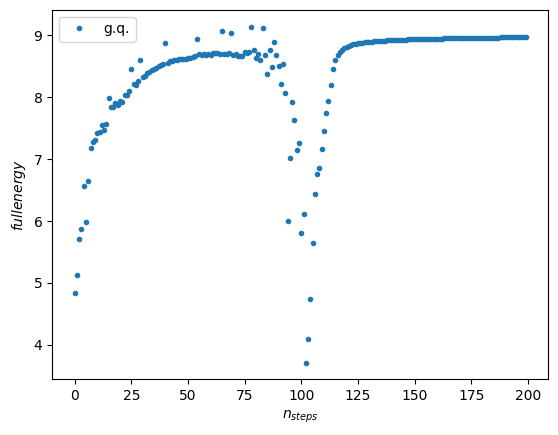

In [9]:

def gen_mat(inputlist):
    
    if inputlist.size != 2 * L * L:
        inputlist=np.resize(inputlist, 2*L*L)
    
    a_mat, b_mat =  np.split(inputlist, 2) 
    
    a_mat = np.reshape(a_mat,(L,L))
    b_mat = np.reshape(b_mat,(L,L))
    
    A_mat = (a_mat + a_mat.T)/2
    B_mat = (b_mat - b_mat.T)/2
    
    # xx = 1000* np.trace(A_mat)
    # for a in range(L):
    #     A_mat[a,a] = ((+1)^a)*A_mat[a,a] / xx
    # print(np.trace(A_mat))
    
    H = np.block([ [A_mat, B_mat],
        [-1*B_mat.conj(), -1*A_mat.conj()] ])
    
    E, U = np.linalg.eigh(H)
    ordr=np.arange(2*L)
    ordr[0:L] = ordr[0:L][::-1]
    U = U[:,ordr]
    
    
    g_mat, h_mat = U[0:L,0:L].T, U[L:, :L].T
    
    II = np.diag([1,0]*(L//2)) #np.diag([1]*(L//2)+[0]*(L//2)) #
    
    C = np.dot(h_mat.T.conj(), h_mat) + np.dot(g_mat.T, np.dot(II, g_mat.conj())) - np.dot(h_mat.T.conj(), np.dot(II, h_mat))
    F = np.dot(h_mat.T.conj(), g_mat) + np.dot(g_mat.T, np.dot(II, h_mat.conj())) - np.dot(h_mat.T.conj(), np.dot(II, g_mat))
    
    # C = np.dot(g_mat.T.conj(), g_mat) + np.dot(h_mat.T, np.dot(II, h_mat.conj())) - np.dot(g_mat.T.conj(), np.dot(II, g_mat))
    # F = np.dot(g_mat.T.conj(), h_mat) + np.dot(h_mat.T, np.dot(II, g_mat.conj())) - np.dot(g_mat.T.conj(), np.dot(II, h_mat))
    
    return C, F


def FullEnergy_GQ(C, F, Vs):
    E=0
    for j in range(L):
        E += -(C[j,np.mod(j+1,L)] + C[np.mod(j+1,L),j])
        E += -Vs/2*(C[j,j]*C[np.mod(j+1,L),np.mod(j+1,L)] -F[j,np.mod(j+1,L)]*F[j,np.mod(j+1,L)] - C[j,np.mod(j+1,L)]*C[np.mod(j+1,L),j])

    return E


def GetGradian_GQ(input_array, Vs, p_shift = 0.001):
    grad_array = np.zeros(input_array.shape)
    for i_th in np.arange(input_array.size):
        
        input_array[i_th] += p_shift 
        C_mat, F_mat = gen_mat(input_array)
        energi1 = FullEnergy_GQ(C_mat, F_mat, Vs)
        
        input_array[i_th] += -2 * p_shift 
        C_mat, F_mat = gen_mat(input_array)
        energi2 = FullEnergy_GQ(C_mat, F_mat, Vs)
        
        grad_array[i_th] += (energi1-energi2)/(2*p_shift)
        
    return(grad_array)


def genfermion_optimization(Vs, grad_rate = 1.637, max_step = 200):
    params = np.random.rand( 2 * L * L )
    es = []
    ps = []
    for _ in np.arange(max_step):
        cmat,fmat = gen_mat(params)
        es.append(FullEnergy_GQ(cmat, fmat, Vs))
        ps.append(np.trace(cmat))
        # ps.append(np.diag(cmat)[0])
        gradian = GetGradian_GQ(params, Vs)
        params += -1*grad_rate * gradian
    return es, ps


L = 10
Vs = 3.3
maxsteps = 200

Es_gq, Ps_gq = genfermion_optimization(Vs, max_step=maxsteps)

# pl.plot(np.arange(maxsteps), Es_gq, ".", label='p.c.')
pl.plot(np.arange(maxsteps), Ps_gq, ".", label='g.q.')
pl.ylabel("$full energy$")
pl.xlabel("$n_{steps}$")
pl.legend()
pl.show()


# VS=np.arange(0, 3, 0.5)
# P = []
# E = []
# for vs in VS:
#     energy_list, parcticle_count = genfermion_optimization(vs, max_step=maxsteps)
#     P.append(parcticle_count[-1])
#     E.append(energy_list[-1])

# pl.plot(VS, P, ".", label='particle')
# # pl.plot(VS, E, ".",label='energy')
# pl.ylabel("$full energy$")
# pl.xlabel("$n_{steps}$")
# pl.legend()
# pl.show()


# General Gaussian state (state construction) #

## version 202410: 1D + less parameters to optimize

In [ ]:
def AntiSym(input, L):
    """_summary_: This function creates an antisymmetric R-matrix with less parameters, since we don't full elements of a matrix
    Returns:
        _numpy.ndarray_: LxL anti symmetric matrix
    """
    if input.size != L * (L-1)//2:
        input = np.resize(input, L*(L-1)//2)
    
    out = np.zeros((L,L))
    indxs = np.triu_indices_from(out, k=1)
    out[ indxs[1], indxs[0] ]= input
    out[indxs] = -1*input
        
    return  out

def FullAntiSym(input, L):
    """_summary_: This function creates an antisymmetric R-matrix with full possible elements. More parameters and slower code form 08/2024. 
    Returns:
        _numpy.ndarray_: L by L anti symmetric matrix
    """
    if input.size != L * L:
        input=np.resize(input, L*L)
     
    r_mat = np.reshape(input,(L,L)) 

    return (r_mat - r_mat.T)/2

def R_mat(inputlist):

    R_mat = AntiSym(inputlist, L)
    # norm = np.sqrt(np.sqrt(np.linalg.det(np.eye(L) + np.dot(R_mat.conj().T, R_mat))))
    # norm = np.sqrt(L) / np.sqrt(- 1. * np.trace(np.dot(R_mat.conj(), R_mat)) )

    # R_mat *=  norm #1 / (norm)
    # for r in range(L):
    #     R_mat[r,r] *=  L / (norm)    
    
    Q_mat = np.linalg.inv( np.eye(L,L) - np.dot(R_mat.conj(), R_mat))
    
    C = ( np.eye(L) - Q_mat) #/ norm
    F = (np.dot(R_mat.conj(), Q_mat.T)) #/ norm
    
    return C, F


def FullEnergy_GS(C, F, Vs):
    E=0
    for j in range(L):
        E += -(C[j,np.mod(j+1,L)] + C[np.mod(j+1,L),j])
        E += -Vs/2*(C[j,j]*C[np.mod(j+1,L),np.mod(j+1,L)] -F[j,np.mod(j+1,L)]*F[j,np.mod(j+1,L)] - C[j,np.mod(j+1,L)]*C[np.mod(j+1,L),j])

    return E


def GetGradian_GS(input_array, Vs, p_shift = 0.001):
    grad_array = np.zeros(input_array.shape)
    
    for i_th in np.arange(input_array.size):    
        input_array[i_th] += p_shift
        C_mat, F_mat = R_mat(input_array)
        energi1 = FullEnergy_GS(C_mat, F_mat, Vs)
        
        input_array[i_th] += -2 * p_shift
        C_mat, F_mat = R_mat(input_array)
        energi2 = FullEnergy_GS(C_mat, F_mat, Vs)
        
        grad_array[i_th] += (energi1-energi2)/(2 * p_shift)
        
    return(grad_array)



def genstate_optimization(Vs, grad_rate = 1.437, max_step = 200):
    params = np.random.rand( L*(L-1) // 2 )
    # params = np.random.randn( L*(L-1) // 2 )
    es = []
    ps = []
    pss = []
    for _ in np.arange(max_step):
        
        # test_mat = (np.reshape(params,(L,L)) - np.reshape(params,(L,L)).T)/2
        # test_mat = AntiSym(params,L)
        # print("--")
        # print(test_mat[:3,:3])
        # norm = np.sqrt(L) / np.sqrt(- 1. * np.trace(np.dot(test_mat.conj(), test_mat)) )
        # params = params * norm
        
        cmat,fmat = R_mat(params)
        # print(np.trace(C), " - ", np.diag(C)[0])
        # print(np.trace( np.dot(R_mat.conj(), R_mat)), " --- ", np.diag(np.dot(R_mat.conj(), R_mat))[0], " --- ", norm )
        es.append( FullEnergy_GS(cmat, fmat, Vs))
        pss.append(np.trace(cmat, dtype=np.float16) / L)
        ps.append(np.diag(cmat)[0])
        gradian = GetGradian_GS(params, Vs)
        params += -1 * grad_rate * gradian
    return es, ps, pss



L = 10
Vs = 4.68
maxsteps = 400
Ns = np.arange(maxsteps)

Es_gs, Ps_gs, PSS = genstate_optimization(Vs, max_step=maxsteps)

# pl.plot(Ns, Es_gs,".", label='g.s.')
pl.plot(Ns, Ps_gs,".", label='g.s.')
pl.plot(Ns, PSS,".", label='g.s.')
# pl.yscale('log')  # pl.xscale('log')
pl.ylabel("particle count")
pl.xlabel("$n_{steps}$")
pl.legend()
pl.show()

pl.plot(Ns, Es_gs,".", label='g.s.')
pl.ylabel("$full-energy$")
pl.xlabel("$n_{steps}$")
pl.legend()
pl.show()

* Shallow citcuit fermionic state *

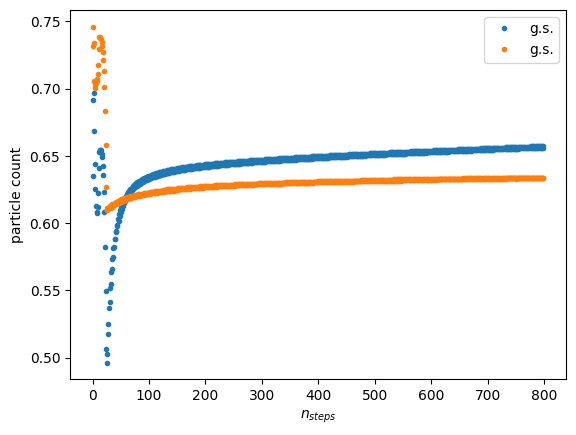

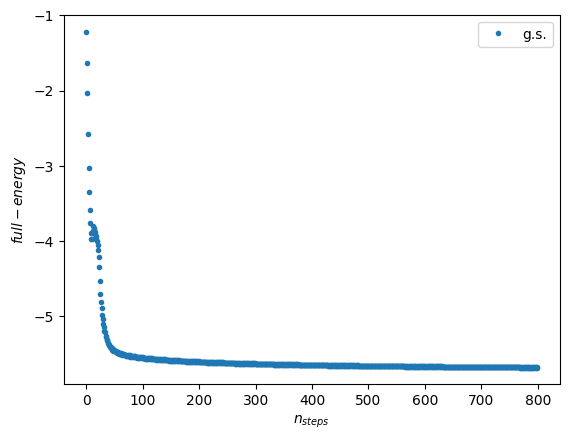

In [141]:
def AntiSym_shalow(input, L, **kw):
    """_summary_: This function creates an antisymmetric R-matrix which is shalow, just next nearest elements are nonzero.
    Returns:
        _numpy.ndarray_: LxL anti symmetric matrix
    """
    PBC = kw['PBC'] if 'PBC' in kw.keys() else True
    
    if input.size != L:
        input = np.resize(input, L)
    
    out = np.zeros((L,L))
    indxs = np.array([np.array([ii,ii+1]) for ii in range(L-1)]).T
    out[ indxs[1], indxs[0] ] = +1.0*input[:-1]
    out[ indxs[0], indxs[1] ] = -1.0*input[:-1]
    
    if PBC:
        out[L-1,0] = -1.0*input[-1]
        out[0,L-1] = +1.0*input[-1]
            
    return  out


def AntiSym(input, L, **kw):
    """_summary_: This function creates an antisymmetric R-matrix with less parameters, since we don't full elements of a matrix
    Returns:
        _numpy.ndarray_: LxL anti symmetric matrix
    """
    if input.size != L * (L-1)//2:
        input = np.resize(input, L*(L-1)//2)
    
    out = np.zeros((L,L))
    indxs = np.triu_indices_from(out, k=1)
    out[ indxs[1], indxs[0] ]= input
    out[indxs] = -1*input
        
    return  out

def R_mat(inputlist, L, **kw):

    func = kw['matrix_func'] if 'matrix_func' in kw.keys() else AntiSym
    # bndry_cndtn = kw['PBC'] if 'PBC' in kw.keys() else True

    # R_mat = AntiSym_shalow(inputlist, L)
    R_mat = func(inputlist, L, **kw)
    
    # norm = np.sqrt(np.sqrt(np.linalg.det(np.eye(L) + np.dot(R_mat.conj().T, R_mat))))
    # norm = np.sqrt(L) / np.sqrt(- 1. * np.trace(np.dot(R_mat.conj(), R_mat)) )
    
    Q_mat = np.linalg.inv( np.eye(L,L) - np.dot(R_mat.conj(), R_mat))
    
    C = ( np.eye(L) - Q_mat) #/ norm
    F = (np.dot(R_mat.conj(), Q_mat.T)) #/ norm
    
    return C, F


def FullEnergy_GS(C, F, Vs, L):
    E=0
    for j in range(L):
        E += -(C[j,np.mod(j+1,L)] + C[np.mod(j+1,L),j])
        E += -Vs/2*(C[j,j]*C[np.mod(j+1,L),np.mod(j+1,L)] -F[j,np.mod(j+1,L)]*F[j,np.mod(j+1,L)] - C[j,np.mod(j+1,L)]*C[np.mod(j+1,L),j])

    return E


def GetGradian_GS(input_array, Vs, L, **kw):
    
    p_shift = kw['p_shift'] if 'p_shift' in kw.keys() else 0.001
    grad_array = np.zeros(input_array.shape)
    
    for i_th in np.arange(input_array.size):    
        input_array[i_th] += p_shift
        C_mat, F_mat = R_mat(input_array, L, **kw)
        energi1 = FullEnergy_GS(C_mat, F_mat, Vs, L)
        
        input_array[i_th] += -2 * p_shift
        C_mat, F_mat = R_mat(input_array, L, **kw)
        energi2 = FullEnergy_GS(C_mat, F_mat, Vs, L)
        
        grad_array[i_th] += (energi1-energi2)/(2 * p_shift)
        
    return(grad_array)



def genstate_optimization(*physical, **kw):
    
    grad_rate = kw['grad_rate'] if 'grad_rate' in kw.keys() else 1.63
    max_step = kw['max_step'] if 'max_step' in kw.keys() else 200
    target_energy = kw['target_energy'] if 'target_energy' in kw.keys() else 0.0
    func = kw['energy_func'] if 'energy_func' in kw.keys() else Sym
    # energy_output = kw['energy_output'] if 'energy_output' in kw.keys() else True
    # particle_number = kw['particle_number'] if 'particle_number' in kw.keys() else 0
    
    Vs, L = physical[:2]
    
    #~~here it checks what was the given function and decides how many parameters it needs~~#
    if func.__qualname__ == 'AntiSym_shalow':
        # params = np.random.rand(L)
        # params = np.random.randn(L)
        params = np.random.uniform(-1., +1., L)
    else:
        # params = np.random.rand( Lx*Ly * (Lx*Ly+1) // 2 )
        # params = np.random.randn( Lx*Ly * (Lx*Ly+1) // 2 )
        params = np.random.uniform(-1., +1., Lx*Ly * (Lx*Ly+1) // 2 )
    
    
    es = []
    ps = []
    pss = []
    for _ in np.arange(max_step):
        
        cmat,fmat = R_mat(params, L, **kw)
        energy_optimized = FullEnergy_GS(cmat, fmat, Vs, L)
        
        # print(np.trace(cmat), " - ", np.diag(cmat)[:])
        # test_mat = (np.reshape(params,(L,L)) - np.reshape(params,(L,L)).T)/2
        # test_mat = AntiSym_shalow(params,L)
        # print("--")
        # print(test_mat[:5,:5])
        # norm = np.sqrt(L) / np.sqrt(- 1. * np.trace(np.dot(test_mat.conj(), test_mat)) )
        # params = params * norm
        
        # print(np.trace( np.dot(R_mat.conj(), R_mat)), " --- ", np.diag(np.dot(R_mat.conj(), R_mat))[0], " --- ", norm )
        es.append(energy_optimized)
        pss.append(np.trace(cmat, dtype=np.float16) / L)
        ps.append(np.diag(cmat)[0])
        
        gradian = GetGradian_GS(params, Vs, L)
        params += -1 * grad_rate * gradian
    
    return es, ps, pss



LL = 10
Vs = 0.38
maxsteps = 800
Ns = np.arange(maxsteps)

Es_gs, Ps_gs, PSS = genstate_optimization(Vs, LL, max_step=maxsteps, grad_rate=.531)

# pl.plot(Ns, Es_gs,".", label='g.s.')
pl.plot(Ns, Ps_gs,".", label='g.s.')
pl.plot(Ns, PSS,".", label='g.s.')
# pl.yscale('log')  # pl.xscale('log')
pl.ylabel("particle count")
pl.xlabel("$n_{steps}$")
pl.legend()
pl.show()

pl.plot(Ns, Es_gs,".", label='g.s.')
pl.ylabel("$full-energy$")
pl.xlabel("$n_{steps}$")
pl.legend()
pl.show()

## version 202410_2: 2D + less parameters ##

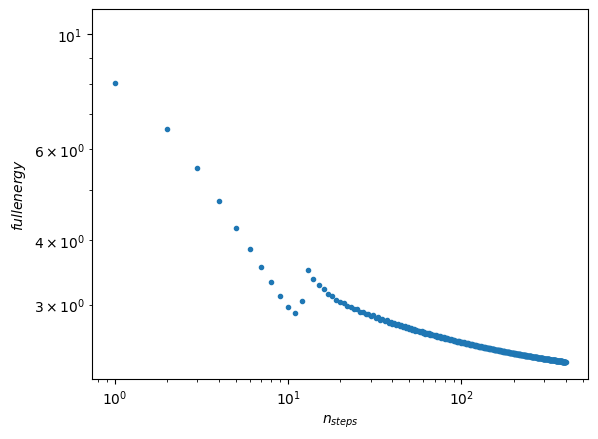

end is here


In [26]:
def AntiSym(input, L):
    
    if input.size != L * (L-1)//2:
        input = np.resize(input, L*(L-1)//2)
    
    out = np.zeros((L,L))
    indxs = np.triu_indices_from(out, k=1)
    out[ indxs[1], indxs[0] ]= input
    out[indxs] = -1*input
        
    return  out


def r_mat_2d(inputlist, *dims, **kw):

    Lx,Ly = dims[:2]
    L = Lx*Ly

    R_mat = AntiSym(inputlist, L)
    # norm = np.sqrt(np.sqrt(np.linalg.det(np.eye(L) + np.dot(R_mat.conj().T, R_mat))))
    # norm = np.sqrt(L) / np.sqrt(- 1. * np.trace(np.dot(R_mat.conj(), R_mat)) )
    
    Q_mat = np.linalg.inv( np.eye(L,L) - np.dot(R_mat.conj(), R_mat))
    
    C = ( np.eye(L) - Q_mat) #/ norm
    F = (np.dot(R_mat.conj(), Q_mat.T)) #/ norm
    
    return C, F


def FullEnergy_GS_2d(C, F, *physical, **kw):
    
    PBC = kw['PBC'] if 'PBC' in kw.keys() else True
    
    Vs, Lx, Ly = physical[:3]
    
    ad_X = np.eye(Lx, k=1) + np.eye(Lx, k=-1)  + int(PBC)*np.eye(Lx, k=Lx-1)  + int(PBC)*np.eye(Lx, k=-Lx+1)    
    if Ly==2:
        ad_Y = np.eye(Ly, k=1) + np.eye(Ly, k=-1)
    else:
        ad_Y = np.eye(Ly, k=1) + np.eye(Ly, k=-1)  + int(PBC)*np.eye(Ly, k=Ly-1)  + int(PBC)*np.eye(Ly, k=-Ly+1)

    ad_mat = np.kron(ad_Y, np.eye(Lx)) + np.kron(np.eye(Ly), ad_X)
    
    E = 0
    for xx in range(Lx*Ly):
        for yy in range(xx, Lx*Ly):
            E += - 1.0*ad_mat[xx,yy] * (C[xx,yy] + C[yy,xx])
            E += - Vs/2*ad_mat[xx,yy] * (C[xx,xx]*C[yy,yy] - C[xx,yy]*C[yy,xx] - F[xx,yy]*F[yy,xx].conj() )
            # E += - Vs/2*ad_mat[xx,yy] * C[xx,xx]*C[yy,yy]

    return E


def GetGradian_GS_2d(input_array, *parameter, **kw):
    
    p_shift = kw['p_shift'] if 'p_shift' in kw.keys() else 0.001
    
    Vs, Lx, Ly = parameter[:3]
    
    grad_array = np.zeros(input_array.shape)
    for i_th in np.arange(input_array.size):    
        input_array[i_th] += p_shift
        C_mat, F_mat = r_mat_2d(input_array, Lx, Ly, **kw)
        energi1 = FullEnergy_GS_2d(C_mat, F_mat, Vs, Lx, Ly, **kw)
        
        input_array[i_th] += -2 * p_shift
        C_mat, F_mat = r_mat_2d(input_array, Lx, Ly, **kw)
        energi2 = FullEnergy_GS_2d(C_mat, F_mat, Vs, Lx, Ly, **kw)
        
        grad_array[i_th] += (energi1-energi2)/(2 * p_shift)
        
    return(grad_array)


def genstate_optimization_2d(*physical, **kw):
    """_summary_
    parameters(*):
        physical: V, Lx, Ly (given in order) 
    Keywords(**):
        grad_rate: gradient descent rate, a.k.a update rate.
        max_step: maximum optimization steps.
        target_energy: targer energy to reach.
        energy_output: type of energy output. 'True' for solely optimized energy or 'False' for difference between target energy and optimized energy. 
    Returns:
        _list_: energy, particle_count 
    """
    grad_rate = kw['grad_rate'] if 'grad_rate' in kw.keys() else 0.343
    max_step = kw['max_step'] if 'max_step' in kw.keys() else 200
    energy_output = kw['energy_output'] if 'energy_output' in kw.keys() else True
    target_energy = kw['target_energy'] if 'target_energy' in kw.keys() else 0.0
    
    Vs, Lx, Ly = physical[:3]
    
    # params = np.random.rand( Lx*Ly * (Lx*Ly - 1) // 2 )
    # params = np.random.randn( Lx*Ly * (Lx*Ly - 1) // 2 )
    params = np.random.uniform(-1, 1, Lx*Ly * (Lx*Ly - 1) // 2 )

    Vs, Lx, Ly = physical[:3]
    
    es = []
    ps = []
    for _ in np.arange(max_step):
        cmat, fmat = r_mat_2d(params, Lx, Ly, **kw)
        
        optimized_energy = FullEnergy_GS_2d(cmat, fmat, Vs, Lx, Ly, **kw)
        
        # print(list(cmat))
        # print("--------------------")
        # print(list(fmat))
        # print(optimized_energy)
        
        if energy_output:
            es.append(optimized_energy)
        else:
            es.append( abs( optimized_energy - target_energy ) )
        
        # ps.append(np.trace(cmat, dtype=np.float16) / L)
        ps.append(np.diag(cmat)[0])
        
        gradian = GetGradian_GS_2d(params, Vs, Lx, Ly, **kw)
        params += -1 * grad_rate * gradian
    return es, ps




Lx, Ly = 4, 3
Vs = 0.37
maxsteps = 400
Ns = np.arange(maxsteps)
Es, Ps = genstate_optimization_2d(Vs, Lx,Ly, max_step=maxsteps, PBC=True, target_energy=-10.913764270379568, energy_output=False)

# pl.plot(Ns, Ps,".")
pl.plot(Ns,Es,".")
pl.ylabel("$full energy$")
pl.xlabel("$n_{steps}$")
pl.yscale('log')
pl.xscale('log')
pl.show()


# VS=np.arange(0, 3, 0.125)
# P = []
# E = []
# params = np.random.rand( L * L )
# for vs in VS:
#     energy, parcticle_count, params = freefermion_optimization(vs, params, max_step=maxsteps)
#     P.append(parcticle_count)
#     E.append(energy)
#     # energy_list, parcticle_count = freefermion_optimization(vs, max_step=maxsteps)
#     # P.append(parcticle_count[-1])
#     # E.append(energy_list[-1])

# # pl.plot(VS, P, ".", label='particle')
# pl.plot(VS, E, ".",label='energy')
# pl.ylabel("$full \: energy$")
# pl.xlabel("$V$")
# pl.legend()
# pl.show()

print("end is here")


# Excited States construction



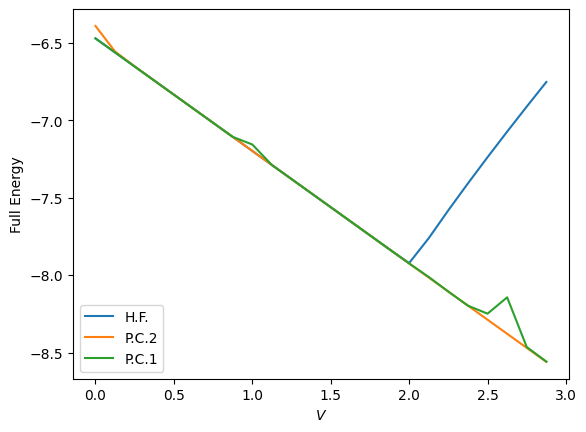

In [ ]:

def energy_func(n, mode_energis):
    L = len(mode_energis)
    K_list = np.array([int(i) for i in np.binary_repr(n, width=L)])
    
    if len(K_list) != L:
        print("Error - -")
        return() 
    
    return( np.array(K_list) @ np.array(mode_energis) )


def basis_set(L):
    N = L//2
    basis_N = []
    for n in range(2**L):
        bin_state = np.array([int(i) for i in np.binary_repr(n, width=L)])
        if sum(bin_state) == N:
            basis_N.append(n)
    
        
    return basis_N


# testing multi processing

In [8]:
from multiprocessing.pool import ThreadPool
from multiprocessing import cpu_count
import time as tt

print(cpu_count())

def mus(a):
    tt.sleep(0.5)
    return 2*a

in_aray= range(10)
print("input: ",in_aray)

ti=tt.time()
out_aray=[]
for inp in in_aray:
    out_aray.append(mus(inp))
    
print("time single thread: ", tt.time()-ti)
print(out_aray)
    

if __name__ == "__main__":
    with ThreadPool(processes=10) as pool:
        ti=tt.time()
        results = pool.map(mus, range(10), )
        pool.close()  # 'TERM'
        pool.join()   # 'KILL'
        print("time multi thread: ", tt.time()-ti)
    print(results)

8
input:  range(0, 10)
time single thread:  5.004978656768799
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
time multi thread:  0.5040066242218018
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
